# Estudo de possíveis gráficos para Dashboard

O objetivo deste caderno é identificar os possíveis gráficos que poderiam ser usados para o Dashboard de Evasão Escolar no Ensino Superior a partir de dados de Indicadores de Fluxo e dados do Censo. A idéia é agrupar colunas relacionadas em um mesmo gráfico. Aplicaremos o gráfico a cursos específicos considerando os ingressantes em 2017 e os dados de fluxo que os acompanham de 2017 até 2021. Uma vez que tivermos esses dados para cursos específicos, poderemos fazer agrupamentos calculando a média dos cursos selecionado para agrupamento como, por exemplo, pública ou privada, região, classificação CINE etc.


Antes de qualquer coisa, vamos importar o Pandas e o Matplotlib. Também configuraremos o Pandaspara exibir todas as colunas do Dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

## Importação dos dados do Censo de 2010 a 2021

Importaremos os dados segundo a codificação Latin-1

In [2]:
df = pd.read_csv('censo_educacao_superior_sp_2010-2021.csv', sep=';', encoding='latin-1')
df

,CO_CURSO,NO_CURSO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,CO_CINE_ROTULO,NO_GRAU_ACADEMICO,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_DIMENSAO,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,CO_IES,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_ESPECIFICA,CO_CINE_AREA_DETALHADA,NO_CINE_AREA_DETALHADA,IN_GRATUITO,TP_NIVEL_ACADEMICO,QT_CURSO,QT_VG_TOTAL,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO,QT_VG_TOTAL_EAD,QT_VG_NOVA,QT_VG_PROC_SELETIVO,QT_VG_REMANESC,QT_VG_PROG_ESPECIAL,QT_INSCRITO_TOTAL,QT_INSCRITO_TOTAL_DIURNO,QT_INSCRITO_TOTAL_NOTURNO,QT_INSCRITO_TOTAL_EAD,QT_INSC_VG_NOVA,QT_INSC_PROC_SELETIVO,QT_INSC_VG_REMANESC,QT_INSC_VG_PROG_ESPECIAL,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_DIURNO,QT_MAT_NOTURNO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND,QT_CONC,QT_CONC_FEM,QT_CONC_MASC,QT_CONC_DIURNO,QT_CONC_NOTURNO,QT_CONC_0_17,QT_CONC_18_24,QT_CONC_25_29,QT_CONC_30_34,QT_CONC_35_39,QT_CONC_40_49,QT_CONC_50_59,QT_CONC_60_MAIS,QT_CONC_BRANCA,QT_CONC_PRETA,QT_CONC_PARDA,QT_CONC_AMARELA,QT_CONC_INDIGENA,QT_CONC_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_MAT_NACBRAS,QT_MAT_NACESTRANG,QT_CONC_NACBRAS,QT_CONC_NACESTRANG,QT_ALUNO_DEFICIENTE,QT_ING_DEFICIENTE,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_MAT_FINANC,QT_MAT_FINANC_REEMB,QT_MAT_FIES,QT_MAT_RPFIES,QT_MAT_FINANC_REEMB_OUTROS,QT_MAT_FINANC_NREEMB,QT_MAT_PROUNII,QT_MAT_PROUNIP,QT_MAT_NRPFIES,QT_MAT_FINANC_NREEMB_OUTROS,QT_CONC_FINANC,QT_CONC_FINANC_REEMB,QT_CONC_FIES,QT_CONC_RPFIES,QT_CONC_FINANC_REEMB_OUTROS,QT_CONC_FINANC_NREEMB,QT_CONC_PROUNII,QT_CONC_PROUNIP,QT_CONC_NRPFIES,QT_CONC_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_MAT_RESERVA_VAGA,QT_MAT_RVREDEPUBLICA,QT_MAT_RVETNICO,QT_MAT_RVPDEF,QT_MAT_RVSOCIAL_RF,QT_MAT_RVOUTROS,QT_CONC_RESERVA_VAGA,QT_CONC_RVREDEPUBLICA,QT_CONC_RVETNICO,QT_CONC_RVPDEF,QT_CONC_RVSOCIAL_RF,QT_CONC_RVOUTROS,QT_SIT_TRANCADA,QT_SIT_DESVINCULADO,QT_SIT_TRANSFERIDO,QT_SIT_FALECIDO,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA,QT_PARFOR,QT_ING_PARFOR,QT_MAT_PARFOR,QT_CONC_PARFOR,QT_APOIO_SOCIAL,QT_ING_APOIO_SOCIAL,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
0,614,CIÊNCIA DA COMPUTAÇÃO,1,1,6,Bacharelado,2010,Sudeste,3,São Paulo,SP,35,São Carlos,3548906,0,1,1,1,1.0,7,6,Computação e Tecnologias da Informação e Comun...,61,Computação e Tecnologias da Informação e Comun...,614,Ciência da computação,1,1,1.0,60.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,1028.0,1028.0,0.0,0.0,0.0,0.0,0.0,0.0,63,2,61,63,0,0,61,61,0,0,0,0,0,0,0,0,0,60,1,2,0,0,0,0,34,2,5,0,1,21,279,17,262,279,0,0,246,30,3,0,0,0,0,176,8,14,0,0,81,54,2,52,54,0,0,42,11,1,0,0,0,0,38,0,2,0,0,14,63,0,275,4,54,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,30,0,0,0,0,63,0,0,279,0

## Filtrando para o ano de 2017

Momentaneamente vamos nos concentrar apenas no Censo de 2017

In [3]:
df_censo_2017 = df[df['NU_ANO_CENSO']==2017]
df_censo_2017

,CO_CURSO,NO_CURSO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,CO_CINE_ROTULO,NO_GRAU_ACADEMICO,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_DIMENSAO,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,CO_IES,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_ESPECIFICA,CO_CINE_AREA_DETALHADA,NO_CINE_AREA_DETALHADA,IN_GRATUITO,TP_NIVEL_ACADEMICO,QT_CURSO,QT_VG_TOTAL,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO,QT_VG_TOTAL_EAD,QT_VG_NOVA,QT_VG_PROC_SELETIVO,QT_VG_REMANESC,QT_VG_PROG_ESPECIAL,QT_INSCRITO_TOTAL,QT_INSCRITO_TOTAL_DIURNO,QT_INSCRITO_TOTAL_NOTURNO,QT_INSCRITO_TOTAL_EAD,QT_INSC_VG_NOVA,QT_INSC_PROC_SELETIVO,QT_INSC_VG_REMANESC,QT_INSC_VG_PROG_ESPECIAL,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_DIURNO,QT_MAT_NOTURNO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND,QT_CONC,QT_CONC_FEM,QT_CONC_MASC,QT_CONC_DIURNO,QT_CONC_NOTURNO,QT_CONC_0_17,QT_CONC_18_24,QT_CONC_25_29,QT_CONC_30_34,QT_CONC_35_39,QT_CONC_40_49,QT_CONC_50_59,QT_CONC_60_MAIS,QT_CONC_BRANCA,QT_CONC_PRETA,QT_CONC_PARDA,QT_CONC_AMARELA,QT_CONC_INDIGENA,QT_CONC_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_MAT_NACBRAS,QT_MAT_NACESTRANG,QT_CONC_NACBRAS,QT_CONC_NACESTRANG,QT_ALUNO_DEFICIENTE,QT_ING_DEFICIENTE,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_MAT_FINANC,QT_MAT_FINANC_REEMB,QT_MAT_FIES,QT_MAT_RPFIES,QT_MAT_FINANC_REEMB_OUTROS,QT_MAT_FINANC_NREEMB,QT_MAT_PROUNII,QT_MAT_PROUNIP,QT_MAT_NRPFIES,QT_MAT_FINANC_NREEMB_OUTROS,QT_CONC_FINANC,QT_CONC_FINANC_REEMB,QT_CONC_FIES,QT_CONC_RPFIES,QT_CONC_FINANC_REEMB_OUTROS,QT_CONC_FINANC_NREEMB,QT_CONC_PROUNII,QT_CONC_PROUNIP,QT_CONC_NRPFIES,QT_CONC_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_MAT_RESERVA_VAGA,QT_MAT_RVREDEPUBLICA,QT_MAT_RVETNICO,QT_MAT_RVPDEF,QT_MAT_RVSOCIAL_RF,QT_MAT_RVOUTROS,QT_CONC_RESERVA_VAGA,QT_CONC_RVREDEPUBLICA,QT_CONC_RVETNICO,QT_CONC_RVPDEF,QT_CONC_RVSOCIAL_RF,QT_CONC_RVOUTROS,QT_SIT_TRANCADA,QT_SIT_DESVINCULADO,QT_SIT_TRANSFERIDO,QT_SIT_FALECIDO,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA,QT_PARFOR,QT_ING_PARFOR,QT_MAT_PARFOR,QT_CONC_PARFOR,QT_APOIO_SOCIAL,QT_ING_APOIO_SOCIAL,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
113570,614,CIÊNCIA DA COMPUTAÇÃO,1,1,6,Bacharelado,2017,Sudeste,3,São Paulo,SP,35,São Carlos,3548906,0,1,1,1,1.0,7,6,Computação e Tecnologias da Informação e Comun...,61,Computação e Tecnologias da Informação e Comun...,614,Ciência da computação,1,1,1.0,71.0,71.0,0.0,0.0,62.0,0.0,9.0,0.0,934.0,934.0,0.0,0.0,925.0,0.0,9.0,0.0,66,20,46,66,0,60,2,58,0,0,0,0,0,6,0,0,1,62,3,0,0,0,0,0,12,2,3,4,2,43,298,46,252,298,0,1,241,48,6,2,0,0,0,149,14,35,17,2,81,36,0,36,36,0,0,20,14,1,1,0,0,0,29,3,3,1,0,0,65,1,294,4,34,2,2,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,25,0,0,22,44,0,1

## Vamos nos concentrar em um curso específico identificado pelo CO_CURSO = 614

Como se pode ver abaixo, esse curso é o de Ciência da Computação de São Carlos

In [4]:
df_censo_2017_co_curso_614 = df_censo_2017[df_censo_2017['CO_CURSO']==614]
df_censo_2017_co_curso_614

,CO_CURSO,NO_CURSO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,CO_CINE_ROTULO,NO_GRAU_ACADEMICO,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_DIMENSAO,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,CO_IES,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_ESPECIFICA,CO_CINE_AREA_DETALHADA,NO_CINE_AREA_DETALHADA,IN_GRATUITO,TP_NIVEL_ACADEMICO,QT_CURSO,QT_VG_TOTAL,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO,QT_VG_TOTAL_EAD,QT_VG_NOVA,QT_VG_PROC_SELETIVO,QT_VG_REMANESC,QT_VG_PROG_ESPECIAL,QT_INSCRITO_TOTAL,QT_INSCRITO_TOTAL_DIURNO,QT_INSCRITO_TOTAL_NOTURNO,QT_INSCRITO_TOTAL_EAD,QT_INSC_VG_NOVA,QT_INSC_PROC_SELETIVO,QT_INSC_VG_REMANESC,QT_INSC_VG_PROG_ESPECIAL,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_DIURNO,QT_MAT_NOTURNO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND,QT_CONC,QT_CONC_FEM,QT_CONC_MASC,QT_CONC_DIURNO,QT_CONC_NOTURNO,QT_CONC_0_17,QT_CONC_18_24,QT_CONC_25_29,QT_CONC_30_34,QT_CONC_35_39,QT_CONC_40_49,QT_CONC_50_59,QT_CONC_60_MAIS,QT_CONC_BRANCA,QT_CONC_PRETA,QT_CONC_PARDA,QT_CONC_AMARELA,QT_CONC_INDIGENA,QT_CONC_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_MAT_NACBRAS,QT_MAT_NACESTRANG,QT_CONC_NACBRAS,QT_CONC_NACESTRANG,QT_ALUNO_DEFICIENTE,QT_ING_DEFICIENTE,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_MAT_FINANC,QT_MAT_FINANC_REEMB,QT_MAT_FIES,QT_MAT_RPFIES,QT_MAT_FINANC_REEMB_OUTROS,QT_MAT_FINANC_NREEMB,QT_MAT_PROUNII,QT_MAT_PROUNIP,QT_MAT_NRPFIES,QT_MAT_FINANC_NREEMB_OUTROS,QT_CONC_FINANC,QT_CONC_FINANC_REEMB,QT_CONC_FIES,QT_CONC_RPFIES,QT_CONC_FINANC_REEMB_OUTROS,QT_CONC_FINANC_NREEMB,QT_CONC_PROUNII,QT_CONC_PROUNIP,QT_CONC_NRPFIES,QT_CONC_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_MAT_RESERVA_VAGA,QT_MAT_RVREDEPUBLICA,QT_MAT_RVETNICO,QT_MAT_RVPDEF,QT_MAT_RVSOCIAL_RF,QT_MAT_RVOUTROS,QT_CONC_RESERVA_VAGA,QT_CONC_RVREDEPUBLICA,QT_CONC_RVETNICO,QT_CONC_RVPDEF,QT_CONC_RVSOCIAL_RF,QT_CONC_RVOUTROS,QT_SIT_TRANCADA,QT_SIT_DESVINCULADO,QT_SIT_TRANSFERIDO,QT_SIT_FALECIDO,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA,QT_PARFOR,QT_ING_PARFOR,QT_MAT_PARFOR,QT_CONC_PARFOR,QT_APOIO_SOCIAL,QT_ING_APOIO_SOCIAL,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
113570,614,CIÊNCIA DA COMPUTAÇÃO,1,1,6,Bacharelado,2017,Sudeste,3,São Paulo,SP,35,São Carlos,3548906,0,1,1,1,1.0,7,6,Computação e Tecnologias da Informação e Comun...,61,Computação e Tecnologias da Informação e Comun...,614,Ciência da computação,1,1,1.0,71.0,71.0,0.0,0.0,62.0,0.0,9.0,0.0,934.0,934.0,0.0,0.0,925.0,0.0,9.0,0.0,66,20,46,66,0,60,2,58,0,0,0,0,0,6,0,0,1,62,3,0,0,0,0,0,12,2,3,4,2,43,298,46,252,298,0,1,241,48,6,2,0,0,0,149,14,35,17,2,81,36,0,36,36,0,0,20,14,1,1,0,0,0,29,3,3,1,0,0,65,1,294,4,34,2,2,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,25,0,0,22,44,0,1

## Agora vamos importar os dados de Fluxo de 2017 a 2021



In [5]:
df_fluxo = pd.read_excel('indicadores_trajetoria_educacao_superior_2017_2021.xlsx')
df_fluxo

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Código da área do Curso segundo a classificação CINE BRASIL,Nome da área do Curso segundo a classificação CINE BRASIL,Código da Grande Área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2017,2017,6,2022,10,2026,95,94,0,1,0,98.947368,0.000000,1.052632,0.000000,1.052632
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2017,2018,6,2022,10,2026,95,91,1,2,0,95.789474,1.052632,3.157895,1.052632,2.105263
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2017,2019,6,2022,10,2026,95,89,1,1,0,93.684211,2.105263,4.210526,1.052632,1.052632
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2017,2020,6,2022,10,2026,95,54,35,0,0,56.842105,38.947368,4.210526,36.842105,0.000000
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2017,2021,6,2022,10,2026,95,49,5,0,0,51.578947,44.210526,4.210526,5.263158,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154470,25352,Universidade Federal de Rondonópolis,1,1,1261971,MEDICINA,5.0,51.0,5107602.0,1,1,0912M01,Medicina,9,Saúde e bem-estar,2017,2017,7,2023,10,2026,41,40,0,1,0,97.560976,0.000000,2.439024,0.000000,2.439024
154471,25352,Universidade Federal de Rondonópolis,1,1,1261971,MEDICINA,5.0,51.0,5107602.0,1,1,0912M01,Medicina,9,Saúde e bem-estar,2017,2018,7,2023,10,2026,41,39,0,1,0,95.121951,0.000000,4.878049,0.000000,2.439024
154472,25352,Universidade Federal de Rondonópolis,1,1,1261971,MEDICINA,5.0,51.0,5107602.0,1,1,0912M01,Medicina,9,Saúde e bem-estar,2017,2019,7,2023,10,2026,41,36,0,3,0,87.804878,0.000000,12.195122,0.000000,7.317073
154473,25352,Universidade Federal de Rondonópolis,1,1,1261971,MEDICINA,5.0,51.0,5107602.0,1,1,0912M01,Medicina,9,Saúde e bem-estar,2017,2020,7,2023,10,2026,41,35,0,1,0,85.365854,0.000000,14.634146,0.000000,2.439024


## Em seguida filtramos pelo curso 614 novamente

Obseve abaixo que obtemos 5 linhas. Cada linha corresponde a um ano de referência: 2017, 2018, 2019, 2020 e 2021.
Os dados que nos interessam para fazer o gráfico de indicadores de fluxo estão nas colunas: **Taxa de Permanência - TAP**, **Taxa de Conclusão Acumulada - TCA**, **Taxa de Desistência Acumulada - TDA** e **Taxa de Desistência Anual - TADA**

In [6]:
df_fluxo_co_curso_614 = df_fluxo[df_fluxo['Código do Curso de Graduação'] == 614]
df_fluxo_co_curso_614

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Código da área do Curso segundo a classificação CINE BRASIL,Nome da área do Curso segundo a classificação CINE BRASIL,Código da Grande Área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA
2745,7,UNIVERSIDADE FEDERAL DE SÃO CARLOS,1,1,614,CIÊNCIA DA COMPUTAÇÃO,3.0,35.0,3548906.0,1,1,0614C01,Ciência da computação,6,Computação e Tecnologias da Informação e Comun...,2017,2017,5,2021,8,2024,66,60,0,6,0,90.909091,0.000000,9.090909,0.000000,9.090909
2746,7,UNIVERSIDADE FEDERAL DE SÃO CARLOS,1,1,614,CIÊNCIA DA COMPUTAÇÃO,3.0,35.0,3548906.0,1,1,0614C01,Ciência da computação,6,Computação e Tecnologias da Informação e Comun...,2017,2018,5,2021,8,2024,66,56,0,4,0,84.848485,0.000000,15.151515,0.000000,6.060606
2747,7,UNIVERSIDADE FEDERAL DE SÃO CARLOS,1,1,614,CIÊNCIA DA COMPUTAÇÃO,3.0,35.0,3548906.0,1,1,0614C01,Ciência da computação,6,Computação e Tecnologias da Informação e Comun...,2017,2019,5,2021,8,2024,66,48,0,7,1,73.846154,0.000000,26.153846,0.000000,10.769231
2748,7,UNIVERSIDADE FEDERAL DE SÃO CARLOS,1,1,614,CIÊNCIA DA COMPUTAÇÃO,3.0,35.0,3548906.0,1,1,0614C01,Ciência da computação,6,Computação e Tecnologias da Informação e Comun...,2017,2020,5,2021,8,2024,66,37,10,1,0,56.923077,15.384615,27.692308,15.384615,1.538462
2749,7,UNIVERSIDADE FEDERAL DE SÃO CARLOS,1,1,614,CIÊNCIA DA COMPUTAÇÃO,3.0,35.0,3548906.0,1,1,0614C01,Ciência da computação,6,Computação e Tecnologias da Informação e Comun...,2017,2021,5,2021,8,2024,66,18,17,2,0,27.692308,41.538462,30.769231,26.153846,3.076923


Apenas para facilitar a visualização, vamos mostrar apenas essas colunas com seus respectivos Anos de Referência

In [7]:
df_fluxo_co_curso_614[['Ano de Ingresso', 'Ano de Referência', 'Taxa de Permanência - TAP', 'Taxa de Conclusão Acumulada - TCA', 'Taxa de Desistência Acumulada - TDA', 'Taxa de Desistência Anual - TADA']]

,Ano de Ingresso,Ano de Referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Desistência Anual - TADA
2745,2017,2017,90.909091,0.000000,9.090909,9.090909
2746,2017,2018,84.848485,0.000000,15.151515,6.060606
2747,2017,2019,73.846154,0.000000,26.153846,10.769231
2748,2017,2020,56.923077,15.384615,27.692308,1.538462
2749,2017,2021,27.692308,41.538462,30.769231,3.076923


## Agora vamos plotar o gráfico de Indicadores de Fluxo

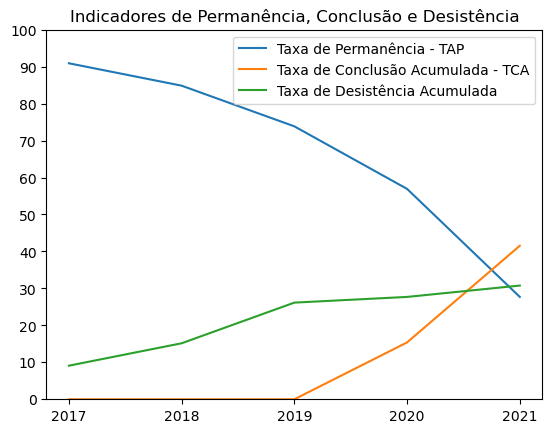

In [8]:
#Gráfico de indicadores
df_fluxo_co_curso_614_ind = df_fluxo_co_curso_614.reset_index()
df_fluxo_co_curso_614_ind = df_fluxo_co_curso_614_ind[['Ano de Referência','Taxa de Permanência - TAP', 'Taxa de Conclusão Acumulada - TCA', 'Taxa de Desistência Acumulada - TDA']]
plt.plot(df_fluxo_co_curso_614_ind['Ano de Referência'], df_fluxo_co_curso_614_ind['Taxa de Permanência - TAP'], label='Taxa de Permanência - TAP')
plt.plot(df_fluxo_co_curso_614_ind['Ano de Referência'], df_fluxo_co_curso_614_ind['Taxa de Conclusão Acumulada - TCA'], label='Taxa de Conclusão Acumulada - TCA')
plt.plot(df_fluxo_co_curso_614_ind['Ano de Referência'], df_fluxo_co_curso_614_ind['Taxa de Desistência Acumulada - TDA'], label='Taxa de Desistência Acumulada')
plt.xticks(df_fluxo_co_curso_614_ind['Ano de Referência'])
plt.yticks(range(0, 101, 10))
plt.ylim(0, 100)
plt.title(f'Indicadores de Permanência, Conclusão e Desistência')
plt.legend()
plt.show()

## Vamos agora observar as desistências para cada ano individualmente

      Ano de Referência  Taxa de Desistência Anual - TADA
2745               2017                          9.090909
2746               2018                          6.060606
2747               2019                         10.769231
2748               2020                          1.538462
2749               2021                          3.076923


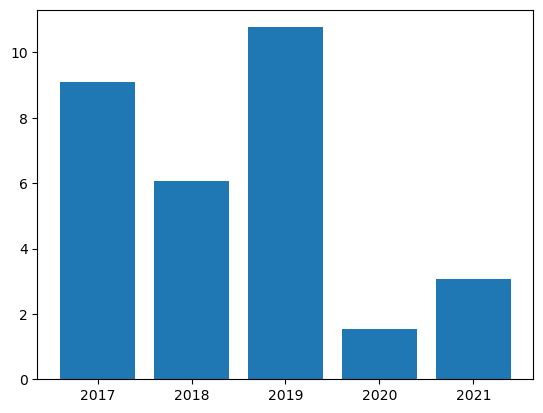

In [150]:
df_fluxo_co_curso_614_desistencia_anual = df_fluxo_co_curso_614[['Ano de Referência','Taxa de Desistência Anual - TADA']]
print(df_fluxo_co_curso_614_desistencia_anual)
plt.bar(x=df_fluxo_co_curso_614_desistencia_anual['Ano de Referência'], height=df_fluxo_co_curso_614_desistencia_anual['Taxa de Desistência Anual - TADA'])
plt.show()

## Vamos voltar aos dados do censo agora
Lembre-se que estamos lidando apenas com o curso de Ciência da Computação

In [10]:
df_censo_2017_co_curso_614

,CO_CURSO,NO_CURSO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,CO_CINE_ROTULO,NO_GRAU_ACADEMICO,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_DIMENSAO,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,CO_IES,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_ESPECIFICA,CO_CINE_AREA_DETALHADA,NO_CINE_AREA_DETALHADA,IN_GRATUITO,TP_NIVEL_ACADEMICO,QT_CURSO,QT_VG_TOTAL,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO,QT_VG_TOTAL_EAD,QT_VG_NOVA,QT_VG_PROC_SELETIVO,QT_VG_REMANESC,QT_VG_PROG_ESPECIAL,QT_INSCRITO_TOTAL,QT_INSCRITO_TOTAL_DIURNO,QT_INSCRITO_TOTAL_NOTURNO,QT_INSCRITO_TOTAL_EAD,QT_INSC_VG_NOVA,QT_INSC_PROC_SELETIVO,QT_INSC_VG_REMANESC,QT_INSC_VG_PROG_ESPECIAL,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_DIURNO,QT_MAT_NOTURNO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND,QT_CONC,QT_CONC_FEM,QT_CONC_MASC,QT_CONC_DIURNO,QT_CONC_NOTURNO,QT_CONC_0_17,QT_CONC_18_24,QT_CONC_25_29,QT_CONC_30_34,QT_CONC_35_39,QT_CONC_40_49,QT_CONC_50_59,QT_CONC_60_MAIS,QT_CONC_BRANCA,QT_CONC_PRETA,QT_CONC_PARDA,QT_CONC_AMARELA,QT_CONC_INDIGENA,QT_CONC_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_MAT_NACBRAS,QT_MAT_NACESTRANG,QT_CONC_NACBRAS,QT_CONC_NACESTRANG,QT_ALUNO_DEFICIENTE,QT_ING_DEFICIENTE,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_MAT_FINANC,QT_MAT_FINANC_REEMB,QT_MAT_FIES,QT_MAT_RPFIES,QT_MAT_FINANC_REEMB_OUTROS,QT_MAT_FINANC_NREEMB,QT_MAT_PROUNII,QT_MAT_PROUNIP,QT_MAT_NRPFIES,QT_MAT_FINANC_NREEMB_OUTROS,QT_CONC_FINANC,QT_CONC_FINANC_REEMB,QT_CONC_FIES,QT_CONC_RPFIES,QT_CONC_FINANC_REEMB_OUTROS,QT_CONC_FINANC_NREEMB,QT_CONC_PROUNII,QT_CONC_PROUNIP,QT_CONC_NRPFIES,QT_CONC_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_MAT_RESERVA_VAGA,QT_MAT_RVREDEPUBLICA,QT_MAT_RVETNICO,QT_MAT_RVPDEF,QT_MAT_RVSOCIAL_RF,QT_MAT_RVOUTROS,QT_CONC_RESERVA_VAGA,QT_CONC_RVREDEPUBLICA,QT_CONC_RVETNICO,QT_CONC_RVPDEF,QT_CONC_RVSOCIAL_RF,QT_CONC_RVOUTROS,QT_SIT_TRANCADA,QT_SIT_DESVINCULADO,QT_SIT_TRANSFERIDO,QT_SIT_FALECIDO,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA,QT_PARFOR,QT_ING_PARFOR,QT_MAT_PARFOR,QT_CONC_PARFOR,QT_APOIO_SOCIAL,QT_ING_APOIO_SOCIAL,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
113570,614,CIÊNCIA DA COMPUTAÇÃO,1,1,6,Bacharelado,2017,Sudeste,3,São Paulo,SP,35,São Carlos,3548906,0,1,1,1,1.0,7,6,Computação e Tecnologias da Informação e Comun...,61,Computação e Tecnologias da Informação e Comun...,614,Ciência da computação,1,1,1.0,71.0,71.0,0.0,0.0,62.0,0.0,9.0,0.0,934.0,934.0,0.0,0.0,925.0,0.0,9.0,0.0,66,20,46,66,0,60,2,58,0,0,0,0,0,6,0,0,1,62,3,0,0,0,0,0,12,2,3,4,2,43,298,46,252,298,0,1,241,48,6,2,0,0,0,149,14,35,17,2,81,36,0,36,36,0,0,20,14,1,1,0,0,0,29,3,3,1,0,0,65,1,294,4,34,2,2,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,25,0,0,22,44,0,1

## Agoras vamos selecionar apenas as colunas de interesse

In [11]:
df_censo_2017_co_curso_614_col_int = df_censo_2017_co_curso_614[["CO_CURSO","QT_ING","QT_ING_FEM","QT_ING_MASC","QT_ING_DIURNO","QT_ING_NOTURNO","QT_ING_VG_NOVA","QT_ING_VESTIBULAR","QT_ING_ENEM","QT_ING_AVALIACAO_SERIADA","QT_ING_SELECAO_SIMPLIFICA","QT_ING_EGR","QT_ING_OUTRO_TIPO_SELECAO","QT_ING_PROC_SELETIVO","QT_ING_VG_REMANESC","QT_ING_VG_PROG_ESPECIAL","QT_ING_OUTRA_FORMA","QT_ING_0_17","QT_ING_18_24","QT_ING_25_29","QT_ING_30_34","QT_ING_35_39","QT_ING_40_49","QT_ING_50_59","QT_ING_60_MAIS","QT_ING_BRANCA","QT_ING_PRETA","QT_ING_PARDA","QT_ING_AMARELA","QT_ING_INDIGENA","QT_ING_CORND","QT_ING_NACBRAS","QT_ING_NACESTRANG","QT_ING_DEFICIENTE","QT_ING_FINANC","QT_ING_FINANC_REEMB","QT_ING_FIES","QT_ING_RPFIES","QT_ING_FINANC_REEMB_OUTROS","QT_ING_FINANC_NREEMB","QT_ING_PROUNII","QT_ING_PROUNIP","QT_ING_NRPFIES","QT_ING_FINANC_NREEMB_OUTROS","QT_ING_RESERVA_VAGA","QT_ING_RVREDEPUBLICA","QT_ING_RVETNICO","QT_ING_RVPDEF","QT_ING_RVSOCIAL_RF","QT_ING_RVOUTROS","QT_ING_PROCESCPUBLICA","QT_ING_PROCESCPRIVADA","QT_ING_PROCNAOINFORMADA","QT_ING_PARFOR","QT_ING_APOIO_SOCIAL","QT_ING_ATIV_EXTRACURRICULAR","QT_ING_MOB_ACADEMICA"]]
df_censo_2017_co_curso_614_col_int

,CO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_ING_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_ING_PARFOR,QT_ING_APOIO_SOCIAL,QT_ING_ATIV_EXTRACURRICULAR,QT_ING_MOB_ACADEMICA
113570,614,66,20,46,66,0,60,2,58,0,0,0,0,0,6,0,0,1,62,3,0,0,0,0,0,12,2,3,4,2,43,65,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,44,0,0,0,0,0


## Processamento para poder comparar os dados entre cursos

Para conseguir comparar os dados entre cursos, em vez de usar os números nominais, vamos utilizar a porcentagem obtida dos dados de ingressantes divididos pelo número de ingressantes multiplicados por 100.

In [12]:
colunas_para_dividir = ["QT_ING_FEM","QT_ING_MASC","QT_ING_DIURNO","QT_ING_NOTURNO","QT_ING_VG_NOVA","QT_ING_VESTIBULAR","QT_ING_ENEM","QT_ING_AVALIACAO_SERIADA","QT_ING_SELECAO_SIMPLIFICA","QT_ING_EGR","QT_ING_OUTRO_TIPO_SELECAO","QT_ING_PROC_SELETIVO","QT_ING_VG_REMANESC","QT_ING_VG_PROG_ESPECIAL","QT_ING_OUTRA_FORMA","QT_ING_0_17","QT_ING_18_24","QT_ING_25_29","QT_ING_30_34","QT_ING_35_39","QT_ING_40_49","QT_ING_50_59","QT_ING_60_MAIS","QT_ING_BRANCA","QT_ING_PRETA","QT_ING_PARDA","QT_ING_AMARELA","QT_ING_INDIGENA","QT_ING_CORND","QT_ING_NACBRAS","QT_ING_NACESTRANG","QT_ING_DEFICIENTE","QT_ING_FINANC","QT_ING_FINANC_REEMB","QT_ING_FIES","QT_ING_RPFIES","QT_ING_FINANC_REEMB_OUTROS","QT_ING_FINANC_NREEMB","QT_ING_PROUNII","QT_ING_PROUNIP","QT_ING_NRPFIES","QT_ING_FINANC_NREEMB_OUTROS","QT_ING_RESERVA_VAGA","QT_ING_RVREDEPUBLICA","QT_ING_RVETNICO","QT_ING_RVPDEF","QT_ING_RVSOCIAL_RF","QT_ING_RVOUTROS","QT_ING_PROCESCPUBLICA","QT_ING_PROCESCPRIVADA","QT_ING_PROCNAOINFORMADA","QT_ING_PARFOR","QT_ING_APOIO_SOCIAL","QT_ING_ATIV_EXTRACURRICULAR","QT_ING_MOB_ACADEMICA"]

df_censo_2017_co_curso_614_col_int.loc[:, colunas_para_dividir] = df_censo_2017_co_curso_614_col_int.loc[:, colunas_para_dividir].div(df_censo_2017_co_curso_614_col_int["QT_ING"], axis=0)*100
df_censo_2017_co_curso_614_col_int

C:\Users\Marcos\AppData\Local\Temp\ipykernel_2072\2432290011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_censo_2017_co_curso_614_col_int.loc[:, colunas_para_dividir] = df_censo_2017_co_curso_614_col_int.loc[:, colunas_para_dividir].div(df_censo_2017_co_curso_614_col_int["QT_ING"], axis=0)*100


,CO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_ING_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_ING_PARFOR,QT_ING_APOIO_SOCIAL,QT_ING_ATIV_EXTRACURRICULAR,QT_ING_MOB_ACADEMICA
113570,614,66,30.30303,69.69697,100.0,0.0,90.909091,3.030303,87.878788,0.0,0.0,0.0,0.0,0.0,9.090909,0.0,0.0,1.515152,93.939394,4.545455,0.0,0.0,0.0,0.0,0.0,18.181818,3.030303,4.545455,6.060606,3.030303,65.151515,98.484848,1.515152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.333333,66.666667,0.0,0.0,0.0,0.0,0.0


## Gráfico de ingressantes por Sexo

In [13]:
df_censo_2017_co_curso_614_sexo = df_censo_2017_co_curso_614_col_int[['QT_ING_FEM','QT_ING_MASC']]
df_censo_2017_co_curso_614_sexo

,QT_ING_FEM,QT_ING_MASC
113570,30.30303,69.69697


<AxesSubplot:>

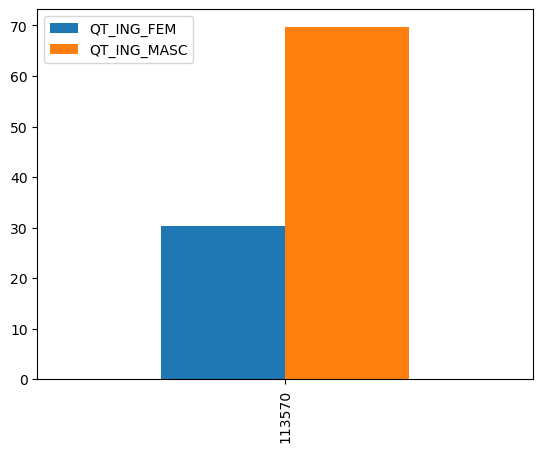

In [14]:
df_censo_2017_co_curso_614_sexo.plot(kind='bar')

## Gráfico de ingressantes por Horário

In [15]:
df_censo_2017_co_curso_614_horario = df_censo_2017_co_curso_614_col_int[['QT_ING_DIURNO','QT_ING_NOTURNO']]
df_censo_2017_co_curso_614_horario

,QT_ING_DIURNO,QT_ING_NOTURNO
113570,100.0,0.0


<AxesSubplot:>

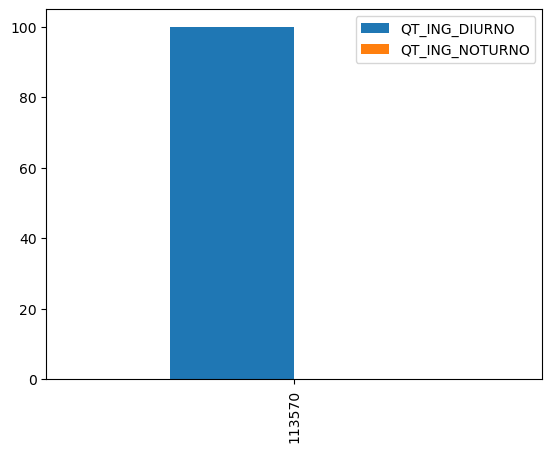

In [16]:
df_censo_2017_co_curso_614_horario.plot(kind='bar')

## Gráfico de ingressantes por Forma de Ingresso

In [17]:
df_censo_2017_co_curso_614_forma_ingresso = df_censo_2017_co_curso_614_col_int[['QT_ING_VG_NOVA', 'QT_ING_VESTIBULAR', 'QT_ING_ENEM', 'QT_ING_AVALIACAO_SERIADA', 'QT_ING_SELECAO_SIMPLIFICA', 'QT_ING_EGR', 'QT_ING_OUTRO_TIPO_SELECAO', 'QT_ING_PROC_SELETIVO', 'QT_ING_VG_REMANESC','QT_ING_VG_PROG_ESPECIAL', 'QT_ING_OUTRA_FORMA']]
df_censo_2017_co_curso_614_forma_ingresso

,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA
113570,90.909091,3.030303,87.878788,0.0,0.0,0.0,0.0,0.0,9.090909,0.0,0.0


- QT_ING_VG_NOVA	Quantidade de ingressantes em vagas novas
- QT_ING_VESTIBULAR	Quantidade de ingressantes por vestibular
- QT_ING_ENEM	Quantidade de ingressantes pelo ENEM
- QT_ING_AVALIACAO_SERIADA	Quantidade de ingressantes por meio da avaliação seriada
- QT_ING_SELECAO_SIMPLIFICA	Quantidade de ingressantes por meio de seleção simplificada
- QT_ING_EGR	Quantidade de alunos que se formaram em um curso de Bacharelado Interdisciplinar ou Licenciatura Interdisciplinar e que ingressaram em um curso de terminalidade
- QT_ING_OUTRO_TIPO_SELECAO	Quantidade de ingressantes em outro tipo de seleção 
- QT_ING_PROC_SELETIVO	Quantidade de ingressantes nos processos seletivos
- QT_ING_VG_REMANESC	Quantidade de ingressantes por meio de vagas remanescentes
- QT_ING_VG_PROG_ESPECIAL	Quantidade de ingressantes por meio de vagas para programas especiais
- QT_ING_OUTRA_FORMA	Quantidade de ingressantes por outras formas de ingresso


<AxesSubplot:>

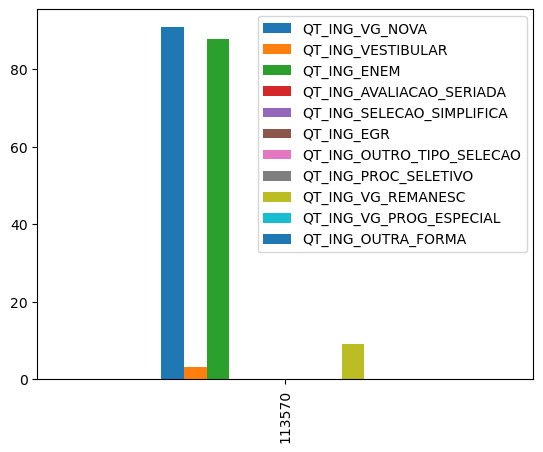

In [18]:
df_censo_2017_co_curso_614_forma_ingresso.plot(kind='bar')

## Gráfico de ingressantes por Idade

In [19]:
df_censo_2017_co_curso_614_idade = df_censo_2017_co_curso_614_col_int[['QT_ING_0_17', 'QT_ING_18_24', 'QT_ING_25_29', 'QT_ING_30_34', 'QT_ING_35_39', 'QT_ING_40_49', 'QT_ING_50_59', 'QT_ING_60_MAIS']]
df_censo_2017_co_curso_614_idade

,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS
113570,1.515152,93.939394,4.545455,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

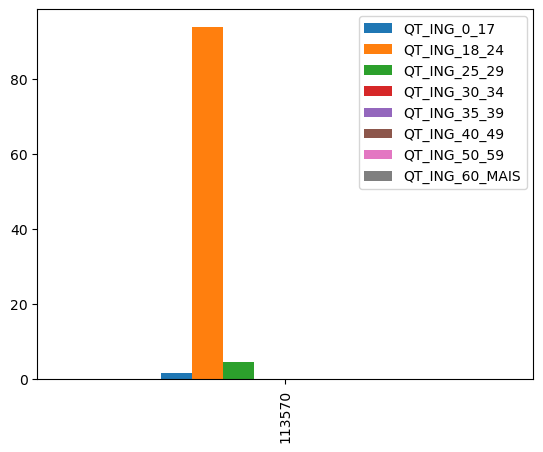

In [20]:
df_censo_2017_co_curso_614_idade.plot(kind='bar')

## Gráfico de ingressantes por Raça

In [21]:
df_censo_2017_co_curso_614_raca = df_censo_2017_co_curso_614_col_int[['QT_ING_BRANCA', 'QT_ING_PRETA', 'QT_ING_PARDA','QT_ING_AMARELA', 'QT_ING_INDIGENA', 'QT_ING_CORND']]
df_censo_2017_co_curso_614_raca

,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND
113570,18.181818,3.030303,4.545455,6.060606,3.030303,65.151515


<AxesSubplot:>

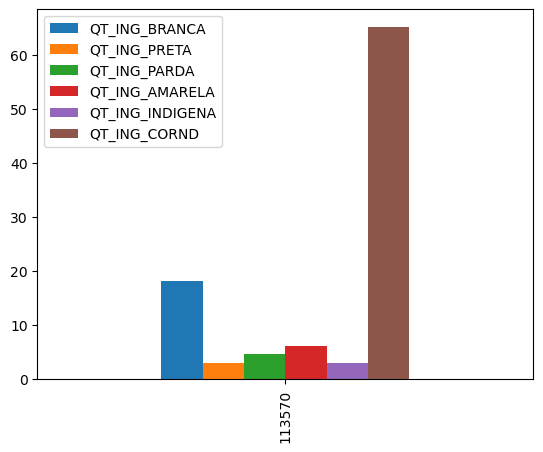

In [22]:
df_censo_2017_co_curso_614_raca.plot(kind='bar')

## Gráfico de ingressantes por Nacionalidade

In [23]:
df_censo_2017_co_curso_614_nacionalidade = df_censo_2017_co_curso_614_col_int[['QT_ING_NACBRAS', 'QT_ING_NACESTRANG']]
df_censo_2017_co_curso_614_nacionalidade

,QT_ING_NACBRAS,QT_ING_NACESTRANG
113570,98.484848,1.515152


<AxesSubplot:>

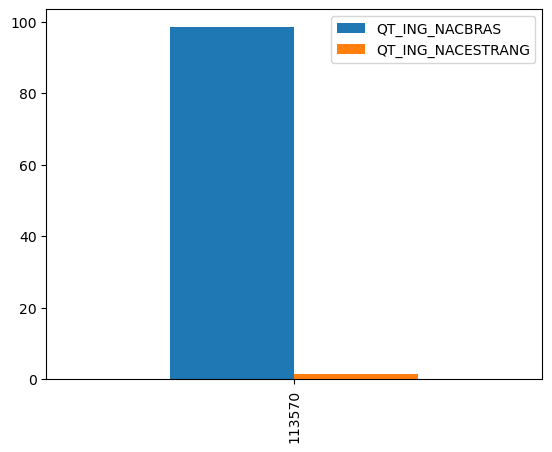

In [24]:
df_censo_2017_co_curso_614_nacionalidade.plot(kind='bar')

## Gráfico de ingressantes por Deficiência

In [25]:
df_censo_2017_co_curso_614_deficiencia = df_censo_2017_co_curso_614_col_int['QT_ING_DEFICIENTE']
df_censo_2017_co_curso_614_deficiencia

113570    0.0
Name: QT_ING_DEFICIENTE, dtype: float64

<AxesSubplot:>

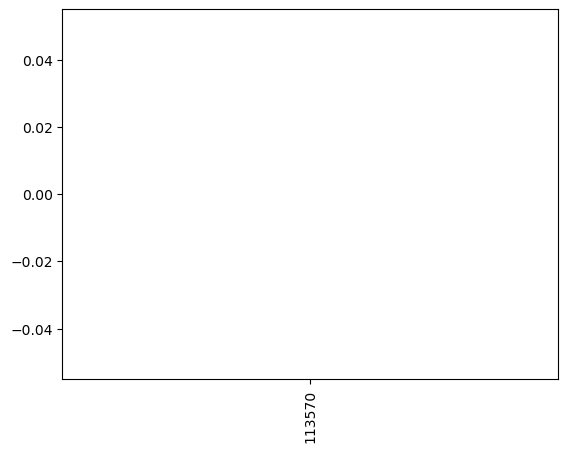

In [26]:
df_censo_2017_co_curso_614_deficiencia.plot(kind='bar')

## Gráfico de ingressantes por Financiamento

In [27]:
df_censo_2017_co_curso_614_financiamento = df_censo_2017_co_curso_614_col_int[['QT_ING_FINANC', 'QT_ING_FINANC_REEMB', 'QT_ING_FIES', 'QT_ING_RPFIES', 'QT_ING_FINANC_REEMB_OUTROS', 'QT_ING_FINANC_NREEMB', 'QT_ING_PROUNII', 'QT_ING_PROUNIP', 'QT_ING_NRPFIES', 'QT_ING_FINANC_NREEMB_OUTROS']]
df_censo_2017_co_curso_614_financiamento

,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS
113570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- QT_ING_FINANC	Quantidade de ingressantes - alunos que utilizam financiamento estudantil 
- QT_ING_FINANC_REEMB	Quantidade de ingressantes - alunos que utilizam financiamento estudantil reembolsável
- QT_ING_FIES	Quantidade de ingressantes - alunos que utilizam financiamento estudantil reembolsável  - FIES
- QT_ING_RPFIES	Quantidade de ingressantes - alunos que utilizam financiamento estudantil reembolsável - administrado pela instituição
- QT_ING_FINANC_REEMB_OUTROS	Quantidade de ingressantes - alunos que utilizam financiamento estudantil reembolsável - pelo governo estadual, municipal, entidades externas à IES e outras entidades
- QT_ING_FINANC_NREEMB	Quantidade de ingressantes - alunos que utilizam financiamento estudantil não reembolsável
- QT_ING_PROUNII	Quantidade de ingressantes - alunos que utilizam financiamento estudantil não reembolsável  - PROUNI Integral
- QT_ING_PROUNIP	Quantidade de ingressantes - alunos que utilizam financiamento estudantil não reembolsável  - PROUNI Parcial
- QT_ING_NRPFIES	Quantidade de ingressantes - alunos que utilizam financiamento estudantil não reembolsável - administrado pela instituição
- QT_ING_FINANC_NREEMB_OUTROS	Quantidade de ingressantes - alunos que utilizam financiamento estudantil não reembolsável - pelo governo estadual, municipal, entidades externas à IES e outras entidades

<AxesSubplot:>

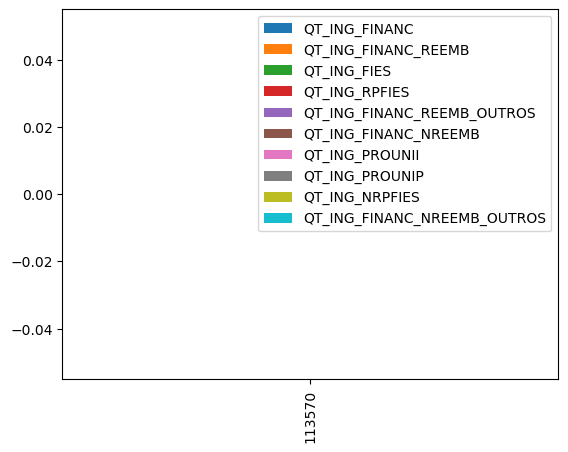

In [28]:
df_censo_2017_co_curso_614_financiamento.plot(kind='bar')

## Gráfico de ingressantes por Reserva de Vagas

In [29]:
df_censo_2017_co_curso_614_reserva_vagas = df_censo_2017_co_curso_614_col_int[['QT_ING_RESERVA_VAGA', 'QT_ING_RVREDEPUBLICA', 'QT_ING_RVETNICO', 'QT_ING_RVPDEF', 'QT_ING_RVSOCIAL_RF', 'QT_ING_RVOUTROS']]
df_censo_2017_co_curso_614_reserva_vagas

,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS
113570,0.0,0.0,0.0,0.0,0.0,0.0


- QT_ING_RESERVA_VAGA	Quantidade de ingressantes - alunos que participam do programa de reserva de vagas
- QT_ING_RVREDEPUBLICA	Quantidade de ingressantes - alunos que participam do programa de reserva de vagas - escola pública
- QT_ING_RVETNICO	Quantidade de ingressantes - alunos que participam do programa de reserva de vagas - cunho étnico
- QT_ING_RVPDEF	Quantidade de ingressantes - alunos que participam do programa de reserva de vagas - pessoas com deficiência
- QT_ING_RVSOCIAL_RF	Quantidade de ingressantes - alunos que participam do programa de reserva de vagas - cunho social/renda familiar
- QT_ING_RVOUTROS	Quantidade de ingressantes - alunos que participam do programa de reserva de vagas - outros tipos

<AxesSubplot:>

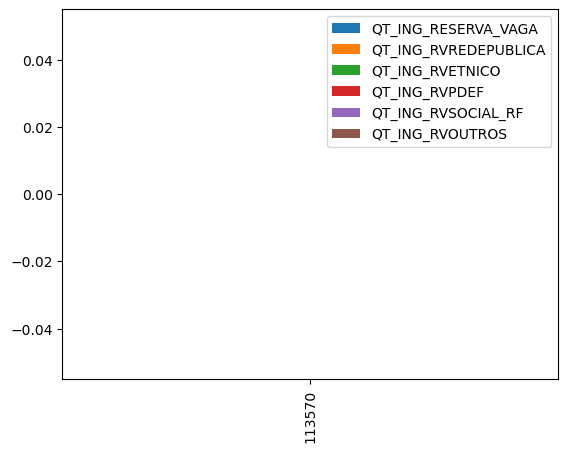

In [30]:
df_censo_2017_co_curso_614_reserva_vagas.plot(kind='bar')

## Gráfico de ingressantes por Escola Pública x Privada

In [31]:
df_censo_2017_co_curso_614_escola_pub_pri = df_censo_2017_co_curso_614_col_int[['QT_ING_PROCESCPUBLICA', 'QT_ING_PROCESCPRIVADA', 'QT_ING_PROCNAOINFORMADA']]
df_censo_2017_co_curso_614_escola_pub_pri

,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA
113570,33.333333,66.666667,0.0


<AxesSubplot:>

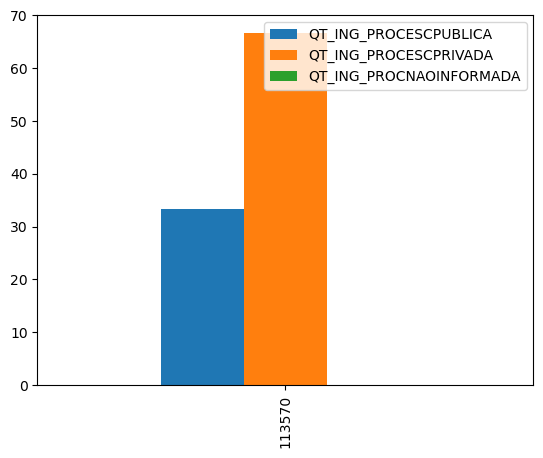

In [32]:
df_censo_2017_co_curso_614_escola_pub_pri.plot(kind='bar')

## Gráfico de ingressantes por Apoio Social

In [33]:
df_censo_2017_co_curso_614_apoio_social = df_censo_2017_co_curso_614_col_int['QT_ING_APOIO_SOCIAL']
df_censo_2017_co_curso_614_apoio_social

113570    0.0
Name: QT_ING_APOIO_SOCIAL, dtype: float64

- QT_APOIO_SOCIAL	Quantidade de alunos que recebem algum tipo de apoio social

<AxesSubplot:>

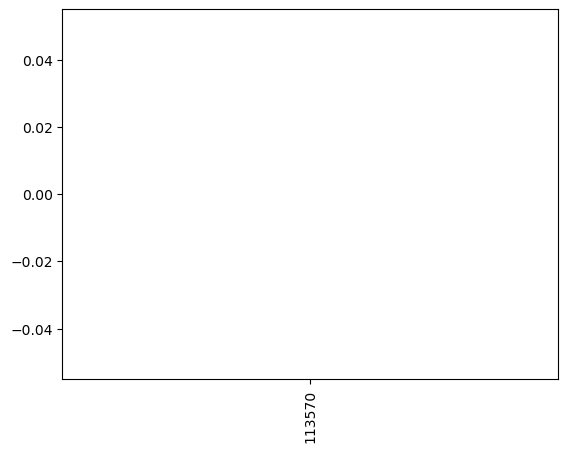

In [34]:
df_censo_2017_co_curso_614_apoio_social.plot(kind='bar')

## Gráfico de ingressantes por Atividade Extracurricular

- QT_ING_ATIV_EXTRACURRICULAR	Quantidade de ingressantes que participam de algum tipo de atividade extracurricular

In [35]:
df_censo_2017_co_curso_614_atividade_extra = df_censo_2017_co_curso_614_col_int['QT_ING_ATIV_EXTRACURRICULAR']
df_censo_2017_co_curso_614_atividade_extra

113570    0.0
Name: QT_ING_ATIV_EXTRACURRICULAR, dtype: float64

<AxesSubplot:>

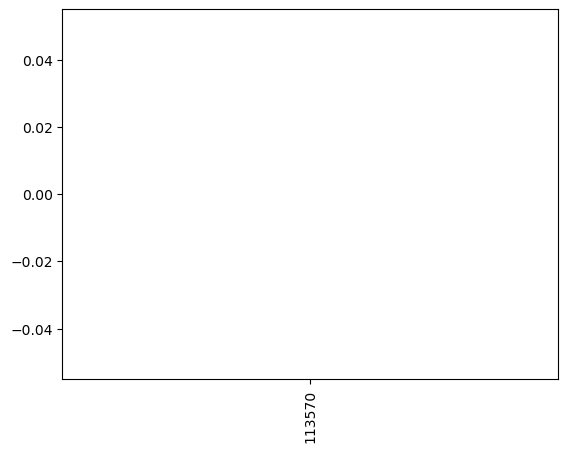

In [36]:
df_censo_2017_co_curso_614_atividade_extra.plot(kind='bar')

# Vamos fazer o mesmo procedimento para outro curso!

O curso agora será o curso de Direito da FMU cujo CO_CURSO é igual a 7940

In [37]:
df_censo_2017

,CO_CURSO,NO_CURSO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,CO_CINE_ROTULO,NO_GRAU_ACADEMICO,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_DIMENSAO,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,CO_IES,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_ESPECIFICA,CO_CINE_AREA_DETALHADA,NO_CINE_AREA_DETALHADA,IN_GRATUITO,TP_NIVEL_ACADEMICO,QT_CURSO,QT_VG_TOTAL,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO,QT_VG_TOTAL_EAD,QT_VG_NOVA,QT_VG_PROC_SELETIVO,QT_VG_REMANESC,QT_VG_PROG_ESPECIAL,QT_INSCRITO_TOTAL,QT_INSCRITO_TOTAL_DIURNO,QT_INSCRITO_TOTAL_NOTURNO,QT_INSCRITO_TOTAL_EAD,QT_INSC_VG_NOVA,QT_INSC_PROC_SELETIVO,QT_INSC_VG_REMANESC,QT_INSC_VG_PROG_ESPECIAL,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_DIURNO,QT_MAT_NOTURNO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND,QT_CONC,QT_CONC_FEM,QT_CONC_MASC,QT_CONC_DIURNO,QT_CONC_NOTURNO,QT_CONC_0_17,QT_CONC_18_24,QT_CONC_25_29,QT_CONC_30_34,QT_CONC_35_39,QT_CONC_40_49,QT_CONC_50_59,QT_CONC_60_MAIS,QT_CONC_BRANCA,QT_CONC_PRETA,QT_CONC_PARDA,QT_CONC_AMARELA,QT_CONC_INDIGENA,QT_CONC_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_MAT_NACBRAS,QT_MAT_NACESTRANG,QT_CONC_NACBRAS,QT_CONC_NACESTRANG,QT_ALUNO_DEFICIENTE,QT_ING_DEFICIENTE,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_MAT_FINANC,QT_MAT_FINANC_REEMB,QT_MAT_FIES,QT_MAT_RPFIES,QT_MAT_FINANC_REEMB_OUTROS,QT_MAT_FINANC_NREEMB,QT_MAT_PROUNII,QT_MAT_PROUNIP,QT_MAT_NRPFIES,QT_MAT_FINANC_NREEMB_OUTROS,QT_CONC_FINANC,QT_CONC_FINANC_REEMB,QT_CONC_FIES,QT_CONC_RPFIES,QT_CONC_FINANC_REEMB_OUTROS,QT_CONC_FINANC_NREEMB,QT_CONC_PROUNII,QT_CONC_PROUNIP,QT_CONC_NRPFIES,QT_CONC_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_MAT_RESERVA_VAGA,QT_MAT_RVREDEPUBLICA,QT_MAT_RVETNICO,QT_MAT_RVPDEF,QT_MAT_RVSOCIAL_RF,QT_MAT_RVOUTROS,QT_CONC_RESERVA_VAGA,QT_CONC_RVREDEPUBLICA,QT_CONC_RVETNICO,QT_CONC_RVPDEF,QT_CONC_RVSOCIAL_RF,QT_CONC_RVOUTROS,QT_SIT_TRANCADA,QT_SIT_DESVINCULADO,QT_SIT_TRANSFERIDO,QT_SIT_FALECIDO,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA,QT_PARFOR,QT_ING_PARFOR,QT_MAT_PARFOR,QT_CONC_PARFOR,QT_APOIO_SOCIAL,QT_ING_APOIO_SOCIAL,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
113570,614,CIÊNCIA DA COMPUTAÇÃO,1,1,6,Bacharelado,2017,Sudeste,3,São Paulo,SP,35,São Carlos,3548906,0,1,1,1,1.0,7,6,Computação e Tecnologias da Informação e Comun...,61,Computação e Tecnologias da Informação e Comun...,614,Ciência da computação,1,1,1.0,71.0,71.0,0.0,0.0,62.0,0.0,9.0,0.0,934.0,934.0,0.0,0.0,925.0,0.0,9.0,0.0,66,20,46,66,0,60,2,58,0,0,0,0,0,6,0,0,1,62,3,0,0,0,0,0,12,2,3,4,2,43,298,46,252,298,0,1,241,48,6,2,0,0,0,149,14,35,17,2,81,36,0,36,36,0,0,20,14,1,1,0,0,0,29,3,3,1,0,0,65,1,294,4,34,2,2,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,25,0,0,22,44,0,1

In [38]:
df_censo_2017_co_curso_7940 = df_censo_2017[df_censo_2017['CO_CURSO']==7940]
df_censo_2017_co_curso_7940

,CO_CURSO,NO_CURSO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,CO_CINE_ROTULO,NO_GRAU_ACADEMICO,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_DIMENSAO,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,CO_IES,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_ESPECIFICA,CO_CINE_AREA_DETALHADA,NO_CINE_AREA_DETALHADA,IN_GRATUITO,TP_NIVEL_ACADEMICO,QT_CURSO,QT_VG_TOTAL,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO,QT_VG_TOTAL_EAD,QT_VG_NOVA,QT_VG_PROC_SELETIVO,QT_VG_REMANESC,QT_VG_PROG_ESPECIAL,QT_INSCRITO_TOTAL,QT_INSCRITO_TOTAL_DIURNO,QT_INSCRITO_TOTAL_NOTURNO,QT_INSCRITO_TOTAL_EAD,QT_INSC_VG_NOVA,QT_INSC_PROC_SELETIVO,QT_INSC_VG_REMANESC,QT_INSC_VG_PROG_ESPECIAL,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_DIURNO,QT_MAT_NOTURNO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND,QT_CONC,QT_CONC_FEM,QT_CONC_MASC,QT_CONC_DIURNO,QT_CONC_NOTURNO,QT_CONC_0_17,QT_CONC_18_24,QT_CONC_25_29,QT_CONC_30_34,QT_CONC_35_39,QT_CONC_40_49,QT_CONC_50_59,QT_CONC_60_MAIS,QT_CONC_BRANCA,QT_CONC_PRETA,QT_CONC_PARDA,QT_CONC_AMARELA,QT_CONC_INDIGENA,QT_CONC_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_MAT_NACBRAS,QT_MAT_NACESTRANG,QT_CONC_NACBRAS,QT_CONC_NACESTRANG,QT_ALUNO_DEFICIENTE,QT_ING_DEFICIENTE,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_MAT_FINANC,QT_MAT_FINANC_REEMB,QT_MAT_FIES,QT_MAT_RPFIES,QT_MAT_FINANC_REEMB_OUTROS,QT_MAT_FINANC_NREEMB,QT_MAT_PROUNII,QT_MAT_PROUNIP,QT_MAT_NRPFIES,QT_MAT_FINANC_NREEMB_OUTROS,QT_CONC_FINANC,QT_CONC_FINANC_REEMB,QT_CONC_FIES,QT_CONC_RPFIES,QT_CONC_FINANC_REEMB_OUTROS,QT_CONC_FINANC_NREEMB,QT_CONC_PROUNII,QT_CONC_PROUNIP,QT_CONC_NRPFIES,QT_CONC_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_MAT_RESERVA_VAGA,QT_MAT_RVREDEPUBLICA,QT_MAT_RVETNICO,QT_MAT_RVPDEF,QT_MAT_RVSOCIAL_RF,QT_MAT_RVOUTROS,QT_CONC_RESERVA_VAGA,QT_CONC_RVREDEPUBLICA,QT_CONC_RVETNICO,QT_CONC_RVPDEF,QT_CONC_RVSOCIAL_RF,QT_CONC_RVOUTROS,QT_SIT_TRANCADA,QT_SIT_DESVINCULADO,QT_SIT_TRANSFERIDO,QT_SIT_FALECIDO,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA,QT_PARFOR,QT_ING_PARFOR,QT_MAT_PARFOR,QT_CONC_PARFOR,QT_APOIO_SOCIAL,QT_ING_APOIO_SOCIAL,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
114117,7940,DIREITO,1,1,4,Bacharelado,2017,Sudeste,3,São Paulo,SP,35,São Paulo,3550308,1,1,2,5,2.0,374,4,"Negócios, administração e direito",42,Direito,421,Direito,0,1,1.0,4021.0,1726.0,2295.0,0.0,3062.0,0.0,959.0,0.0,10144.0,3849.0,6295.0,0.0,9185.0,0.0,959.0,0.0,3680,2151,1529,1556,2124,2721,2721,0,0,0,0,0,0,959,0,0,15,2385,513,287,200,194,69,17,2251,305,863,69,14,178,9675,5722,3953,3624,6051,13,5850,1651,793,539,555,220,54,6379,690,2053,202,27,324,1248,753,495,426,822,0,538,331,145,87,87,45,15,907,68,209,29,2,33,3670,10,9643,32,1247,1,266,59,183,33,551,551,551,0,0,0,0,0,0,0,2452,2452,2452,0,0,0,0,0,0,0,12,12,12,0,0,0,0,0,

In [39]:
df_fluxo_co_curso_7940 = df_fluxo[df_fluxo['Código do Curso de Graduação'] == 7940]
df_fluxo_co_curso_7940

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Código da área do Curso segundo a classificação CINE BRASIL,Nome da área do Curso segundo a classificação CINE BRASIL,Código da Grande Área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA
34990,374,CENTRO UNIVERSITÁRIO DAS FACULDADES METROPOLIT...,5,2,7940,DIREITO,3.0,35.0,3550308.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2017,2017,6,2022,10,2026,3705,3111,0,592,2,84.012962,0.000000,15.987038,0.000000,15.987038
34991,374,CENTRO UNIVERSITÁRIO DAS FACULDADES METROPOLIT...,5,2,7940,DIREITO,3.0,35.0,3550308.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2017,2018,6,2022,10,2026,3705,2321,54,735,1,62.695840,1.458671,35.845489,1.458671,19.854133
34992,374,CENTRO UNIVERSITÁRIO DAS FACULDADES METROPOLIT...,5,2,7940,DIREITO,3.0,35.0,3550308.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2017,2019,6,2022,10,2026,3705,1706,28,587,0,46.083198,2.215019,51.701783,0.756348,15.856294
34993,374,CENTRO UNIVERSITÁRIO DAS FACULDADES METROPOLIT...,5,2,7940,DIREITO,3.0,35.0,3550308.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2017,2020,6,2022,10,2026,3705,1135,95,476,0,30.659103,4.781199,64.559697,2.566180,12.857915
34994,374,CENTRO UNIVERSITÁRIO DAS FACULDADES METROPOLIT...,5,2,7940,DIREITO,3.0,35.0,3550308.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2017,2021,6,2022,10,2026,3705,416,628,91,0,11.237169,21.745003,67.017828,16.963803,2.458131


In [40]:
df_fluxo_co_curso_7940[['Ano de Ingresso', 'Ano de Referência', 'Taxa de Permanência - TAP', 'Taxa de Conclusão Acumulada - TCA', 'Taxa de Desistência Acumulada - TDA', 'Taxa de Desistência Anual - TADA']]

,Ano de Ingresso,Ano de Referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Desistência Anual - TADA
34990,2017,2017,84.012962,0.000000,15.987038,15.987038
34991,2017,2018,62.695840,1.458671,35.845489,19.854133
34992,2017,2019,46.083198,2.215019,51.701783,15.856294
34993,2017,2020,30.659103,4.781199,64.559697,12.857915
34994,2017,2021,11.237169,21.745003,67.017828,2.458131


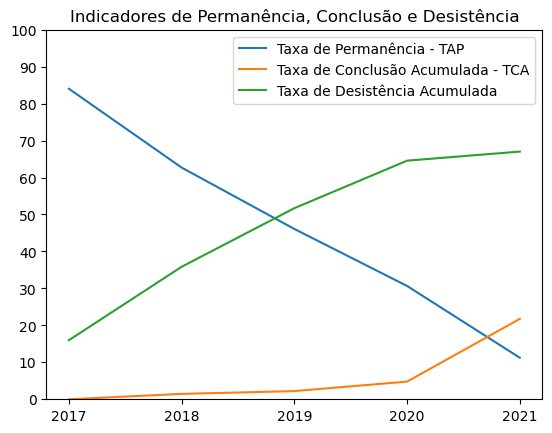

In [41]:
#Gráfico de indicadores
df_fluxo_co_curso_7940_ind = df_fluxo_co_curso_7940.reset_index()
df_fluxo_co_curso_7940_ind = df_fluxo_co_curso_7940_ind[['Ano de Referência','Taxa de Permanência - TAP', 'Taxa de Conclusão Acumulada - TCA', 'Taxa de Desistência Acumulada - TDA']]
plt.plot(df_fluxo_co_curso_7940_ind['Ano de Referência'], df_fluxo_co_curso_7940_ind['Taxa de Permanência - TAP'], label='Taxa de Permanência - TAP')
plt.plot(df_fluxo_co_curso_7940_ind['Ano de Referência'], df_fluxo_co_curso_7940_ind['Taxa de Conclusão Acumulada - TCA'], label='Taxa de Conclusão Acumulada - TCA')
plt.plot(df_fluxo_co_curso_7940_ind['Ano de Referência'], df_fluxo_co_curso_7940_ind['Taxa de Desistência Acumulada - TDA'], label='Taxa de Desistência Acumulada')
plt.xticks(df_fluxo_co_curso_7940_ind['Ano de Referência'])
plt.yticks(range(0, 101, 10))
plt.ylim(0, 100)
plt.title(f'Indicadores de Permanência, Conclusão e Desistência')
plt.legend()
plt.show()

       Ano de Referência  Taxa de Desistência Anual - TADA
34990               2017                         15.987038
34991               2018                         19.854133
34992               2019                         15.856294
34993               2020                         12.857915
34994               2021                          2.458131


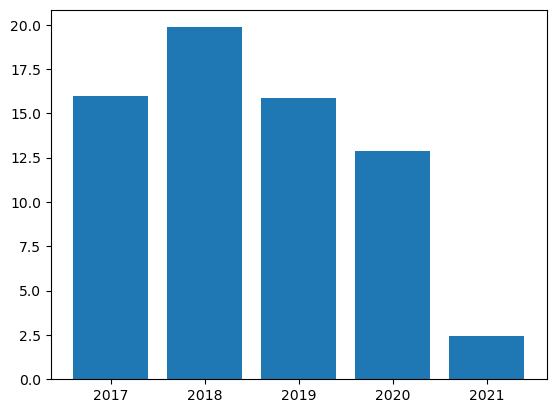

In [42]:
df_fluxo_co_curso_7940_desistencia_anual = df_fluxo_co_curso_7940[['Ano de Referência','Taxa de Desistência Anual - TADA']]
print(df_fluxo_co_curso_7940_desistencia_anual)
plt.bar(x=df_fluxo_co_curso_7940_desistencia_anual['Ano de Referência'], height=df_fluxo_co_curso_7940_desistencia_anual['Taxa de Desistência Anual - TADA'])
plt.show()

In [43]:
df_censo_2017_co_curso_7940

,CO_CURSO,NO_CURSO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,CO_CINE_ROTULO,NO_GRAU_ACADEMICO,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_DIMENSAO,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,CO_IES,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_ESPECIFICA,CO_CINE_AREA_DETALHADA,NO_CINE_AREA_DETALHADA,IN_GRATUITO,TP_NIVEL_ACADEMICO,QT_CURSO,QT_VG_TOTAL,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO,QT_VG_TOTAL_EAD,QT_VG_NOVA,QT_VG_PROC_SELETIVO,QT_VG_REMANESC,QT_VG_PROG_ESPECIAL,QT_INSCRITO_TOTAL,QT_INSCRITO_TOTAL_DIURNO,QT_INSCRITO_TOTAL_NOTURNO,QT_INSCRITO_TOTAL_EAD,QT_INSC_VG_NOVA,QT_INSC_PROC_SELETIVO,QT_INSC_VG_REMANESC,QT_INSC_VG_PROG_ESPECIAL,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_DIURNO,QT_MAT_NOTURNO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND,QT_CONC,QT_CONC_FEM,QT_CONC_MASC,QT_CONC_DIURNO,QT_CONC_NOTURNO,QT_CONC_0_17,QT_CONC_18_24,QT_CONC_25_29,QT_CONC_30_34,QT_CONC_35_39,QT_CONC_40_49,QT_CONC_50_59,QT_CONC_60_MAIS,QT_CONC_BRANCA,QT_CONC_PRETA,QT_CONC_PARDA,QT_CONC_AMARELA,QT_CONC_INDIGENA,QT_CONC_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_MAT_NACBRAS,QT_MAT_NACESTRANG,QT_CONC_NACBRAS,QT_CONC_NACESTRANG,QT_ALUNO_DEFICIENTE,QT_ING_DEFICIENTE,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_MAT_FINANC,QT_MAT_FINANC_REEMB,QT_MAT_FIES,QT_MAT_RPFIES,QT_MAT_FINANC_REEMB_OUTROS,QT_MAT_FINANC_NREEMB,QT_MAT_PROUNII,QT_MAT_PROUNIP,QT_MAT_NRPFIES,QT_MAT_FINANC_NREEMB_OUTROS,QT_CONC_FINANC,QT_CONC_FINANC_REEMB,QT_CONC_FIES,QT_CONC_RPFIES,QT_CONC_FINANC_REEMB_OUTROS,QT_CONC_FINANC_NREEMB,QT_CONC_PROUNII,QT_CONC_PROUNIP,QT_CONC_NRPFIES,QT_CONC_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_MAT_RESERVA_VAGA,QT_MAT_RVREDEPUBLICA,QT_MAT_RVETNICO,QT_MAT_RVPDEF,QT_MAT_RVSOCIAL_RF,QT_MAT_RVOUTROS,QT_CONC_RESERVA_VAGA,QT_CONC_RVREDEPUBLICA,QT_CONC_RVETNICO,QT_CONC_RVPDEF,QT_CONC_RVSOCIAL_RF,QT_CONC_RVOUTROS,QT_SIT_TRANCADA,QT_SIT_DESVINCULADO,QT_SIT_TRANSFERIDO,QT_SIT_FALECIDO,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA,QT_PARFOR,QT_ING_PARFOR,QT_MAT_PARFOR,QT_CONC_PARFOR,QT_APOIO_SOCIAL,QT_ING_APOIO_SOCIAL,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
114117,7940,DIREITO,1,1,4,Bacharelado,2017,Sudeste,3,São Paulo,SP,35,São Paulo,3550308,1,1,2,5,2.0,374,4,"Negócios, administração e direito",42,Direito,421,Direito,0,1,1.0,4021.0,1726.0,2295.0,0.0,3062.0,0.0,959.0,0.0,10144.0,3849.0,6295.0,0.0,9185.0,0.0,959.0,0.0,3680,2151,1529,1556,2124,2721,2721,0,0,0,0,0,0,959,0,0,15,2385,513,287,200,194,69,17,2251,305,863,69,14,178,9675,5722,3953,3624,6051,13,5850,1651,793,539,555,220,54,6379,690,2053,202,27,324,1248,753,495,426,822,0,538,331,145,87,87,45,15,907,68,209,29,2,33,3670,10,9643,32,1247,1,266,59,183,33,551,551,551,0,0,0,0,0,0,0,2452,2452,2452,0,0,0,0,0,0,0,12,12,12,0,0,0,0,0,

In [44]:
df_censo_2017_co_curso_7940_col_int = df_censo_2017_co_curso_7940[["CO_CURSO","QT_ING","QT_ING_FEM","QT_ING_MASC","QT_ING_DIURNO","QT_ING_NOTURNO","QT_ING_VG_NOVA","QT_ING_VESTIBULAR","QT_ING_ENEM","QT_ING_AVALIACAO_SERIADA","QT_ING_SELECAO_SIMPLIFICA","QT_ING_EGR","QT_ING_OUTRO_TIPO_SELECAO","QT_ING_PROC_SELETIVO","QT_ING_VG_REMANESC","QT_ING_VG_PROG_ESPECIAL","QT_ING_OUTRA_FORMA","QT_ING_0_17","QT_ING_18_24","QT_ING_25_29","QT_ING_30_34","QT_ING_35_39","QT_ING_40_49","QT_ING_50_59","QT_ING_60_MAIS","QT_ING_BRANCA","QT_ING_PRETA","QT_ING_PARDA","QT_ING_AMARELA","QT_ING_INDIGENA","QT_ING_CORND","QT_ING_NACBRAS","QT_ING_NACESTRANG","QT_ING_DEFICIENTE","QT_ING_FINANC","QT_ING_FINANC_REEMB","QT_ING_FIES","QT_ING_RPFIES","QT_ING_FINANC_REEMB_OUTROS","QT_ING_FINANC_NREEMB","QT_ING_PROUNII","QT_ING_PROUNIP","QT_ING_NRPFIES","QT_ING_FINANC_NREEMB_OUTROS","QT_ING_RESERVA_VAGA","QT_ING_RVREDEPUBLICA","QT_ING_RVETNICO","QT_ING_RVPDEF","QT_ING_RVSOCIAL_RF","QT_ING_RVOUTROS","QT_ING_PROCESCPUBLICA","QT_ING_PROCESCPRIVADA","QT_ING_PROCNAOINFORMADA","QT_ING_PARFOR","QT_ING_APOIO_SOCIAL","QT_ING_ATIV_EXTRACURRICULAR","QT_ING_MOB_ACADEMICA"]]
df_censo_2017_co_curso_7940_col_int

,CO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_ING_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_ING_PARFOR,QT_ING_APOIO_SOCIAL,QT_ING_ATIV_EXTRACURRICULAR,QT_ING_MOB_ACADEMICA
114117,7940,3680,2151,1529,1556,2124,2721,2721,0,0,0,0,0,0,959,0,0,15,2385,513,287,200,194,69,17,2251,305,863,69,14,178,3670,10,59,551,551,551,0,0,0,0,0,0,0,0,0,0,0,0,0,2144,1536,0,0,0,4,0


In [45]:
colunas_para_dividir = ["QT_ING_FEM","QT_ING_MASC","QT_ING_DIURNO","QT_ING_NOTURNO","QT_ING_VG_NOVA","QT_ING_VESTIBULAR","QT_ING_ENEM","QT_ING_AVALIACAO_SERIADA","QT_ING_SELECAO_SIMPLIFICA","QT_ING_EGR","QT_ING_OUTRO_TIPO_SELECAO","QT_ING_PROC_SELETIVO","QT_ING_VG_REMANESC","QT_ING_VG_PROG_ESPECIAL","QT_ING_OUTRA_FORMA","QT_ING_0_17","QT_ING_18_24","QT_ING_25_29","QT_ING_30_34","QT_ING_35_39","QT_ING_40_49","QT_ING_50_59","QT_ING_60_MAIS","QT_ING_BRANCA","QT_ING_PRETA","QT_ING_PARDA","QT_ING_AMARELA","QT_ING_INDIGENA","QT_ING_CORND","QT_ING_NACBRAS","QT_ING_NACESTRANG","QT_ING_DEFICIENTE","QT_ING_FINANC","QT_ING_FINANC_REEMB","QT_ING_FIES","QT_ING_RPFIES","QT_ING_FINANC_REEMB_OUTROS","QT_ING_FINANC_NREEMB","QT_ING_PROUNII","QT_ING_PROUNIP","QT_ING_NRPFIES","QT_ING_FINANC_NREEMB_OUTROS","QT_ING_RESERVA_VAGA","QT_ING_RVREDEPUBLICA","QT_ING_RVETNICO","QT_ING_RVPDEF","QT_ING_RVSOCIAL_RF","QT_ING_RVOUTROS","QT_ING_PROCESCPUBLICA","QT_ING_PROCESCPRIVADA","QT_ING_PROCNAOINFORMADA","QT_ING_PARFOR","QT_ING_APOIO_SOCIAL","QT_ING_ATIV_EXTRACURRICULAR","QT_ING_MOB_ACADEMICA"]

df_censo_2017_co_curso_7940_col_int.loc[:, colunas_para_dividir] = df_censo_2017_co_curso_7940_col_int.loc[:, colunas_para_dividir].div(df_censo_2017_co_curso_7940_col_int["QT_ING"], axis=0)*100
df_censo_2017_co_curso_7940_col_int

C:\Users\Marcos\AppData\Local\Temp\ipykernel_2072\3741289059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_censo_2017_co_curso_7940_col_int.loc[:, colunas_para_dividir] = df_censo_2017_co_curso_7940_col_int.loc[:, colunas_para_dividir].div(df_censo_2017_co_curso_7940_col_int["QT_ING"], axis=0)*100


,CO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_ING_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_ING_PARFOR,QT_ING_APOIO_SOCIAL,QT_ING_ATIV_EXTRACURRICULAR,QT_ING_MOB_ACADEMICA
114117,7940,3680,58.451087,41.548913,42.282609,57.717391,73.940217,73.940217,0.0,0.0,0.0,0.0,0.0,0.0,26.059783,0.0,0.0,0.407609,64.809783,13.940217,7.798913,5.434783,5.271739,1.875,0.461957,61.168478,8.288043,23.451087,1.875,0.380435,4.836957,99.728261,0.271739,1.603261,14.972826,14.972826,14.972826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.26087,41.73913,0.0,0.0,0.0,0.108696,0.0


In [46]:
df_censo_2017_co_curso_7940_sexo = df_censo_2017_co_curso_7940_col_int[['QT_ING_FEM','QT_ING_MASC']]
df_censo_2017_co_curso_7940_sexo

,QT_ING_FEM,QT_ING_MASC
114117,58.451087,41.548913


<AxesSubplot:>

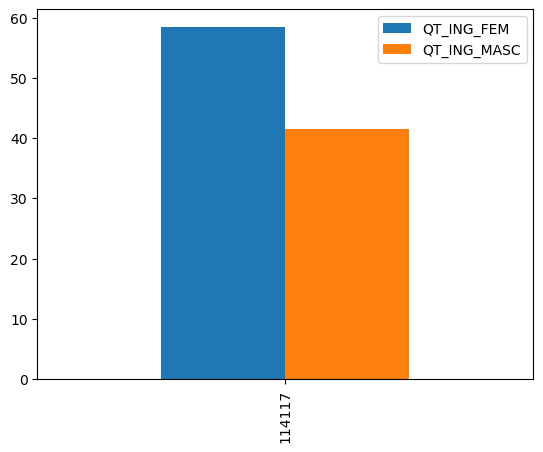

In [47]:
df_censo_2017_co_curso_7940_sexo.plot(kind='bar')

In [48]:
df_censo_2017_co_curso_7940_horario = df_censo_2017_co_curso_7940_col_int[['QT_ING_DIURNO','QT_ING_NOTURNO']]
df_censo_2017_co_curso_7940_horario

,QT_ING_DIURNO,QT_ING_NOTURNO
114117,42.282609,57.717391


<AxesSubplot:>

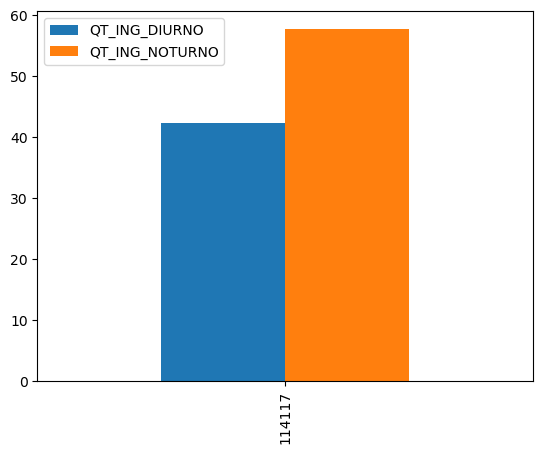

In [49]:
df_censo_2017_co_curso_7940_horario.plot(kind='bar')

In [50]:
df_censo_2017_co_curso_7940_forma_ingresso = df_censo_2017_co_curso_7940_col_int[['QT_ING_VG_NOVA', 'QT_ING_VESTIBULAR', 'QT_ING_ENEM', 'QT_ING_AVALIACAO_SERIADA', 'QT_ING_SELECAO_SIMPLIFICA', 'QT_ING_EGR', 'QT_ING_OUTRO_TIPO_SELECAO', 'QT_ING_PROC_SELETIVO', 'QT_ING_VG_REMANESC','QT_ING_VG_PROG_ESPECIAL', 'QT_ING_OUTRA_FORMA']]
df_censo_2017_co_curso_7940_forma_ingresso

,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA
114117,73.940217,73.940217,0.0,0.0,0.0,0.0,0.0,0.0,26.059783,0.0,0.0


<AxesSubplot:>

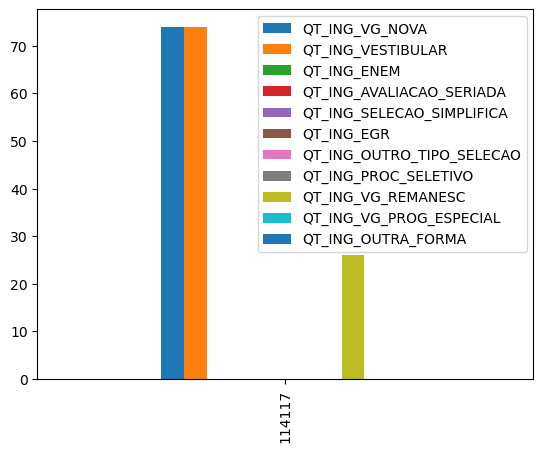

In [51]:
df_censo_2017_co_curso_7940_forma_ingresso.plot(kind='bar')

In [52]:
df_censo_2017_co_curso_7940_idade = df_censo_2017_co_curso_7940_col_int[['QT_ING_0_17', 'QT_ING_18_24', 'QT_ING_25_29', 'QT_ING_30_34', 'QT_ING_35_39', 'QT_ING_40_49', 'QT_ING_50_59', 'QT_ING_60_MAIS']]
df_censo_2017_co_curso_7940_idade

,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS
114117,0.407609,64.809783,13.940217,7.798913,5.434783,5.271739,1.875,0.461957


<AxesSubplot:>

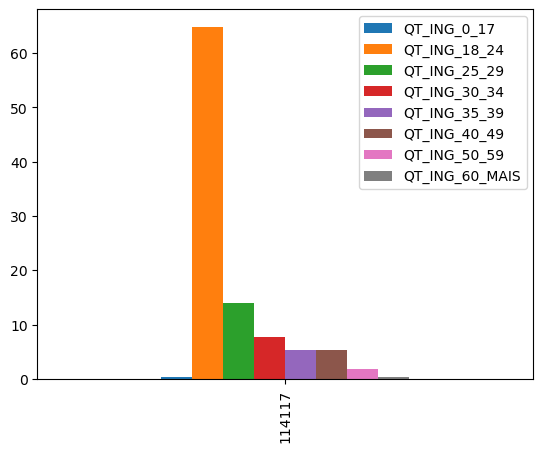

In [53]:
df_censo_2017_co_curso_7940_idade.plot(kind='bar')

In [54]:
df_censo_2017_co_curso_7940_raca = df_censo_2017_co_curso_7940_col_int[['QT_ING_BRANCA', 'QT_ING_PRETA', 'QT_ING_PARDA','QT_ING_AMARELA', 'QT_ING_INDIGENA', 'QT_ING_CORND']]
df_censo_2017_co_curso_7940_raca

,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND
114117,61.168478,8.288043,23.451087,1.875,0.380435,4.836957


<AxesSubplot:>

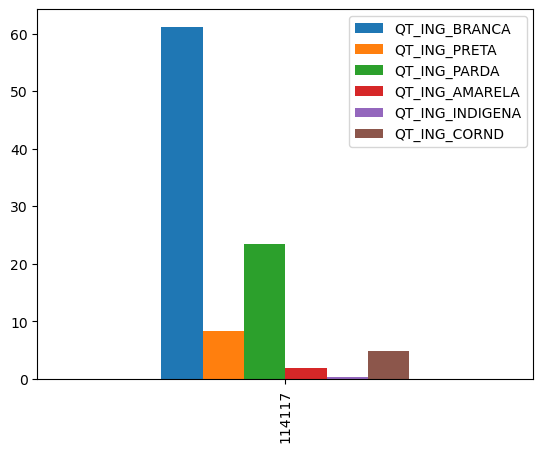

In [55]:
df_censo_2017_co_curso_7940_raca.plot(kind='bar')

In [56]:
df_censo_2017_co_curso_7940_nacionalidade = df_censo_2017_co_curso_7940_col_int[['QT_ING_NACBRAS', 'QT_ING_NACESTRANG']]
df_censo_2017_co_curso_7940_nacionalidade

,QT_ING_NACBRAS,QT_ING_NACESTRANG
114117,99.728261,0.271739


<AxesSubplot:>

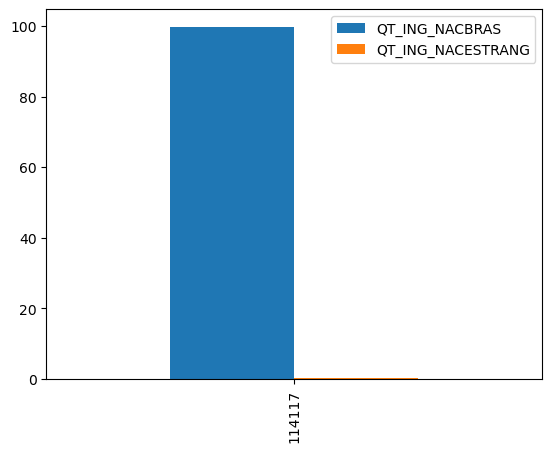

In [57]:
df_censo_2017_co_curso_7940_nacionalidade.plot(kind='bar')

In [58]:
df_censo_2017_co_curso_7940_deficiencia = df_censo_2017_co_curso_7940_col_int['QT_ING_DEFICIENTE']
df_censo_2017_co_curso_7940_deficiencia

114117    1.603261
Name: QT_ING_DEFICIENTE, dtype: float64

<AxesSubplot:>

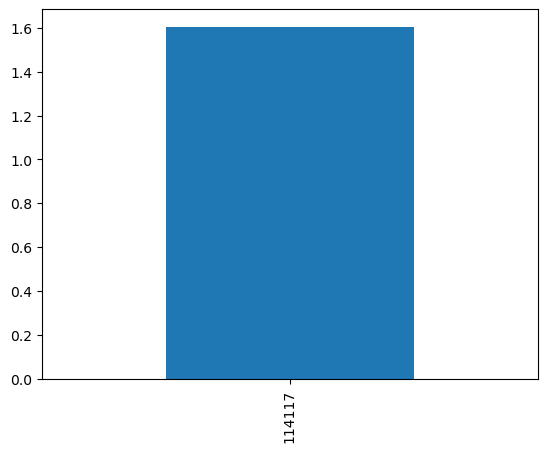

In [59]:
df_censo_2017_co_curso_7940_deficiencia.plot(kind='bar')

In [60]:
df_censo_2017_co_curso_7940_financiamento = df_censo_2017_co_curso_7940_col_int[['QT_ING_FINANC', 'QT_ING_FINANC_REEMB', 'QT_ING_FIES', 'QT_ING_RPFIES', 'QT_ING_FINANC_REEMB_OUTROS', 'QT_ING_FINANC_NREEMB', 'QT_ING_PROUNII', 'QT_ING_PROUNIP', 'QT_ING_NRPFIES', 'QT_ING_FINANC_NREEMB_OUTROS']]
df_censo_2017_co_curso_7940_financiamento

,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS
114117,14.972826,14.972826,14.972826,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

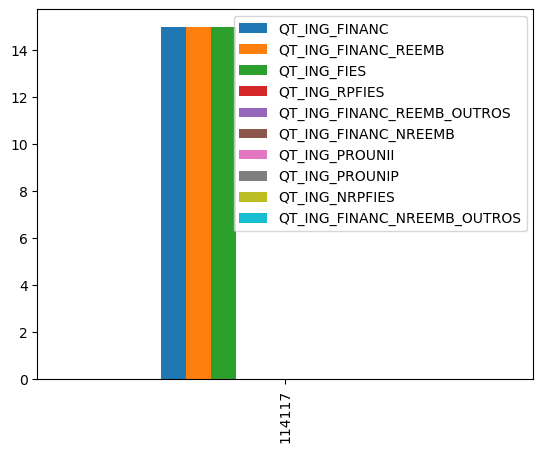

In [61]:
df_censo_2017_co_curso_7940_financiamento.plot(kind='bar')

In [62]:
df_censo_2017_co_curso_7940_reserva_vagas = df_censo_2017_co_curso_7940_col_int[['QT_ING_RESERVA_VAGA', 'QT_ING_RVREDEPUBLICA', 'QT_ING_RVETNICO', 'QT_ING_RVPDEF', 'QT_ING_RVSOCIAL_RF', 'QT_ING_RVOUTROS']]
df_censo_2017_co_curso_7940_reserva_vagas

,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS
114117,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

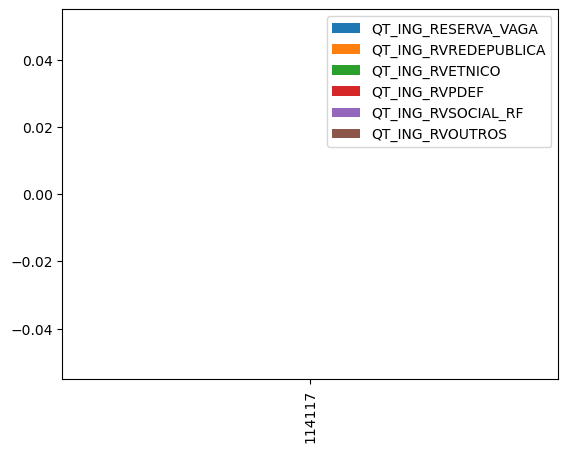

In [63]:
df_censo_2017_co_curso_7940_reserva_vagas.plot(kind='bar')

In [64]:
df_censo_2017_co_curso_7940_escola_pub_pri = df_censo_2017_co_curso_7940_col_int[['QT_ING_PROCESCPUBLICA', 'QT_ING_PROCESCPRIVADA', 'QT_ING_PROCNAOINFORMADA']]
df_censo_2017_co_curso_7940_escola_pub_pri

,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA
114117,58.26087,41.73913,0.0


<AxesSubplot:>

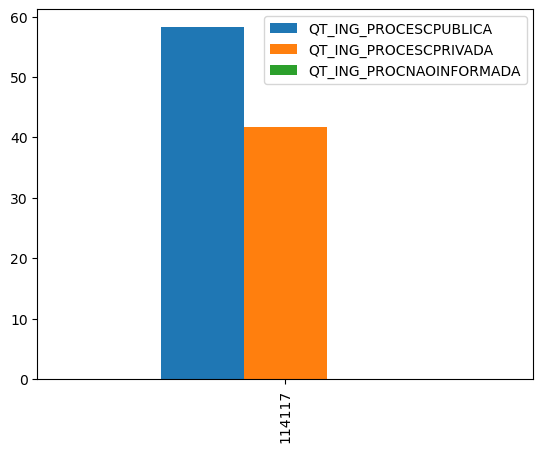

In [65]:
df_censo_2017_co_curso_7940_escola_pub_pri.plot(kind='bar')

In [66]:
df_censo_2017_co_curso_7940_apoio_social = df_censo_2017_co_curso_7940_col_int['QT_ING_APOIO_SOCIAL']
df_censo_2017_co_curso_7940_apoio_social

114117    0.0
Name: QT_ING_APOIO_SOCIAL, dtype: float64

<AxesSubplot:>

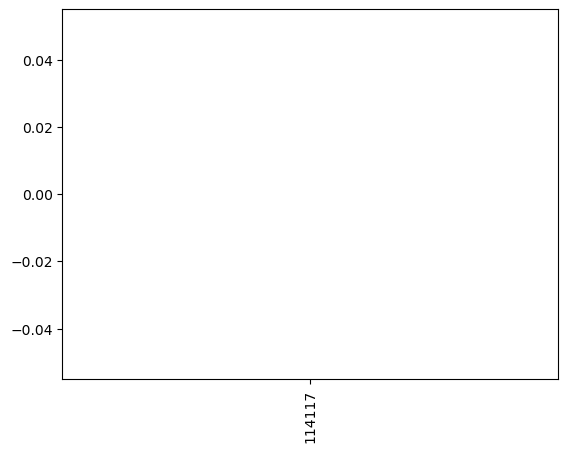

In [67]:
df_censo_2017_co_curso_7940_apoio_social.plot(kind='bar')

In [68]:
df_censo_2017_co_curso_7940_atividade_extra = df_censo_2017_co_curso_7940_col_int['QT_ING_ATIV_EXTRACURRICULAR']
df_censo_2017_co_curso_7940_atividade_extra

114117    0.108696
Name: QT_ING_ATIV_EXTRACURRICULAR, dtype: float64

<AxesSubplot:>

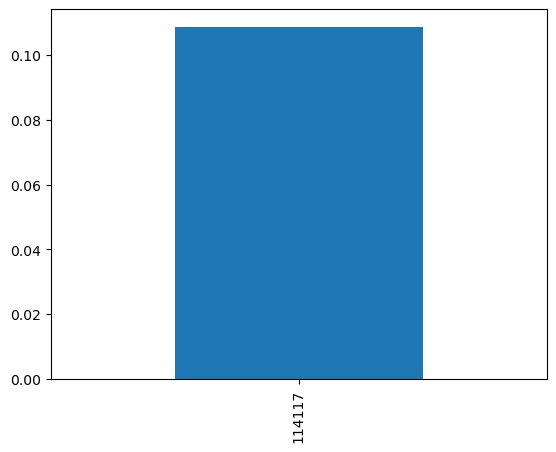

In [69]:
df_censo_2017_co_curso_7940_atividade_extra.plot(kind='bar')

# Vamos fazer o mesmo procedimento para mais um curso!
O curso agora será o curso INTERDISCIPLINAR EM CIÊNCIA E TECNOLOGIA da UFABC cujo CO_CURSO é igual a 97512

In [70]:
df_censo_2017

,CO_CURSO,NO_CURSO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,CO_CINE_ROTULO,NO_GRAU_ACADEMICO,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_DIMENSAO,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,CO_IES,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_ESPECIFICA,CO_CINE_AREA_DETALHADA,NO_CINE_AREA_DETALHADA,IN_GRATUITO,TP_NIVEL_ACADEMICO,QT_CURSO,QT_VG_TOTAL,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO,QT_VG_TOTAL_EAD,QT_VG_NOVA,QT_VG_PROC_SELETIVO,QT_VG_REMANESC,QT_VG_PROG_ESPECIAL,QT_INSCRITO_TOTAL,QT_INSCRITO_TOTAL_DIURNO,QT_INSCRITO_TOTAL_NOTURNO,QT_INSCRITO_TOTAL_EAD,QT_INSC_VG_NOVA,QT_INSC_PROC_SELETIVO,QT_INSC_VG_REMANESC,QT_INSC_VG_PROG_ESPECIAL,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_DIURNO,QT_MAT_NOTURNO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND,QT_CONC,QT_CONC_FEM,QT_CONC_MASC,QT_CONC_DIURNO,QT_CONC_NOTURNO,QT_CONC_0_17,QT_CONC_18_24,QT_CONC_25_29,QT_CONC_30_34,QT_CONC_35_39,QT_CONC_40_49,QT_CONC_50_59,QT_CONC_60_MAIS,QT_CONC_BRANCA,QT_CONC_PRETA,QT_CONC_PARDA,QT_CONC_AMARELA,QT_CONC_INDIGENA,QT_CONC_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_MAT_NACBRAS,QT_MAT_NACESTRANG,QT_CONC_NACBRAS,QT_CONC_NACESTRANG,QT_ALUNO_DEFICIENTE,QT_ING_DEFICIENTE,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_MAT_FINANC,QT_MAT_FINANC_REEMB,QT_MAT_FIES,QT_MAT_RPFIES,QT_MAT_FINANC_REEMB_OUTROS,QT_MAT_FINANC_NREEMB,QT_MAT_PROUNII,QT_MAT_PROUNIP,QT_MAT_NRPFIES,QT_MAT_FINANC_NREEMB_OUTROS,QT_CONC_FINANC,QT_CONC_FINANC_REEMB,QT_CONC_FIES,QT_CONC_RPFIES,QT_CONC_FINANC_REEMB_OUTROS,QT_CONC_FINANC_NREEMB,QT_CONC_PROUNII,QT_CONC_PROUNIP,QT_CONC_NRPFIES,QT_CONC_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_MAT_RESERVA_VAGA,QT_MAT_RVREDEPUBLICA,QT_MAT_RVETNICO,QT_MAT_RVPDEF,QT_MAT_RVSOCIAL_RF,QT_MAT_RVOUTROS,QT_CONC_RESERVA_VAGA,QT_CONC_RVREDEPUBLICA,QT_CONC_RVETNICO,QT_CONC_RVPDEF,QT_CONC_RVSOCIAL_RF,QT_CONC_RVOUTROS,QT_SIT_TRANCADA,QT_SIT_DESVINCULADO,QT_SIT_TRANSFERIDO,QT_SIT_FALECIDO,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA,QT_PARFOR,QT_ING_PARFOR,QT_MAT_PARFOR,QT_CONC_PARFOR,QT_APOIO_SOCIAL,QT_ING_APOIO_SOCIAL,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
113570,614,CIÊNCIA DA COMPUTAÇÃO,1,1,6,Bacharelado,2017,Sudeste,3,São Paulo,SP,35,São Carlos,3548906,0,1,1,1,1.0,7,6,Computação e Tecnologias da Informação e Comun...,61,Computação e Tecnologias da Informação e Comun...,614,Ciência da computação,1,1,1.0,71.0,71.0,0.0,0.0,62.0,0.0,9.0,0.0,934.0,934.0,0.0,0.0,925.0,0.0,9.0,0.0,66,20,46,66,0,60,2,58,0,0,0,0,0,6,0,0,1,62,3,0,0,0,0,0,12,2,3,4,2,43,298,46,252,298,0,1,241,48,6,2,0,0,0,149,14,35,17,2,81,36,0,36,36,0,0,20,14,1,1,0,0,0,29,3,3,1,0,0,65,1,294,4,34,2,2,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,25,0,0,22,44,0,1

In [71]:
df_censo_2017_co_curso_97512 = df_censo_2017[df_censo_2017['CO_CURSO']==97512]
df_censo_2017_co_curso_97512

,CO_CURSO,NO_CURSO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,CO_CINE_ROTULO,NO_GRAU_ACADEMICO,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_DIMENSAO,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,CO_IES,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_ESPECIFICA,CO_CINE_AREA_DETALHADA,NO_CINE_AREA_DETALHADA,IN_GRATUITO,TP_NIVEL_ACADEMICO,QT_CURSO,QT_VG_TOTAL,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO,QT_VG_TOTAL_EAD,QT_VG_NOVA,QT_VG_PROC_SELETIVO,QT_VG_REMANESC,QT_VG_PROG_ESPECIAL,QT_INSCRITO_TOTAL,QT_INSCRITO_TOTAL_DIURNO,QT_INSCRITO_TOTAL_NOTURNO,QT_INSCRITO_TOTAL_EAD,QT_INSC_VG_NOVA,QT_INSC_PROC_SELETIVO,QT_INSC_VG_REMANESC,QT_INSC_VG_PROG_ESPECIAL,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_DIURNO,QT_MAT_NOTURNO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND,QT_CONC,QT_CONC_FEM,QT_CONC_MASC,QT_CONC_DIURNO,QT_CONC_NOTURNO,QT_CONC_0_17,QT_CONC_18_24,QT_CONC_25_29,QT_CONC_30_34,QT_CONC_35_39,QT_CONC_40_49,QT_CONC_50_59,QT_CONC_60_MAIS,QT_CONC_BRANCA,QT_CONC_PRETA,QT_CONC_PARDA,QT_CONC_AMARELA,QT_CONC_INDIGENA,QT_CONC_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_MAT_NACBRAS,QT_MAT_NACESTRANG,QT_CONC_NACBRAS,QT_CONC_NACESTRANG,QT_ALUNO_DEFICIENTE,QT_ING_DEFICIENTE,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_MAT_FINANC,QT_MAT_FINANC_REEMB,QT_MAT_FIES,QT_MAT_RPFIES,QT_MAT_FINANC_REEMB_OUTROS,QT_MAT_FINANC_NREEMB,QT_MAT_PROUNII,QT_MAT_PROUNIP,QT_MAT_NRPFIES,QT_MAT_FINANC_NREEMB_OUTROS,QT_CONC_FINANC,QT_CONC_FINANC_REEMB,QT_CONC_FIES,QT_CONC_RPFIES,QT_CONC_FINANC_REEMB_OUTROS,QT_CONC_FINANC_NREEMB,QT_CONC_PROUNII,QT_CONC_PROUNIP,QT_CONC_NRPFIES,QT_CONC_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_MAT_RESERVA_VAGA,QT_MAT_RVREDEPUBLICA,QT_MAT_RVETNICO,QT_MAT_RVPDEF,QT_MAT_RVSOCIAL_RF,QT_MAT_RVOUTROS,QT_CONC_RESERVA_VAGA,QT_CONC_RVREDEPUBLICA,QT_CONC_RVETNICO,QT_CONC_RVPDEF,QT_CONC_RVSOCIAL_RF,QT_CONC_RVOUTROS,QT_SIT_TRANCADA,QT_SIT_DESVINCULADO,QT_SIT_TRANSFERIDO,QT_SIT_FALECIDO,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA,QT_PARFOR,QT_ING_PARFOR,QT_MAT_PARFOR,QT_CONC_PARFOR,QT_APOIO_SOCIAL,QT_ING_APOIO_SOCIAL,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
119537,97512,INTERDISCIPLINAR EM CIÊNCIA E TECNOLOGIA,1,1,5,Bacharelado,2017,Sudeste,3,São Paulo,SP,35,Santo André,3547809,0,1,1,1,1.0,4925,5,"Ciências naturais, matemática e estatística",58,Programas interdisciplinares abrangendo ciênci...,588,Programas interdisciplinares abrangendo ciênci...,1,1,1.0,1384.0,694.0,690.0,0.0,1125.0,0.0,259.0,0.0,9076.0,3716.0,5360.0,0.0,8732.0,0.0,344.0,0.0,1215,345,870,609,606,1125,0,1125,0,0,0,0,0,87,0,3,4,1063,101,25,9,10,3,0,733,72,296,57,3,54,5238,1479,3759,2455,2783,4,3941,977,202,61,42,10,1,1977,334,852,150,7,1918,691,231,460,312,379,0,381,256,45,6,3,0,0,30,47,41,2,0,571,1214,1,5233,5,

In [72]:
df_fluxo_co_curso_97512 = df_fluxo[df_fluxo['Código do Curso de Graduação'] == 97512]
df_fluxo_co_curso_97512

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Código da área do Curso segundo a classificação CINE BRASIL,Nome da área do Curso segundo a classificação CINE BRASIL,Código da Grande Área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA
139915,4925,FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC,1,1,97512,INTERDISCIPLINAR EM CIÊNCIA E TECNOLOGIA,3.0,35.0,3547809.0,1,1,0588P01,Programas interdisciplinares abrangendo ciênci...,5,"Ciências naturais, matemática e estatística",2017,2017,4,2020,6,2022,1278,1253,2,23,0,98.043818,0.156495,1.799687,0.156495,1.799687
139916,4925,FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC,1,1,97512,INTERDISCIPLINAR EM CIÊNCIA E TECNOLOGIA,3.0,35.0,3547809.0,1,1,0588P01,Programas interdisciplinares abrangendo ciênci...,5,"Ciências naturais, matemática e estatística",2017,2018,4,2020,6,2022,1278,1125,2,125,1,88.097103,0.313234,11.589663,0.156617,9.788567
139917,4925,FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC,1,1,97512,INTERDISCIPLINAR EM CIÊNCIA E TECNOLOGIA,3.0,35.0,3547809.0,1,1,0588P01,Programas interdisciplinares abrangendo ciênci...,5,"Ciências naturais, matemática e estatística",2017,2019,4,2020,6,2022,1278,989,4,132,0,77.447142,0.626468,21.926390,0.313234,10.336727
139918,4925,FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC,1,1,97512,INTERDISCIPLINAR EM CIÊNCIA E TECNOLOGIA,3.0,35.0,3547809.0,1,1,0588P01,Programas interdisciplinares abrangendo ciênci...,5,"Ciências naturais, matemática e estatística",2017,2020,4,2020,6,2022,1278,901,21,66,1,70.611285,2.272727,27.115987,1.645768,5.172414
139919,4925,FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC,1,1,97512,INTERDISCIPLINAR EM CIÊNCIA E TECNOLOGIA,3.0,35.0,3547809.0,1,1,0588P01,Programas interdisciplinares abrangendo ciênci...,5,"Ciências naturais, matemática e estatística",2017,2021,4,2020,6,2022,1278,759,121,21,0,59.482759,11.755486,28.761755,9.482759,1.645768


In [73]:
df_fluxo_co_curso_97512[['Ano de Ingresso', 'Ano de Referência', 'Taxa de Permanência - TAP', 'Taxa de Conclusão Acumulada - TCA', 'Taxa de Desistência Acumulada - TDA', 'Taxa de Desistência Anual - TADA']]

,Ano de Ingresso,Ano de Referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Desistência Anual - TADA
139915,2017,2017,98.043818,0.156495,1.799687,1.799687
139916,2017,2018,88.097103,0.313234,11.589663,9.788567
139917,2017,2019,77.447142,0.626468,21.926390,10.336727
139918,2017,2020,70.611285,2.272727,27.115987,5.172414
139919,2017,2021,59.482759,11.755486,28.761755,1.645768


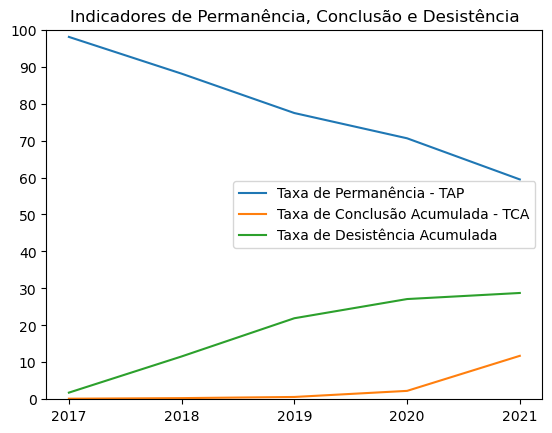

In [74]:
#Gráfico de indicadores
df_fluxo_co_curso_97512_ind = df_fluxo_co_curso_97512.reset_index()
df_fluxo_co_curso_97512_ind = df_fluxo_co_curso_97512_ind[['Ano de Referência','Taxa de Permanência - TAP', 'Taxa de Conclusão Acumulada - TCA', 'Taxa de Desistência Acumulada - TDA']]
plt.plot(df_fluxo_co_curso_97512_ind['Ano de Referência'], df_fluxo_co_curso_97512_ind['Taxa de Permanência - TAP'], label='Taxa de Permanência - TAP')
plt.plot(df_fluxo_co_curso_97512_ind['Ano de Referência'], df_fluxo_co_curso_97512_ind['Taxa de Conclusão Acumulada - TCA'], label='Taxa de Conclusão Acumulada - TCA')
plt.plot(df_fluxo_co_curso_97512_ind['Ano de Referência'], df_fluxo_co_curso_97512_ind['Taxa de Desistência Acumulada - TDA'], label='Taxa de Desistência Acumulada')
plt.xticks(df_fluxo_co_curso_97512_ind['Ano de Referência'])
plt.yticks(range(0, 101, 10))
plt.ylim(0, 100)
plt.title(f'Indicadores de Permanência, Conclusão e Desistência')
plt.legend()
plt.show()

        Ano de Referência  Taxa de Desistência Anual - TADA
139915               2017                          1.799687
139916               2018                          9.788567
139917               2019                         10.336727
139918               2020                          5.172414
139919               2021                          1.645768


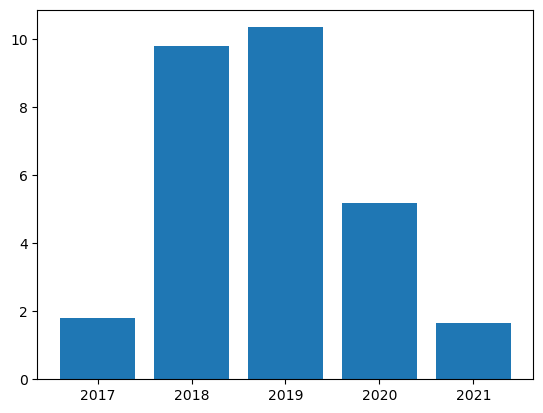

In [75]:
df_fluxo_co_curso_97512_desistencia_anual = df_fluxo_co_curso_97512[['Ano de Referência','Taxa de Desistência Anual - TADA']]
print(df_fluxo_co_curso_97512_desistencia_anual)
plt.bar(x=df_fluxo_co_curso_97512_desistencia_anual['Ano de Referência'], height=df_fluxo_co_curso_97512_desistencia_anual['Taxa de Desistência Anual - TADA'])
plt.show()

In [76]:
df_censo_2017_co_curso_97512

,CO_CURSO,NO_CURSO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,CO_CINE_ROTULO,NO_GRAU_ACADEMICO,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_DIMENSAO,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,CO_IES,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_ESPECIFICA,CO_CINE_AREA_DETALHADA,NO_CINE_AREA_DETALHADA,IN_GRATUITO,TP_NIVEL_ACADEMICO,QT_CURSO,QT_VG_TOTAL,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO,QT_VG_TOTAL_EAD,QT_VG_NOVA,QT_VG_PROC_SELETIVO,QT_VG_REMANESC,QT_VG_PROG_ESPECIAL,QT_INSCRITO_TOTAL,QT_INSCRITO_TOTAL_DIURNO,QT_INSCRITO_TOTAL_NOTURNO,QT_INSCRITO_TOTAL_EAD,QT_INSC_VG_NOVA,QT_INSC_PROC_SELETIVO,QT_INSC_VG_REMANESC,QT_INSC_VG_PROG_ESPECIAL,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_DIURNO,QT_MAT_NOTURNO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND,QT_CONC,QT_CONC_FEM,QT_CONC_MASC,QT_CONC_DIURNO,QT_CONC_NOTURNO,QT_CONC_0_17,QT_CONC_18_24,QT_CONC_25_29,QT_CONC_30_34,QT_CONC_35_39,QT_CONC_40_49,QT_CONC_50_59,QT_CONC_60_MAIS,QT_CONC_BRANCA,QT_CONC_PRETA,QT_CONC_PARDA,QT_CONC_AMARELA,QT_CONC_INDIGENA,QT_CONC_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_MAT_NACBRAS,QT_MAT_NACESTRANG,QT_CONC_NACBRAS,QT_CONC_NACESTRANG,QT_ALUNO_DEFICIENTE,QT_ING_DEFICIENTE,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_MAT_FINANC,QT_MAT_FINANC_REEMB,QT_MAT_FIES,QT_MAT_RPFIES,QT_MAT_FINANC_REEMB_OUTROS,QT_MAT_FINANC_NREEMB,QT_MAT_PROUNII,QT_MAT_PROUNIP,QT_MAT_NRPFIES,QT_MAT_FINANC_NREEMB_OUTROS,QT_CONC_FINANC,QT_CONC_FINANC_REEMB,QT_CONC_FIES,QT_CONC_RPFIES,QT_CONC_FINANC_REEMB_OUTROS,QT_CONC_FINANC_NREEMB,QT_CONC_PROUNII,QT_CONC_PROUNIP,QT_CONC_NRPFIES,QT_CONC_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_MAT_RESERVA_VAGA,QT_MAT_RVREDEPUBLICA,QT_MAT_RVETNICO,QT_MAT_RVPDEF,QT_MAT_RVSOCIAL_RF,QT_MAT_RVOUTROS,QT_CONC_RESERVA_VAGA,QT_CONC_RVREDEPUBLICA,QT_CONC_RVETNICO,QT_CONC_RVPDEF,QT_CONC_RVSOCIAL_RF,QT_CONC_RVOUTROS,QT_SIT_TRANCADA,QT_SIT_DESVINCULADO,QT_SIT_TRANSFERIDO,QT_SIT_FALECIDO,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA,QT_PARFOR,QT_ING_PARFOR,QT_MAT_PARFOR,QT_CONC_PARFOR,QT_APOIO_SOCIAL,QT_ING_APOIO_SOCIAL,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
119537,97512,INTERDISCIPLINAR EM CIÊNCIA E TECNOLOGIA,1,1,5,Bacharelado,2017,Sudeste,3,São Paulo,SP,35,Santo André,3547809,0,1,1,1,1.0,4925,5,"Ciências naturais, matemática e estatística",58,Programas interdisciplinares abrangendo ciênci...,588,Programas interdisciplinares abrangendo ciênci...,1,1,1.0,1384.0,694.0,690.0,0.0,1125.0,0.0,259.0,0.0,9076.0,3716.0,5360.0,0.0,8732.0,0.0,344.0,0.0,1215,345,870,609,606,1125,0,1125,0,0,0,0,0,87,0,3,4,1063,101,25,9,10,3,0,733,72,296,57,3,54,5238,1479,3759,2455,2783,4,3941,977,202,61,42,10,1,1977,334,852,150,7,1918,691,231,460,312,379,0,381,256,45,6,3,0,0,30,47,41,2,0,571,1214,1,5233,5,

In [77]:
df_censo_2017_co_curso_97512_col_int = df_censo_2017_co_curso_97512[["CO_CURSO","QT_ING","QT_ING_FEM","QT_ING_MASC","QT_ING_DIURNO","QT_ING_NOTURNO","QT_ING_VG_NOVA","QT_ING_VESTIBULAR","QT_ING_ENEM","QT_ING_AVALIACAO_SERIADA","QT_ING_SELECAO_SIMPLIFICA","QT_ING_EGR","QT_ING_OUTRO_TIPO_SELECAO","QT_ING_PROC_SELETIVO","QT_ING_VG_REMANESC","QT_ING_VG_PROG_ESPECIAL","QT_ING_OUTRA_FORMA","QT_ING_0_17","QT_ING_18_24","QT_ING_25_29","QT_ING_30_34","QT_ING_35_39","QT_ING_40_49","QT_ING_50_59","QT_ING_60_MAIS","QT_ING_BRANCA","QT_ING_PRETA","QT_ING_PARDA","QT_ING_AMARELA","QT_ING_INDIGENA","QT_ING_CORND","QT_ING_NACBRAS","QT_ING_NACESTRANG","QT_ING_DEFICIENTE","QT_ING_FINANC","QT_ING_FINANC_REEMB","QT_ING_FIES","QT_ING_RPFIES","QT_ING_FINANC_REEMB_OUTROS","QT_ING_FINANC_NREEMB","QT_ING_PROUNII","QT_ING_PROUNIP","QT_ING_NRPFIES","QT_ING_FINANC_NREEMB_OUTROS","QT_ING_RESERVA_VAGA","QT_ING_RVREDEPUBLICA","QT_ING_RVETNICO","QT_ING_RVPDEF","QT_ING_RVSOCIAL_RF","QT_ING_RVOUTROS","QT_ING_PROCESCPUBLICA","QT_ING_PROCESCPRIVADA","QT_ING_PROCNAOINFORMADA","QT_ING_PARFOR","QT_ING_APOIO_SOCIAL","QT_ING_ATIV_EXTRACURRICULAR","QT_ING_MOB_ACADEMICA"]]
df_censo_2017_co_curso_97512_col_int

,CO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_ING_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_ING_PARFOR,QT_ING_APOIO_SOCIAL,QT_ING_ATIV_EXTRACURRICULAR,QT_ING_MOB_ACADEMICA
119537,97512,1215,345,870,609,606,1125,0,1125,0,0,0,0,0,87,0,3,4,1063,101,25,9,10,3,0,733,72,296,57,3,54,1214,1,35,0,0,0,0,0,0,0,0,0,0,597,565,195,32,279,0,663,552,0,0,117,99,1


In [78]:
colunas_para_dividir = ["QT_ING_FEM","QT_ING_MASC","QT_ING_DIURNO","QT_ING_NOTURNO","QT_ING_VG_NOVA","QT_ING_VESTIBULAR","QT_ING_ENEM","QT_ING_AVALIACAO_SERIADA","QT_ING_SELECAO_SIMPLIFICA","QT_ING_EGR","QT_ING_OUTRO_TIPO_SELECAO","QT_ING_PROC_SELETIVO","QT_ING_VG_REMANESC","QT_ING_VG_PROG_ESPECIAL","QT_ING_OUTRA_FORMA","QT_ING_0_17","QT_ING_18_24","QT_ING_25_29","QT_ING_30_34","QT_ING_35_39","QT_ING_40_49","QT_ING_50_59","QT_ING_60_MAIS","QT_ING_BRANCA","QT_ING_PRETA","QT_ING_PARDA","QT_ING_AMARELA","QT_ING_INDIGENA","QT_ING_CORND","QT_ING_NACBRAS","QT_ING_NACESTRANG","QT_ING_DEFICIENTE","QT_ING_FINANC","QT_ING_FINANC_REEMB","QT_ING_FIES","QT_ING_RPFIES","QT_ING_FINANC_REEMB_OUTROS","QT_ING_FINANC_NREEMB","QT_ING_PROUNII","QT_ING_PROUNIP","QT_ING_NRPFIES","QT_ING_FINANC_NREEMB_OUTROS","QT_ING_RESERVA_VAGA","QT_ING_RVREDEPUBLICA","QT_ING_RVETNICO","QT_ING_RVPDEF","QT_ING_RVSOCIAL_RF","QT_ING_RVOUTROS","QT_ING_PROCESCPUBLICA","QT_ING_PROCESCPRIVADA","QT_ING_PROCNAOINFORMADA","QT_ING_PARFOR","QT_ING_APOIO_SOCIAL","QT_ING_ATIV_EXTRACURRICULAR","QT_ING_MOB_ACADEMICA"]

df_censo_2017_co_curso_97512_col_int.loc[:, colunas_para_dividir] = df_censo_2017_co_curso_97512_col_int.loc[:, colunas_para_dividir].div(df_censo_2017_co_curso_97512_col_int["QT_ING"], axis=0)*100
df_censo_2017_co_curso_97512_col_int

C:\Users\Marcos\AppData\Local\Temp\ipykernel_2072\2512364849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_censo_2017_co_curso_97512_col_int.loc[:, colunas_para_dividir] = df_censo_2017_co_curso_97512_col_int.loc[:, colunas_para_dividir].div(df_censo_2017_co_curso_97512_col_int["QT_ING"], axis=0)*100


,CO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_ING_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_ING_PARFOR,QT_ING_APOIO_SOCIAL,QT_ING_ATIV_EXTRACURRICULAR,QT_ING_MOB_ACADEMICA
119537,97512,1215,28.395062,71.604938,50.123457,49.876543,92.592593,0.0,92.592593,0.0,0.0,0.0,0.0,0.0,7.160494,0.0,0.246914,0.329218,87.489712,8.312757,2.057613,0.740741,0.823045,0.246914,0.0,60.329218,5.925926,24.36214,4.691358,0.246914,4.444444,99.917695,0.082305,2.880658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.135802,46.502058,16.049383,2.633745,22.962963,0.0,54.567901,45.432099,0.0,0.0,9.62963,8.148148,0.082305


In [79]:
df_censo_2017_co_curso_97512_sexo = df_censo_2017_co_curso_97512_col_int[['QT_ING_FEM','QT_ING_MASC']]
df_censo_2017_co_curso_97512_sexo

,QT_ING_FEM,QT_ING_MASC
119537,28.395062,71.604938


<AxesSubplot:>

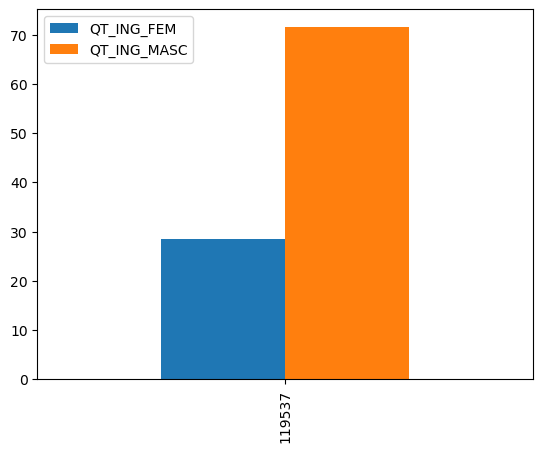

In [80]:
df_censo_2017_co_curso_97512_sexo.plot(kind='bar')

In [81]:
df_censo_2017_co_curso_97512_horario = df_censo_2017_co_curso_97512_col_int[['QT_ING_DIURNO','QT_ING_NOTURNO']]
df_censo_2017_co_curso_97512_horario

,QT_ING_DIURNO,QT_ING_NOTURNO
119537,50.123457,49.876543


<AxesSubplot:>

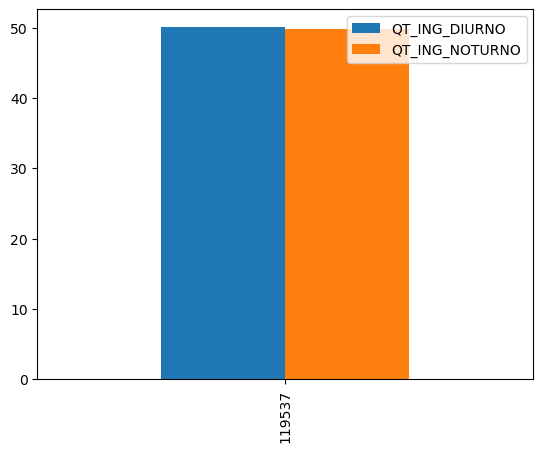

In [82]:
df_censo_2017_co_curso_97512_horario.plot(kind='bar')

In [83]:
df_censo_2017_co_curso_97512_forma_ingresso = df_censo_2017_co_curso_97512_col_int[['QT_ING_VG_NOVA', 'QT_ING_VESTIBULAR', 'QT_ING_ENEM', 'QT_ING_AVALIACAO_SERIADA', 'QT_ING_SELECAO_SIMPLIFICA', 'QT_ING_EGR', 'QT_ING_OUTRO_TIPO_SELECAO', 'QT_ING_PROC_SELETIVO', 'QT_ING_VG_REMANESC','QT_ING_VG_PROG_ESPECIAL', 'QT_ING_OUTRA_FORMA']]
df_censo_2017_co_curso_97512_forma_ingresso

,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA
119537,92.592593,0.0,92.592593,0.0,0.0,0.0,0.0,0.0,7.160494,0.0,0.246914


<AxesSubplot:>

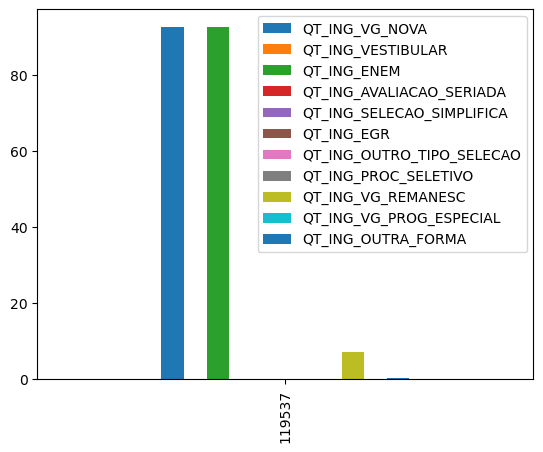

In [84]:
df_censo_2017_co_curso_97512_forma_ingresso.plot(kind='bar')

In [85]:
df_censo_2017_co_curso_97512_idade = df_censo_2017_co_curso_97512_col_int[['QT_ING_0_17', 'QT_ING_18_24', 'QT_ING_25_29', 'QT_ING_30_34', 'QT_ING_35_39', 'QT_ING_40_49', 'QT_ING_50_59', 'QT_ING_60_MAIS']]
df_censo_2017_co_curso_97512_idade

,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS
119537,0.329218,87.489712,8.312757,2.057613,0.740741,0.823045,0.246914,0.0


<AxesSubplot:>

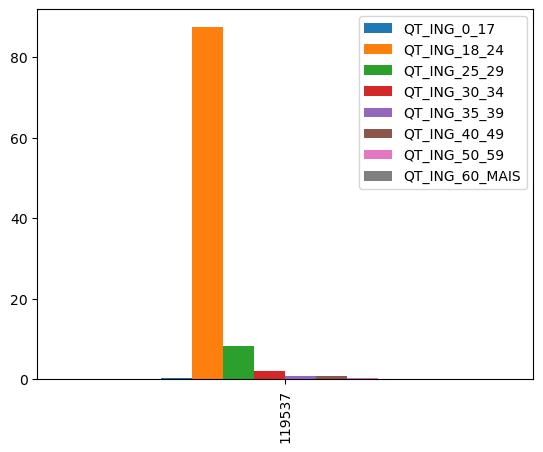

In [86]:
df_censo_2017_co_curso_97512_idade.plot(kind='bar')

In [87]:
df_censo_2017_co_curso_97512_raca = df_censo_2017_co_curso_97512_col_int[['QT_ING_BRANCA', 'QT_ING_PRETA', 'QT_ING_PARDA','QT_ING_AMARELA', 'QT_ING_INDIGENA', 'QT_ING_CORND']]
df_censo_2017_co_curso_97512_raca

,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND
119537,60.329218,5.925926,24.36214,4.691358,0.246914,4.444444


<AxesSubplot:>

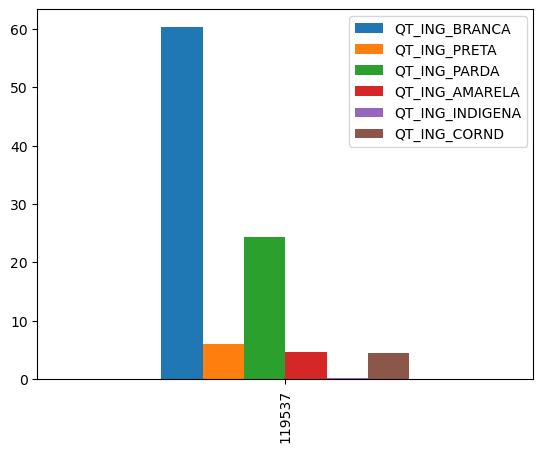

In [88]:
df_censo_2017_co_curso_97512_raca.plot(kind='bar')

In [89]:
df_censo_2017_co_curso_97512_nacionalidade = df_censo_2017_co_curso_97512_col_int[['QT_ING_NACBRAS', 'QT_ING_NACESTRANG']]
df_censo_2017_co_curso_97512_nacionalidade

,QT_ING_NACBRAS,QT_ING_NACESTRANG
119537,99.917695,0.082305


<AxesSubplot:>

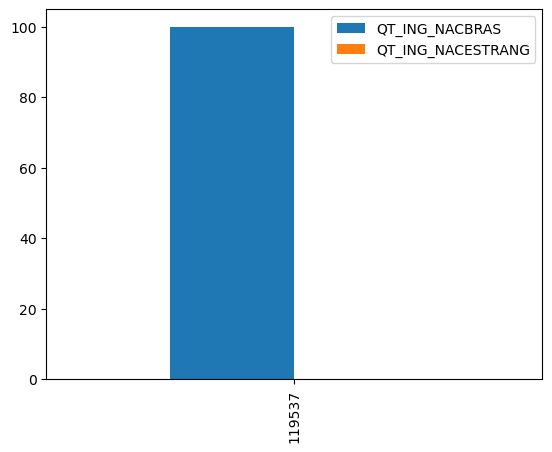

In [90]:
df_censo_2017_co_curso_97512_nacionalidade.plot(kind='bar')

In [91]:
df_censo_2017_co_curso_97512_deficiencia = df_censo_2017_co_curso_97512_col_int['QT_ING_DEFICIENTE']
df_censo_2017_co_curso_97512_deficiencia

119537    2.880658
Name: QT_ING_DEFICIENTE, dtype: float64

<AxesSubplot:>

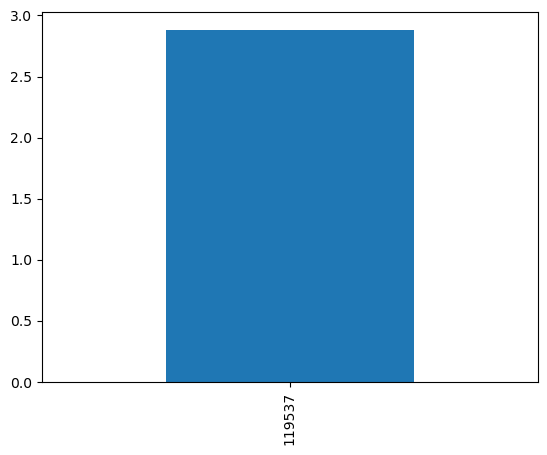

In [92]:
df_censo_2017_co_curso_97512_deficiencia.plot(kind='bar')

In [93]:
df_censo_2017_co_curso_97512_financiamento = df_censo_2017_co_curso_97512_col_int[['QT_ING_FINANC', 'QT_ING_FINANC_REEMB', 'QT_ING_FIES', 'QT_ING_RPFIES', 'QT_ING_FINANC_REEMB_OUTROS', 'QT_ING_FINANC_NREEMB', 'QT_ING_PROUNII', 'QT_ING_PROUNIP', 'QT_ING_NRPFIES', 'QT_ING_FINANC_NREEMB_OUTROS']]
df_censo_2017_co_curso_97512_financiamento

,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS
119537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

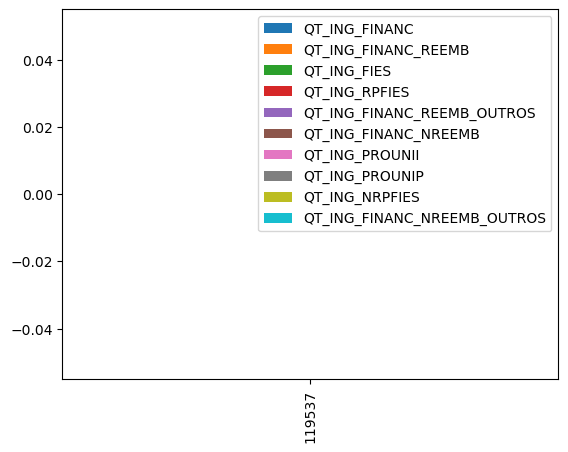

In [94]:
df_censo_2017_co_curso_97512_financiamento.plot(kind='bar')

In [95]:
df_censo_2017_co_curso_97512_reserva_vagas = df_censo_2017_co_curso_97512_col_int[['QT_ING_RESERVA_VAGA', 'QT_ING_RVREDEPUBLICA', 'QT_ING_RVETNICO', 'QT_ING_RVPDEF', 'QT_ING_RVSOCIAL_RF', 'QT_ING_RVOUTROS']]
df_censo_2017_co_curso_97512_reserva_vagas

,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS
119537,49.135802,46.502058,16.049383,2.633745,22.962963,0.0


<AxesSubplot:>

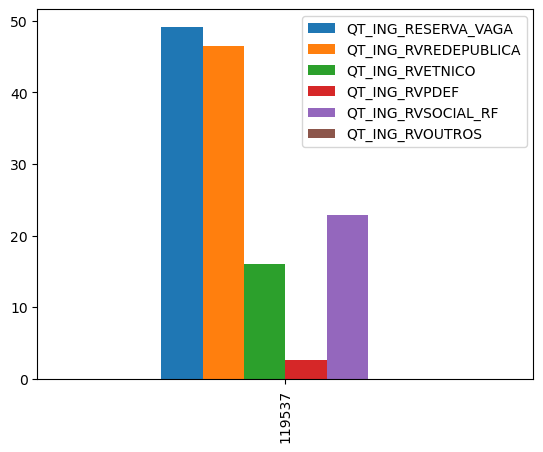

In [96]:
df_censo_2017_co_curso_97512_reserva_vagas.plot(kind='bar')

In [97]:
df_censo_2017_co_curso_97512_escola_pub_pri = df_censo_2017_co_curso_97512_col_int[['QT_ING_PROCESCPUBLICA', 'QT_ING_PROCESCPRIVADA', 'QT_ING_PROCNAOINFORMADA']]
df_censo_2017_co_curso_97512_escola_pub_pri

,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA
119537,54.567901,45.432099,0.0


<AxesSubplot:>

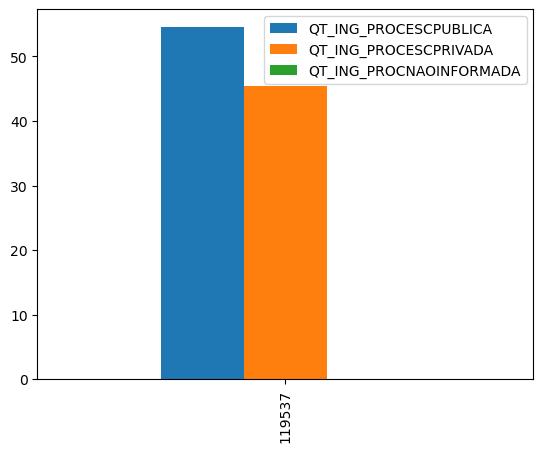

In [98]:
df_censo_2017_co_curso_97512_escola_pub_pri.plot(kind='bar')

In [99]:
df_censo_2017_co_curso_97512_apoio_social = df_censo_2017_co_curso_97512_col_int['QT_ING_APOIO_SOCIAL']
df_censo_2017_co_curso_97512_apoio_social

119537    9.62963
Name: QT_ING_APOIO_SOCIAL, dtype: float64

<AxesSubplot:>

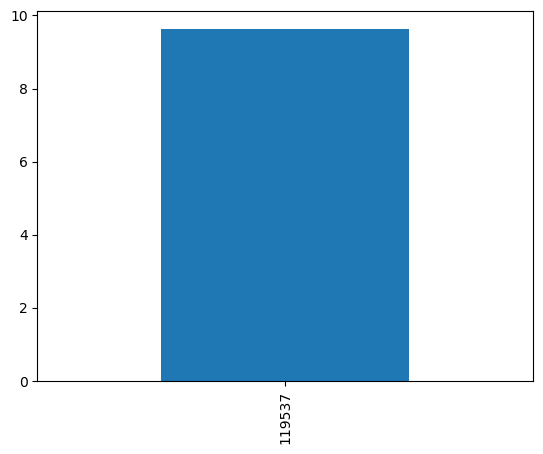

In [100]:
df_censo_2017_co_curso_97512_apoio_social.plot(kind='bar')

In [101]:
df_censo_2017_co_curso_97512_atividade_extra = df_censo_2017_co_curso_97512_col_int['QT_ING_ATIV_EXTRACURRICULAR']
df_censo_2017_co_curso_97512_atividade_extra

119537    8.148148
Name: QT_ING_ATIV_EXTRACURRICULAR, dtype: float64

<AxesSubplot:>

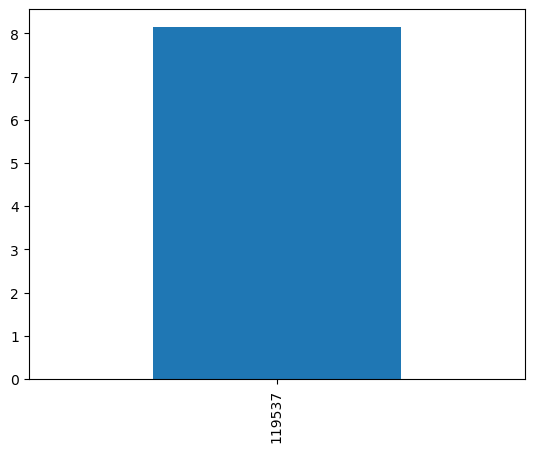

In [102]:
df_censo_2017_co_curso_97512_atividade_extra.plot(kind='bar')

# Vamos fazer o mesmo procedimento para mais um curso!
O curso agora será o curso PROCESSOS GERENCIAIS do IF cujo CO_CURSO é igual a 1214441

In [103]:
df_censo_2017

,CO_CURSO,NO_CURSO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,CO_CINE_ROTULO,NO_GRAU_ACADEMICO,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_DIMENSAO,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,CO_IES,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_ESPECIFICA,CO_CINE_AREA_DETALHADA,NO_CINE_AREA_DETALHADA,IN_GRATUITO,TP_NIVEL_ACADEMICO,QT_CURSO,QT_VG_TOTAL,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO,QT_VG_TOTAL_EAD,QT_VG_NOVA,QT_VG_PROC_SELETIVO,QT_VG_REMANESC,QT_VG_PROG_ESPECIAL,QT_INSCRITO_TOTAL,QT_INSCRITO_TOTAL_DIURNO,QT_INSCRITO_TOTAL_NOTURNO,QT_INSCRITO_TOTAL_EAD,QT_INSC_VG_NOVA,QT_INSC_PROC_SELETIVO,QT_INSC_VG_REMANESC,QT_INSC_VG_PROG_ESPECIAL,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_DIURNO,QT_MAT_NOTURNO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND,QT_CONC,QT_CONC_FEM,QT_CONC_MASC,QT_CONC_DIURNO,QT_CONC_NOTURNO,QT_CONC_0_17,QT_CONC_18_24,QT_CONC_25_29,QT_CONC_30_34,QT_CONC_35_39,QT_CONC_40_49,QT_CONC_50_59,QT_CONC_60_MAIS,QT_CONC_BRANCA,QT_CONC_PRETA,QT_CONC_PARDA,QT_CONC_AMARELA,QT_CONC_INDIGENA,QT_CONC_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_MAT_NACBRAS,QT_MAT_NACESTRANG,QT_CONC_NACBRAS,QT_CONC_NACESTRANG,QT_ALUNO_DEFICIENTE,QT_ING_DEFICIENTE,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_MAT_FINANC,QT_MAT_FINANC_REEMB,QT_MAT_FIES,QT_MAT_RPFIES,QT_MAT_FINANC_REEMB_OUTROS,QT_MAT_FINANC_NREEMB,QT_MAT_PROUNII,QT_MAT_PROUNIP,QT_MAT_NRPFIES,QT_MAT_FINANC_NREEMB_OUTROS,QT_CONC_FINANC,QT_CONC_FINANC_REEMB,QT_CONC_FIES,QT_CONC_RPFIES,QT_CONC_FINANC_REEMB_OUTROS,QT_CONC_FINANC_NREEMB,QT_CONC_PROUNII,QT_CONC_PROUNIP,QT_CONC_NRPFIES,QT_CONC_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_MAT_RESERVA_VAGA,QT_MAT_RVREDEPUBLICA,QT_MAT_RVETNICO,QT_MAT_RVPDEF,QT_MAT_RVSOCIAL_RF,QT_MAT_RVOUTROS,QT_CONC_RESERVA_VAGA,QT_CONC_RVREDEPUBLICA,QT_CONC_RVETNICO,QT_CONC_RVPDEF,QT_CONC_RVSOCIAL_RF,QT_CONC_RVOUTROS,QT_SIT_TRANCADA,QT_SIT_DESVINCULADO,QT_SIT_TRANSFERIDO,QT_SIT_FALECIDO,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA,QT_PARFOR,QT_ING_PARFOR,QT_MAT_PARFOR,QT_CONC_PARFOR,QT_APOIO_SOCIAL,QT_ING_APOIO_SOCIAL,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
113570,614,CIÊNCIA DA COMPUTAÇÃO,1,1,6,Bacharelado,2017,Sudeste,3,São Paulo,SP,35,São Carlos,3548906,0,1,1,1,1.0,7,6,Computação e Tecnologias da Informação e Comun...,61,Computação e Tecnologias da Informação e Comun...,614,Ciência da computação,1,1,1.0,71.0,71.0,0.0,0.0,62.0,0.0,9.0,0.0,934.0,934.0,0.0,0.0,925.0,0.0,9.0,0.0,66,20,46,66,0,60,2,58,0,0,0,0,0,6,0,0,1,62,3,0,0,0,0,0,12,2,3,4,2,43,298,46,252,298,0,1,241,48,6,2,0,0,0,149,14,35,17,2,81,36,0,36,36,0,0,20,14,1,1,0,0,0,29,3,3,1,0,0,65,1,294,4,34,2,2,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,25,0,0,22,44,0,1

In [104]:
df_censo_2017_co_curso_1214441 = df_censo_2017[df_censo_2017['CO_CURSO']==1214441]
df_censo_2017_co_curso_1214441

,CO_CURSO,NO_CURSO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,CO_CINE_ROTULO,NO_GRAU_ACADEMICO,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_DIMENSAO,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,CO_IES,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_ESPECIFICA,CO_CINE_AREA_DETALHADA,NO_CINE_AREA_DETALHADA,IN_GRATUITO,TP_NIVEL_ACADEMICO,QT_CURSO,QT_VG_TOTAL,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO,QT_VG_TOTAL_EAD,QT_VG_NOVA,QT_VG_PROC_SELETIVO,QT_VG_REMANESC,QT_VG_PROG_ESPECIAL,QT_INSCRITO_TOTAL,QT_INSCRITO_TOTAL_DIURNO,QT_INSCRITO_TOTAL_NOTURNO,QT_INSCRITO_TOTAL_EAD,QT_INSC_VG_NOVA,QT_INSC_PROC_SELETIVO,QT_INSC_VG_REMANESC,QT_INSC_VG_PROG_ESPECIAL,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_DIURNO,QT_MAT_NOTURNO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND,QT_CONC,QT_CONC_FEM,QT_CONC_MASC,QT_CONC_DIURNO,QT_CONC_NOTURNO,QT_CONC_0_17,QT_CONC_18_24,QT_CONC_25_29,QT_CONC_30_34,QT_CONC_35_39,QT_CONC_40_49,QT_CONC_50_59,QT_CONC_60_MAIS,QT_CONC_BRANCA,QT_CONC_PRETA,QT_CONC_PARDA,QT_CONC_AMARELA,QT_CONC_INDIGENA,QT_CONC_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_MAT_NACBRAS,QT_MAT_NACESTRANG,QT_CONC_NACBRAS,QT_CONC_NACESTRANG,QT_ALUNO_DEFICIENTE,QT_ING_DEFICIENTE,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_MAT_FINANC,QT_MAT_FINANC_REEMB,QT_MAT_FIES,QT_MAT_RPFIES,QT_MAT_FINANC_REEMB_OUTROS,QT_MAT_FINANC_NREEMB,QT_MAT_PROUNII,QT_MAT_PROUNIP,QT_MAT_NRPFIES,QT_MAT_FINANC_NREEMB_OUTROS,QT_CONC_FINANC,QT_CONC_FINANC_REEMB,QT_CONC_FIES,QT_CONC_RPFIES,QT_CONC_FINANC_REEMB_OUTROS,QT_CONC_FINANC_NREEMB,QT_CONC_PROUNII,QT_CONC_PROUNIP,QT_CONC_NRPFIES,QT_CONC_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_MAT_RESERVA_VAGA,QT_MAT_RVREDEPUBLICA,QT_MAT_RVETNICO,QT_MAT_RVPDEF,QT_MAT_RVSOCIAL_RF,QT_MAT_RVOUTROS,QT_CONC_RESERVA_VAGA,QT_CONC_RVREDEPUBLICA,QT_CONC_RVETNICO,QT_CONC_RVPDEF,QT_CONC_RVSOCIAL_RF,QT_CONC_RVOUTROS,QT_SIT_TRANCADA,QT_SIT_DESVINCULADO,QT_SIT_TRANSFERIDO,QT_SIT_FALECIDO,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA,QT_PARFOR,QT_ING_PARFOR,QT_MAT_PARFOR,QT_CONC_PARFOR,QT_APOIO_SOCIAL,QT_ING_APOIO_SOCIAL,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
130471,1214441,PROCESSOS GERENCIAIS,3,1,4,Tecnológico,2017,Sudeste,3,São Paulo,SP,35,São Carlos,3548906,0,1,4,1,1.0,1810,4,"Negócios, administração e direito",41,Negócios e administração,413,Gestão e administração,1,1,1.0,80.0,0.0,80.0,0.0,80.0,0.0,0.0,0.0,781.0,0.0,781.0,0.0,781.0,0.0,0.0,0.0,84,39,45,0,84,84,0,84,0,0,0,0,0,0,0,0,0,59,13,7,3,2,0,0,61,4,13,1,0,5,212,102,110,0,212,0,115,47,26,7,13,3,1,155,9,36,0,0,12,55,32,23,0,55,0,26,10,6,4,6,3,0,41,2,10,0,0,2,84,0,212,0,55,0,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,48,1,0,66,18,0,149,63,0,39,16,0,0,0,0,0,0,0,

In [105]:
df_fluxo_co_curso_1214441 = df_fluxo[df_fluxo['Código do Curso de Graduação'] == 1214441]
df_fluxo_co_curso_1214441

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Código da área do Curso segundo a classificação CINE BRASIL,Nome da área do Curso segundo a classificação CINE BRASIL,Código da Grande Área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA
105625,1810,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",1,4,1214441,PROCESSOS GERENCIAIS,3.0,35.0,3548906.0,3,1,0413G05,Gestão de negócios,4,"Negócios, administração e direito",2017,2017,4,2020,6,2022,84,75,0,9,0,89.285714,0.000000,10.714286,0.000000,10.714286
105626,1810,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",1,4,1214441,PROCESSOS GERENCIAIS,3.0,35.0,3548906.0,3,1,0413G05,Gestão de negócios,4,"Negócios, administração e direito",2017,2018,4,2020,6,2022,84,57,8,10,0,67.857143,9.523810,22.619048,9.523810,11.904762
105627,1810,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",1,4,1214441,PROCESSOS GERENCIAIS,3.0,35.0,3548906.0,3,1,0413G05,Gestão de negócios,4,"Negócios, administração e direito",2017,2019,4,2020,6,2022,84,27,23,7,0,32.142857,36.904762,30.952381,27.380952,8.333333
105628,1810,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",1,4,1214441,PROCESSOS GERENCIAIS,3.0,35.0,3548906.0,3,1,0413G05,Gestão de negócios,4,"Negócios, administração e direito",2017,2020,4,2020,6,2022,84,17,6,4,0,20.238095,44.047619,35.714286,7.142857,4.761905
105629,1810,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",1,4,1214441,PROCESSOS GERENCIAIS,3.0,35.0,3548906.0,3,1,0413G05,Gestão de negócios,4,"Negócios, administração e direito",2017,2021,4,2020,6,2022,84,11,6,0,0,13.095238,51.190476,35.714286,7.142857,0.000000


In [106]:
df_fluxo_co_curso_1214441[['Ano de Ingresso', 'Ano de Referência', 'Taxa de Permanência - TAP', 'Taxa de Conclusão Acumulada - TCA', 'Taxa de Desistência Acumulada - TDA', 'Taxa de Desistência Anual - TADA']]

,Ano de Ingresso,Ano de Referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Desistência Anual - TADA
105625,2017,2017,89.285714,0.000000,10.714286,10.714286
105626,2017,2018,67.857143,9.523810,22.619048,11.904762
105627,2017,2019,32.142857,36.904762,30.952381,8.333333
105628,2017,2020,20.238095,44.047619,35.714286,4.761905
105629,2017,2021,13.095238,51.190476,35.714286,0.000000


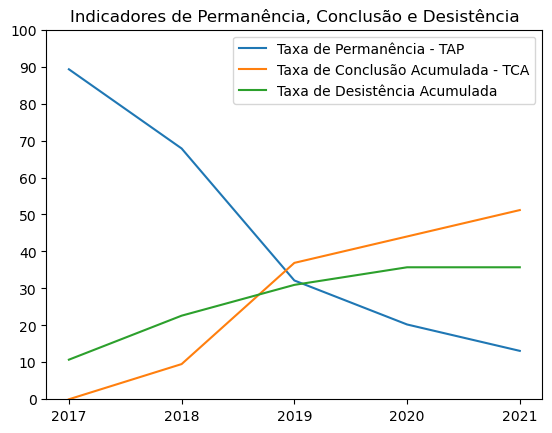

In [107]:
#Gráfico de indicadores
df_fluxo_co_curso_1214441_ind = df_fluxo_co_curso_1214441.reset_index()
df_fluxo_co_curso_1214441_ind = df_fluxo_co_curso_1214441_ind[['Ano de Referência','Taxa de Permanência - TAP', 'Taxa de Conclusão Acumulada - TCA', 'Taxa de Desistência Acumulada - TDA']]
plt.plot(df_fluxo_co_curso_1214441_ind['Ano de Referência'], df_fluxo_co_curso_1214441_ind['Taxa de Permanência - TAP'], label='Taxa de Permanência - TAP')
plt.plot(df_fluxo_co_curso_1214441_ind['Ano de Referência'], df_fluxo_co_curso_1214441_ind['Taxa de Conclusão Acumulada - TCA'], label='Taxa de Conclusão Acumulada - TCA')
plt.plot(df_fluxo_co_curso_1214441_ind['Ano de Referência'], df_fluxo_co_curso_1214441_ind['Taxa de Desistência Acumulada - TDA'], label='Taxa de Desistência Acumulada')
plt.xticks(df_fluxo_co_curso_1214441_ind['Ano de Referência'])
plt.yticks(range(0, 101, 10))
plt.ylim(0, 100)
plt.title(f'Indicadores de Permanência, Conclusão e Desistência')
plt.legend()
plt.show()

        Ano de Referência  Taxa de Desistência Anual - TADA
105625               2017                         10.714286
105626               2018                         11.904762
105627               2019                          8.333333
105628               2020                          4.761905
105629               2021                          0.000000


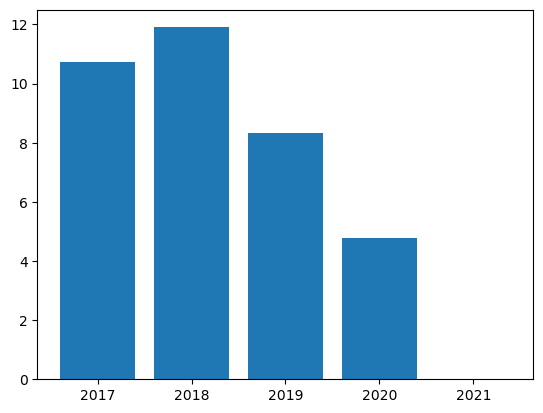

In [108]:
df_fluxo_co_curso_1214441_desistencia_anual = df_fluxo_co_curso_1214441[['Ano de Referência','Taxa de Desistência Anual - TADA']]
print(df_fluxo_co_curso_1214441_desistencia_anual)
plt.bar(x=df_fluxo_co_curso_1214441_desistencia_anual['Ano de Referência'], height=df_fluxo_co_curso_1214441_desistencia_anual['Taxa de Desistência Anual - TADA'])
plt.show()

In [109]:
df_censo_2017_co_curso_1214441

,CO_CURSO,NO_CURSO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,CO_CINE_ROTULO,NO_GRAU_ACADEMICO,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_DIMENSAO,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,CO_IES,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_ESPECIFICA,CO_CINE_AREA_DETALHADA,NO_CINE_AREA_DETALHADA,IN_GRATUITO,TP_NIVEL_ACADEMICO,QT_CURSO,QT_VG_TOTAL,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO,QT_VG_TOTAL_EAD,QT_VG_NOVA,QT_VG_PROC_SELETIVO,QT_VG_REMANESC,QT_VG_PROG_ESPECIAL,QT_INSCRITO_TOTAL,QT_INSCRITO_TOTAL_DIURNO,QT_INSCRITO_TOTAL_NOTURNO,QT_INSCRITO_TOTAL_EAD,QT_INSC_VG_NOVA,QT_INSC_PROC_SELETIVO,QT_INSC_VG_REMANESC,QT_INSC_VG_PROG_ESPECIAL,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_DIURNO,QT_MAT_NOTURNO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND,QT_CONC,QT_CONC_FEM,QT_CONC_MASC,QT_CONC_DIURNO,QT_CONC_NOTURNO,QT_CONC_0_17,QT_CONC_18_24,QT_CONC_25_29,QT_CONC_30_34,QT_CONC_35_39,QT_CONC_40_49,QT_CONC_50_59,QT_CONC_60_MAIS,QT_CONC_BRANCA,QT_CONC_PRETA,QT_CONC_PARDA,QT_CONC_AMARELA,QT_CONC_INDIGENA,QT_CONC_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_MAT_NACBRAS,QT_MAT_NACESTRANG,QT_CONC_NACBRAS,QT_CONC_NACESTRANG,QT_ALUNO_DEFICIENTE,QT_ING_DEFICIENTE,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_MAT_FINANC,QT_MAT_FINANC_REEMB,QT_MAT_FIES,QT_MAT_RPFIES,QT_MAT_FINANC_REEMB_OUTROS,QT_MAT_FINANC_NREEMB,QT_MAT_PROUNII,QT_MAT_PROUNIP,QT_MAT_NRPFIES,QT_MAT_FINANC_NREEMB_OUTROS,QT_CONC_FINANC,QT_CONC_FINANC_REEMB,QT_CONC_FIES,QT_CONC_RPFIES,QT_CONC_FINANC_REEMB_OUTROS,QT_CONC_FINANC_NREEMB,QT_CONC_PROUNII,QT_CONC_PROUNIP,QT_CONC_NRPFIES,QT_CONC_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_MAT_RESERVA_VAGA,QT_MAT_RVREDEPUBLICA,QT_MAT_RVETNICO,QT_MAT_RVPDEF,QT_MAT_RVSOCIAL_RF,QT_MAT_RVOUTROS,QT_CONC_RESERVA_VAGA,QT_CONC_RVREDEPUBLICA,QT_CONC_RVETNICO,QT_CONC_RVPDEF,QT_CONC_RVSOCIAL_RF,QT_CONC_RVOUTROS,QT_SIT_TRANCADA,QT_SIT_DESVINCULADO,QT_SIT_TRANSFERIDO,QT_SIT_FALECIDO,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA,QT_PARFOR,QT_ING_PARFOR,QT_MAT_PARFOR,QT_CONC_PARFOR,QT_APOIO_SOCIAL,QT_ING_APOIO_SOCIAL,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
130471,1214441,PROCESSOS GERENCIAIS,3,1,4,Tecnológico,2017,Sudeste,3,São Paulo,SP,35,São Carlos,3548906,0,1,4,1,1.0,1810,4,"Negócios, administração e direito",41,Negócios e administração,413,Gestão e administração,1,1,1.0,80.0,0.0,80.0,0.0,80.0,0.0,0.0,0.0,781.0,0.0,781.0,0.0,781.0,0.0,0.0,0.0,84,39,45,0,84,84,0,84,0,0,0,0,0,0,0,0,0,59,13,7,3,2,0,0,61,4,13,1,0,5,212,102,110,0,212,0,115,47,26,7,13,3,1,155,9,36,0,0,12,55,32,23,0,55,0,26,10,6,4,6,3,0,41,2,10,0,0,2,84,0,212,0,55,0,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,48,1,0,66,18,0,149,63,0,39,16,0,0,0,0,0,0,0,

In [110]:
df_censo_2017_co_curso_1214441_col_int = df_censo_2017_co_curso_1214441[["CO_CURSO","QT_ING","QT_ING_FEM","QT_ING_MASC","QT_ING_DIURNO","QT_ING_NOTURNO","QT_ING_VG_NOVA","QT_ING_VESTIBULAR","QT_ING_ENEM","QT_ING_AVALIACAO_SERIADA","QT_ING_SELECAO_SIMPLIFICA","QT_ING_EGR","QT_ING_OUTRO_TIPO_SELECAO","QT_ING_PROC_SELETIVO","QT_ING_VG_REMANESC","QT_ING_VG_PROG_ESPECIAL","QT_ING_OUTRA_FORMA","QT_ING_0_17","QT_ING_18_24","QT_ING_25_29","QT_ING_30_34","QT_ING_35_39","QT_ING_40_49","QT_ING_50_59","QT_ING_60_MAIS","QT_ING_BRANCA","QT_ING_PRETA","QT_ING_PARDA","QT_ING_AMARELA","QT_ING_INDIGENA","QT_ING_CORND","QT_ING_NACBRAS","QT_ING_NACESTRANG","QT_ING_DEFICIENTE","QT_ING_FINANC","QT_ING_FINANC_REEMB","QT_ING_FIES","QT_ING_RPFIES","QT_ING_FINANC_REEMB_OUTROS","QT_ING_FINANC_NREEMB","QT_ING_PROUNII","QT_ING_PROUNIP","QT_ING_NRPFIES","QT_ING_FINANC_NREEMB_OUTROS","QT_ING_RESERVA_VAGA","QT_ING_RVREDEPUBLICA","QT_ING_RVETNICO","QT_ING_RVPDEF","QT_ING_RVSOCIAL_RF","QT_ING_RVOUTROS","QT_ING_PROCESCPUBLICA","QT_ING_PROCESCPRIVADA","QT_ING_PROCNAOINFORMADA","QT_ING_PARFOR","QT_ING_APOIO_SOCIAL","QT_ING_ATIV_EXTRACURRICULAR","QT_ING_MOB_ACADEMICA"]]
df_censo_2017_co_curso_1214441_col_int

,CO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_ING_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_ING_PARFOR,QT_ING_APOIO_SOCIAL,QT_ING_ATIV_EXTRACURRICULAR,QT_ING_MOB_ACADEMICA
130471,1214441,84,39,45,0,84,84,0,84,0,0,0,0,0,0,0,0,0,59,13,7,3,2,0,0,61,4,13,1,0,5,84,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,18,0,0,0,18,0


In [111]:
colunas_para_dividir = ["QT_ING_FEM","QT_ING_MASC","QT_ING_DIURNO","QT_ING_NOTURNO","QT_ING_VG_NOVA","QT_ING_VESTIBULAR","QT_ING_ENEM","QT_ING_AVALIACAO_SERIADA","QT_ING_SELECAO_SIMPLIFICA","QT_ING_EGR","QT_ING_OUTRO_TIPO_SELECAO","QT_ING_PROC_SELETIVO","QT_ING_VG_REMANESC","QT_ING_VG_PROG_ESPECIAL","QT_ING_OUTRA_FORMA","QT_ING_0_17","QT_ING_18_24","QT_ING_25_29","QT_ING_30_34","QT_ING_35_39","QT_ING_40_49","QT_ING_50_59","QT_ING_60_MAIS","QT_ING_BRANCA","QT_ING_PRETA","QT_ING_PARDA","QT_ING_AMARELA","QT_ING_INDIGENA","QT_ING_CORND","QT_ING_NACBRAS","QT_ING_NACESTRANG","QT_ING_DEFICIENTE","QT_ING_FINANC","QT_ING_FINANC_REEMB","QT_ING_FIES","QT_ING_RPFIES","QT_ING_FINANC_REEMB_OUTROS","QT_ING_FINANC_NREEMB","QT_ING_PROUNII","QT_ING_PROUNIP","QT_ING_NRPFIES","QT_ING_FINANC_NREEMB_OUTROS","QT_ING_RESERVA_VAGA","QT_ING_RVREDEPUBLICA","QT_ING_RVETNICO","QT_ING_RVPDEF","QT_ING_RVSOCIAL_RF","QT_ING_RVOUTROS","QT_ING_PROCESCPUBLICA","QT_ING_PROCESCPRIVADA","QT_ING_PROCNAOINFORMADA","QT_ING_PARFOR","QT_ING_APOIO_SOCIAL","QT_ING_ATIV_EXTRACURRICULAR","QT_ING_MOB_ACADEMICA"]

df_censo_2017_co_curso_1214441_col_int.loc[:, colunas_para_dividir] = df_censo_2017_co_curso_1214441_col_int.loc[:, colunas_para_dividir].div(df_censo_2017_co_curso_1214441_col_int["QT_ING"], axis=0)*100
df_censo_2017_co_curso_1214441_col_int

C:\Users\Marcos\AppData\Local\Temp\ipykernel_2072\2797651469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_censo_2017_co_curso_1214441_col_int.loc[:, colunas_para_dividir] = df_censo_2017_co_curso_1214441_col_int.loc[:, colunas_para_dividir].div(df_censo_2017_co_curso_1214441_col_int["QT_ING"], axis=0)*100


,CO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_ING_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_ING_PARFOR,QT_ING_APOIO_SOCIAL,QT_ING_ATIV_EXTRACURRICULAR,QT_ING_MOB_ACADEMICA
130471,1214441,84,46.428571,53.571429,0.0,100.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.238095,15.47619,8.333333,3.571429,2.380952,0.0,0.0,72.619048,4.761905,15.47619,1.190476,0.0,5.952381,100.0,0.0,3.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.571429,21.428571,0.0,0.0,0.0,21.428571,0.0


In [112]:
df_censo_2017_co_curso_1214441_sexo = df_censo_2017_co_curso_1214441_col_int[['QT_ING_FEM','QT_ING_MASC']]
df_censo_2017_co_curso_1214441_sexo

,QT_ING_FEM,QT_ING_MASC
130471,46.428571,53.571429


<AxesSubplot:>

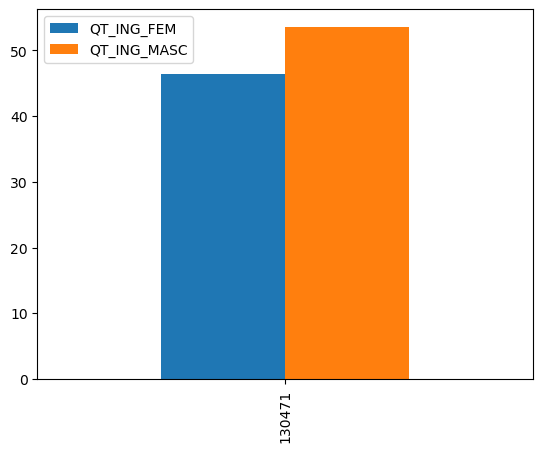

In [113]:
df_censo_2017_co_curso_1214441_sexo.plot(kind='bar')

In [114]:
df_censo_2017_co_curso_1214441_horario = df_censo_2017_co_curso_1214441_col_int[['QT_ING_DIURNO','QT_ING_NOTURNO']]
df_censo_2017_co_curso_1214441_horario

,QT_ING_DIURNO,QT_ING_NOTURNO
130471,0.0,100.0


<AxesSubplot:>

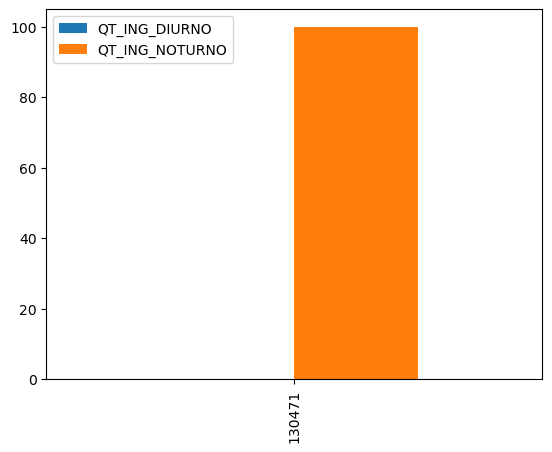

In [115]:
df_censo_2017_co_curso_1214441_horario.plot(kind='bar')

In [116]:
df_censo_2017_co_curso_1214441_forma_ingresso = df_censo_2017_co_curso_1214441_col_int[['QT_ING_VG_NOVA', 'QT_ING_VESTIBULAR', 'QT_ING_ENEM', 'QT_ING_AVALIACAO_SERIADA', 'QT_ING_SELECAO_SIMPLIFICA', 'QT_ING_EGR', 'QT_ING_OUTRO_TIPO_SELECAO', 'QT_ING_PROC_SELETIVO', 'QT_ING_VG_REMANESC','QT_ING_VG_PROG_ESPECIAL', 'QT_ING_OUTRA_FORMA']]
df_censo_2017_co_curso_1214441_forma_ingresso

,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA
130471,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

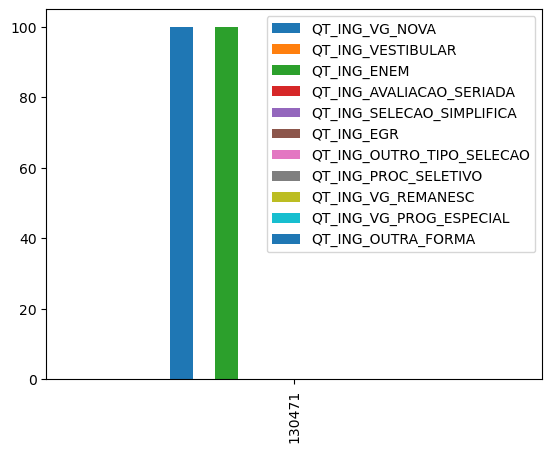

In [117]:
df_censo_2017_co_curso_1214441_forma_ingresso.plot(kind='bar')

In [118]:
df_censo_2017_co_curso_1214441_idade = df_censo_2017_co_curso_1214441_col_int[['QT_ING_0_17', 'QT_ING_18_24', 'QT_ING_25_29', 'QT_ING_30_34', 'QT_ING_35_39', 'QT_ING_40_49', 'QT_ING_50_59', 'QT_ING_60_MAIS']]
df_censo_2017_co_curso_1214441_idade

,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS
130471,0.0,70.238095,15.47619,8.333333,3.571429,2.380952,0.0,0.0


<AxesSubplot:>

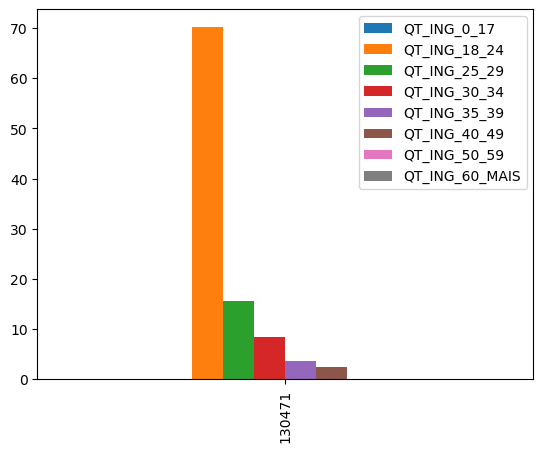

In [119]:
df_censo_2017_co_curso_1214441_idade.plot(kind='bar')

In [120]:
df_censo_2017_co_curso_1214441_raca = df_censo_2017_co_curso_1214441_col_int[['QT_ING_BRANCA', 'QT_ING_PRETA', 'QT_ING_PARDA','QT_ING_AMARELA', 'QT_ING_INDIGENA', 'QT_ING_CORND']]
df_censo_2017_co_curso_1214441_raca

,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND
130471,72.619048,4.761905,15.47619,1.190476,0.0,5.952381


<AxesSubplot:>

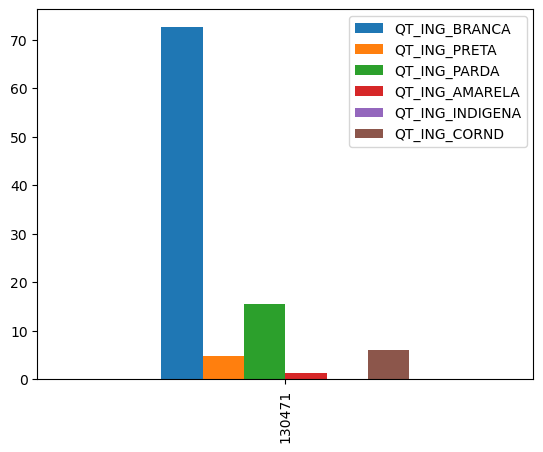

In [121]:
df_censo_2017_co_curso_1214441_raca.plot(kind='bar')

In [122]:
df_censo_2017_co_curso_1214441_nacionalidade = df_censo_2017_co_curso_1214441_col_int[['QT_ING_NACBRAS', 'QT_ING_NACESTRANG']]
df_censo_2017_co_curso_1214441_nacionalidade

,QT_ING_NACBRAS,QT_ING_NACESTRANG
130471,100.0,0.0


<AxesSubplot:>

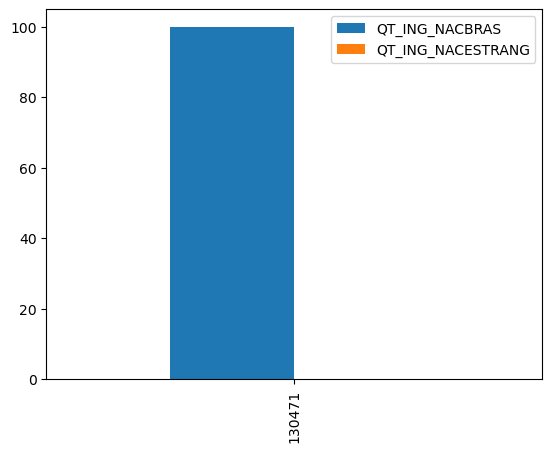

In [123]:
df_censo_2017_co_curso_1214441_nacionalidade.plot(kind='bar')

In [124]:
df_censo_2017_co_curso_1214441_deficiencia = df_censo_2017_co_curso_1214441_col_int['QT_ING_DEFICIENTE']
df_censo_2017_co_curso_1214441_deficiencia

130471    3.571429
Name: QT_ING_DEFICIENTE, dtype: float64

<AxesSubplot:>

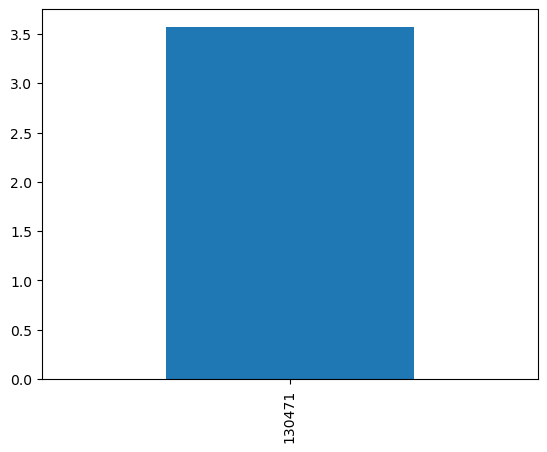

In [125]:
df_censo_2017_co_curso_1214441_deficiencia.plot(kind='bar')

In [126]:
df_censo_2017_co_curso_1214441_financiamento = df_censo_2017_co_curso_1214441_col_int[['QT_ING_FINANC', 'QT_ING_FINANC_REEMB', 'QT_ING_FIES', 'QT_ING_RPFIES', 'QT_ING_FINANC_REEMB_OUTROS', 'QT_ING_FINANC_NREEMB', 'QT_ING_PROUNII', 'QT_ING_PROUNIP', 'QT_ING_NRPFIES', 'QT_ING_FINANC_NREEMB_OUTROS']]
df_censo_2017_co_curso_1214441_financiamento

,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS
130471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

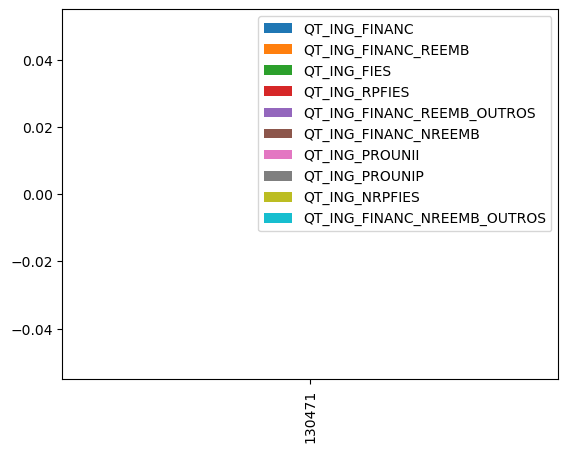

In [127]:
df_censo_2017_co_curso_1214441_financiamento.plot(kind='bar')

In [128]:
df_censo_2017_co_curso_1214441_reserva_vagas = df_censo_2017_co_curso_1214441_col_int[['QT_ING_RESERVA_VAGA', 'QT_ING_RVREDEPUBLICA', 'QT_ING_RVETNICO', 'QT_ING_RVPDEF', 'QT_ING_RVSOCIAL_RF', 'QT_ING_RVOUTROS']]
df_censo_2017_co_curso_1214441_reserva_vagas

,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS
130471,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

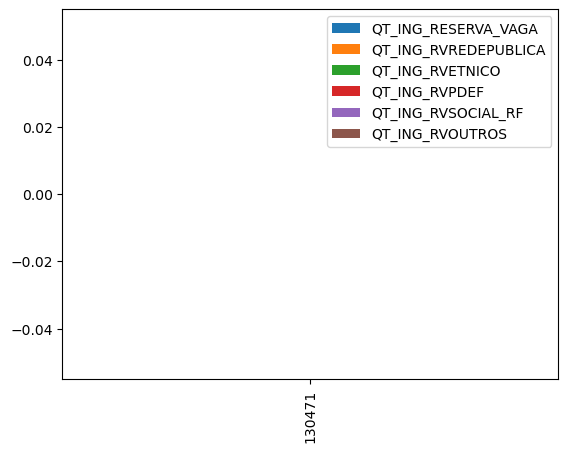

In [129]:
df_censo_2017_co_curso_1214441_reserva_vagas.plot(kind='bar')

In [130]:
df_censo_2017_co_curso_1214441_escola_pub_pri = df_censo_2017_co_curso_1214441_col_int[['QT_ING_PROCESCPUBLICA', 'QT_ING_PROCESCPRIVADA', 'QT_ING_PROCNAOINFORMADA']]
df_censo_2017_co_curso_1214441_escola_pub_pri

,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA
130471,78.571429,21.428571,0.0


<AxesSubplot:>

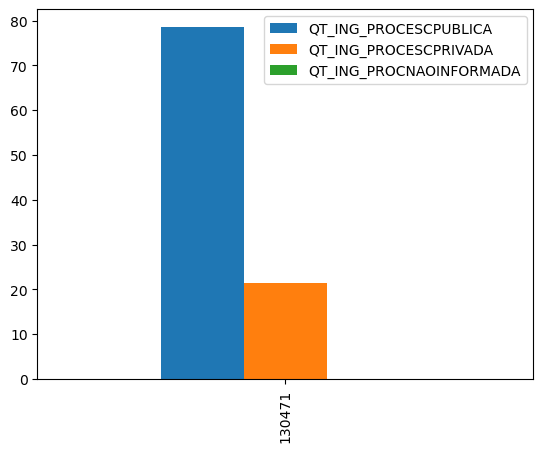

In [131]:
df_censo_2017_co_curso_1214441_escola_pub_pri.plot(kind='bar')

In [132]:
df_censo_2017_co_curso_1214441_apoio_social = df_censo_2017_co_curso_1214441_col_int['QT_ING_APOIO_SOCIAL']
df_censo_2017_co_curso_1214441_apoio_social

130471    0.0
Name: QT_ING_APOIO_SOCIAL, dtype: float64

<AxesSubplot:>

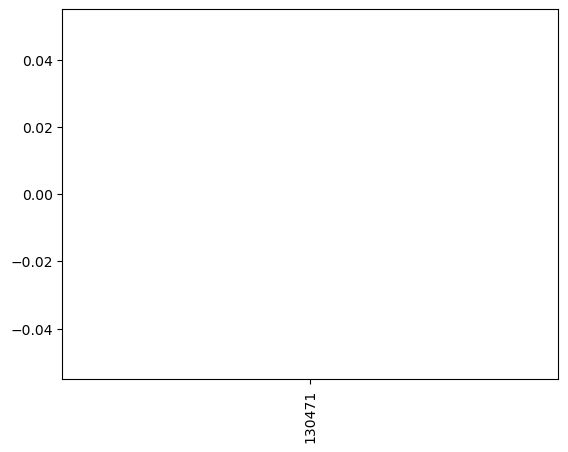

In [133]:
df_censo_2017_co_curso_1214441_apoio_social.plot(kind='bar')

In [134]:
df_censo_2017_co_curso_1214441_atividade_extra = df_censo_2017_co_curso_1214441_col_int['QT_ING_ATIV_EXTRACURRICULAR']
df_censo_2017_co_curso_1214441_atividade_extra

130471    21.428571
Name: QT_ING_ATIV_EXTRACURRICULAR, dtype: float64

<AxesSubplot:>

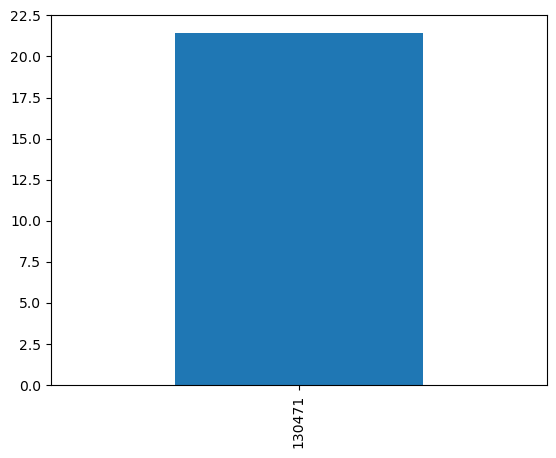

In [135]:
df_censo_2017_co_curso_1214441_atividade_extra.plot(kind='bar')

# Agora que já temos dados de 4 cursos, vamos agrupar tirando a média e exibir os gráficos novamente

In [136]:
df_fluxo_co_curso_614_ind

,Ano de Referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA
0,2017,90.909091,0.000000,9.090909
1,2018,84.848485,0.000000,15.151515
2,2019,73.846154,0.000000,26.153846
3,2020,56.923077,15.384615,27.692308
4,2021,27.692308,41.538462,30.769231


In [137]:
df_fluxo_co_curso_7940_ind

,Ano de Referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA
0,2017,84.012962,0.000000,15.987038
1,2018,62.695840,1.458671,35.845489
2,2019,46.083198,2.215019,51.701783
3,2020,30.659103,4.781199,64.559697
4,2021,11.237169,21.745003,67.017828


In [138]:
df_fluxo_co_curso_97512_ind

,Ano de Referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA
0,2017,98.043818,0.156495,1.799687
1,2018,88.097103,0.313234,11.589663
2,2019,77.447142,0.626468,21.926390
3,2020,70.611285,2.272727,27.115987
4,2021,59.482759,11.755486,28.761755


In [139]:
df_fluxo_co_curso_1214441_ind

,Ano de Referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA
0,2017,89.285714,0.000000,10.714286
1,2018,67.857143,9.523810,22.619048
2,2019,32.142857,36.904762,30.952381
3,2020,20.238095,44.047619,35.714286
4,2021,13.095238,51.190476,35.714286


In [140]:
df_fluxo_agrupado = (df_fluxo_co_curso_614_ind + df_fluxo_co_curso_7940_ind + df_fluxo_co_curso_97512_ind + df_fluxo_co_curso_1214441_ind)/4
df_fluxo_agrupado

,Ano de Referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA
0,2017.0,90.562897,0.039124,9.397980
1,2018.0,75.874643,2.823929,21.301429
2,2019.0,57.379838,9.936562,32.683600
3,2020.0,44.607890,16.621540,38.770570
4,2021.0,27.876868,31.557357,40.565775


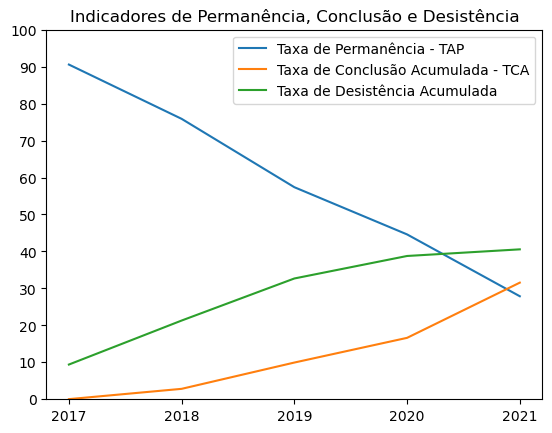

In [141]:
#Gráfico de indicadores
df_fluxo_agrupado = df_fluxo_agrupado[['Ano de Referência','Taxa de Permanência - TAP', 'Taxa de Conclusão Acumulada - TCA', 'Taxa de Desistência Acumulada - TDA']]
plt.plot(df_fluxo_agrupado['Ano de Referência'], df_fluxo_agrupado['Taxa de Permanência - TAP'], label='Taxa de Permanência - TAP')
plt.plot(df_fluxo_agrupado['Ano de Referência'], df_fluxo_agrupado['Taxa de Conclusão Acumulada - TCA'], label='Taxa de Conclusão Acumulada - TCA')
plt.plot(df_fluxo_agrupado['Ano de Referência'], df_fluxo_agrupado['Taxa de Desistência Acumulada - TDA'], label='Taxa de Desistência Acumulada')
plt.xticks(df_fluxo_agrupado['Ano de Referência'])
plt.yticks(range(0, 101, 10))
plt.ylim(0, 100)
plt.title(f'Indicadores de Permanência, Conclusão e Desistência')
plt.legend()
plt.show()

In [151]:
df_fluxo_co_curso_614_desistencia_anual = df_fluxo_co_curso_614_desistencia_anual.reset_index()
df_fluxo_co_curso_614_desistencia_anual

,index,Ano de Referência,Taxa de Desistência Anual - TADA
0,2745,2017,9.090909
1,2746,2018,6.060606
2,2747,2019,10.769231
3,2748,2020,1.538462
4,2749,2021,3.076923


In [152]:
df_fluxo_co_curso_7940_desistencia_anual = df_fluxo_co_curso_7940_desistencia_anual.reset_index()
df_fluxo_co_curso_7940_desistencia_anual

,index,Ano de Referência,Taxa de Desistência Anual - TADA
0,34990,2017,15.987038
1,34991,2018,19.854133
2,34992,2019,15.856294
3,34993,2020,12.857915
4,34994,2021,2.458131


In [153]:
df_fluxo_co_curso_97512_desistencia_anual = df_fluxo_co_curso_97512_desistencia_anual.reset_index()
df_fluxo_co_curso_97512_desistencia_anual

,index,Ano de Referência,Taxa de Desistência Anual - TADA
0,139915,2017,1.799687
1,139916,2018,9.788567
2,139917,2019,10.336727
3,139918,2020,5.172414
4,139919,2021,1.645768


In [154]:
df_fluxo_co_curso_1214441_desistencia_anual = df_fluxo_co_curso_1214441_desistencia_anual.reset_index()
df_fluxo_co_curso_1214441_desistencia_anual

,index,Ano de Referência,Taxa de Desistência Anual - TADA
0,105625,2017,10.714286
1,105626,2018,11.904762
2,105627,2019,8.333333
3,105628,2020,4.761905
4,105629,2021,0.000000


In [155]:
df_fluxo_agrupado_anual = (df_fluxo_co_curso_614_desistencia_anual + df_fluxo_co_curso_7940_desistencia_anual + df_fluxo_co_curso_97512_desistencia_anual + df_fluxo_co_curso_1214441_desistencia_anual)/4
df_fluxo_agrupado_anual

,index,Ano de Referência,Taxa de Desistência Anual - TADA
0,70818.75,2017.0,9.397980
1,70819.75,2018.0,11.902017
2,70820.75,2019.0,11.323896
3,70821.75,2020.0,6.082674
4,70822.75,2021.0,1.795205


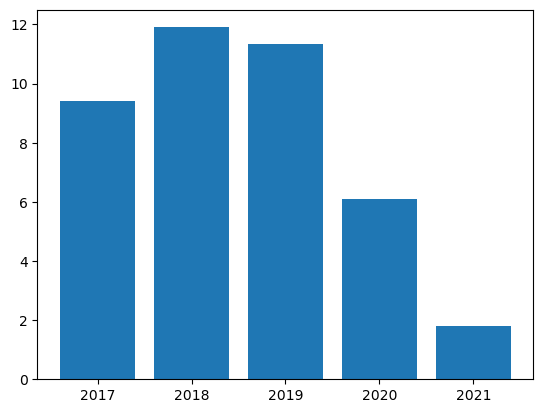

In [156]:
plt.bar(x=df_fluxo_agrupado_anual['Ano de Referência'], height=df_fluxo_agrupado_anual['Taxa de Desistência Anual - TADA'])
plt.show()

In [161]:
df_censo_2017_co_curso_614_col_int = df_censo_2017_co_curso_614_col_int.reset_index()
df_censo_2017_co_curso_614_col_int

,index,CO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_ING_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_ING_PARFOR,QT_ING_APOIO_SOCIAL,QT_ING_ATIV_EXTRACURRICULAR,QT_ING_MOB_ACADEMICA
0,113570,614,66,30.30303,69.69697,100.0,0.0,90.909091,3.030303,87.878788,0.0,0.0,0.0,0.0,0.0,9.090909,0.0,0.0,1.515152,93.939394,4.545455,0.0,0.0,0.0,0.0,0.0,18.181818,3.030303,4.545455,6.060606,3.030303,65.151515,98.484848,1.515152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.333333,66.666667,0.0,0.0,0.0,0.0,0.0


In [162]:
df_censo_2017_co_curso_7940_col_int = df_censo_2017_co_curso_7940_col_int.reset_index()
df_censo_2017_co_curso_7940_col_int

,index,CO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_ING_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_ING_PARFOR,QT_ING_APOIO_SOCIAL,QT_ING_ATIV_EXTRACURRICULAR,QT_ING_MOB_ACADEMICA
0,114117,7940,3680,58.451087,41.548913,42.282609,57.717391,73.940217,73.940217,0.0,0.0,0.0,0.0,0.0,0.0,26.059783,0.0,0.0,0.407609,64.809783,13.940217,7.798913,5.434783,5.271739,1.875,0.461957,61.168478,8.288043,23.451087,1.875,0.380435,4.836957,99.728261,0.271739,1.603261,14.972826,14.972826,14.972826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.26087,41.73913,0.0,0.0,0.0,0.108696,0.0


In [163]:
df_censo_2017_co_curso_97512_col_int = df_censo_2017_co_curso_97512_col_int.reset_index()
df_censo_2017_co_curso_97512_col_int

,index,CO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_ING_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_ING_PARFOR,QT_ING_APOIO_SOCIAL,QT_ING_ATIV_EXTRACURRICULAR,QT_ING_MOB_ACADEMICA
0,119537,97512,1215,28.395062,71.604938,50.123457,49.876543,92.592593,0.0,92.592593,0.0,0.0,0.0,0.0,0.0,7.160494,0.0,0.246914,0.329218,87.489712,8.312757,2.057613,0.740741,0.823045,0.246914,0.0,60.329218,5.925926,24.36214,4.691358,0.246914,4.444444,99.917695,0.082305,2.880658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.135802,46.502058,16.049383,2.633745,22.962963,0.0,54.567901,45.432099,0.0,0.0,9.62963,8.148148,0.082305


In [164]:
df_censo_2017_co_curso_1214441_col_int = df_censo_2017_co_curso_1214441_col_int.reset_index()
df_censo_2017_co_curso_1214441_col_int

,index,CO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_ING_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_ING_PARFOR,QT_ING_APOIO_SOCIAL,QT_ING_ATIV_EXTRACURRICULAR,QT_ING_MOB_ACADEMICA
0,130471,1214441,84,46.428571,53.571429,0.0,100.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.238095,15.47619,8.333333,3.571429,2.380952,0.0,0.0,72.619048,4.761905,15.47619,1.190476,0.0,5.952381,100.0,0.0,3.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.571429,21.428571,0.0,0.0,0.0,21.428571,0.0


In [165]:
df_agrupado_col_int = (df_censo_2017_co_curso_614_col_int + df_censo_2017_co_curso_7940_col_int + df_censo_2017_co_curso_97512_col_int + df_censo_2017_co_curso_1214441_col_int)/4
df_agrupado_col_int

,index,CO_CURSO,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_ING_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_ING_PARFOR,QT_ING_APOIO_SOCIAL,QT_ING_ATIV_EXTRACURRICULAR,QT_ING_MOB_ACADEMICA
0,119423.75,330126.75,1261.25,40.894438,59.105562,48.101516,51.898484,89.360475,19.24263,70.117845,0.0,0.0,0.0,0.0,0.0,10.577796,0.0,0.061728,0.562995,79.119246,10.568655,4.547465,2.436738,2.118934,0.530478,0.115489,53.074641,5.501544,16.958718,3.45436,0.914413,20.096324,99.532701,0.467299,2.013837,3.743207,3.743207,3.743207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.283951,11.625514,4.012346,0.658436,5.740741,0.0,56.183383,43.816617,0.0,0.0,2.407407,7.421354,0.020576


In [166]:
df_agrupado_col_int_sexo = df_agrupado_col_int[['QT_ING_FEM','QT_ING_MASC']]
df_agrupado_col_int_sexo

,QT_ING_FEM,QT_ING_MASC
0,40.894438,59.105562


<AxesSubplot:>

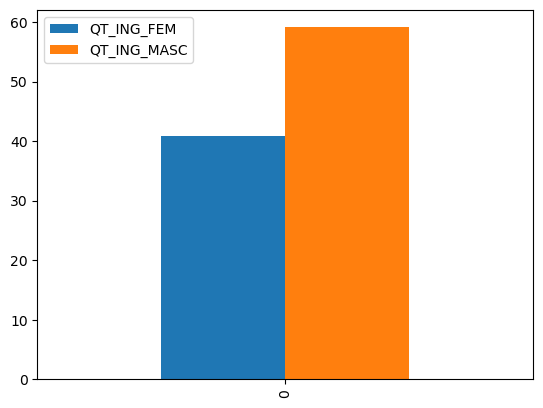

In [167]:
df_agrupado_col_int_sexo.plot(kind='bar')

In [174]:
df_censo_2017_co_curso_614_horario = df_censo_2017_co_curso_614_horario.reset_index()
df_censo_2017_co_curso_614_horario

,index,QT_ING_DIURNO,QT_ING_NOTURNO
0,113570,100.0,0.0


In [175]:
df_censo_2017_co_curso_7940_horario = df_censo_2017_co_curso_7940_horario.reset_index()
df_censo_2017_co_curso_7940_horario

,index,QT_ING_DIURNO,QT_ING_NOTURNO
0,114117,42.282609,57.717391


In [176]:
df_censo_2017_co_curso_97512_horario = df_censo_2017_co_curso_97512_horario.reset_index()
df_censo_2017_co_curso_97512_horario

,index,QT_ING_DIURNO,QT_ING_NOTURNO
0,119537,50.123457,49.876543


In [177]:
df_censo_2017_co_curso_1214441_horario = df_censo_2017_co_curso_1214441_horario.reset_index()
df_censo_2017_co_curso_1214441_horario

,index,QT_ING_DIURNO,QT_ING_NOTURNO
0,130471,0.0,100.0


In [178]:
df_agrupado_horario = (df_censo_2017_co_curso_614_horario + df_censo_2017_co_curso_7940_horario + df_censo_2017_co_curso_97512_horario + df_censo_2017_co_curso_1214441_horario)/4
df_agrupado_horario

,index,QT_ING_DIURNO,QT_ING_NOTURNO
0,119423.75,48.101516,51.898484


In [181]:
df_agrupado_horario = df_agrupado_horario.drop('index', axis=1)

<AxesSubplot:>

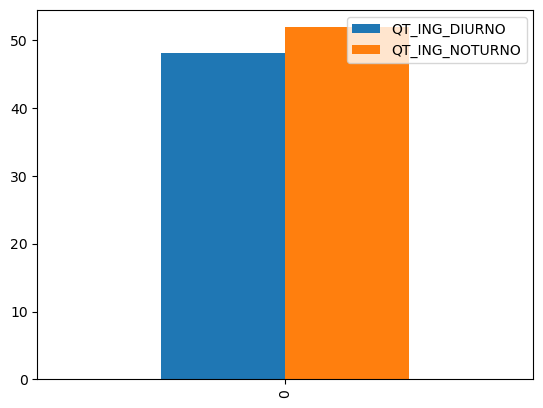

In [182]:
df_agrupado_horario.plot(kind='bar')

In [183]:
df_censo_2017_co_curso_614_forma_ingresso = df_censo_2017_co_curso_614_forma_ingresso.reset_index()
df_censo_2017_co_curso_614_forma_ingresso

,index,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA
0,113570,90.909091,3.030303,87.878788,0.0,0.0,0.0,0.0,0.0,9.090909,0.0,0.0


In [184]:
df_censo_2017_co_curso_7940_forma_ingresso = df_censo_2017_co_curso_7940_forma_ingresso.reset_index()
df_censo_2017_co_curso_7940_forma_ingresso

,index,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA
0,114117,73.940217,73.940217,0.0,0.0,0.0,0.0,0.0,0.0,26.059783,0.0,0.0


In [185]:
df_censo_2017_co_curso_97512_forma_ingresso = df_censo_2017_co_curso_97512_forma_ingresso.reset_index()
df_censo_2017_co_curso_97512_forma_ingresso

,index,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA
0,119537,92.592593,0.0,92.592593,0.0,0.0,0.0,0.0,0.0,7.160494,0.0,0.246914


In [186]:
df_censo_2017_co_curso_1214441_forma_ingresso = df_censo_2017_co_curso_1214441_forma_ingresso.reset_index()
df_censo_2017_co_curso_1214441_forma_ingresso

,index,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA
0,130471,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
df_agrupado_forma_ingresso = (df_censo_2017_co_curso_614_forma_ingresso + df_censo_2017_co_curso_7940_forma_ingresso + df_censo_2017_co_curso_97512_forma_ingresso + df_censo_2017_co_curso_1214441_forma_ingresso)/4
df_agrupado_forma_ingresso = df_agrupado_forma_ingresso.drop('index', axis=1)
df_agrupado_forma_ingresso

,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA
0,89.360475,19.24263,70.117845,0.0,0.0,0.0,0.0,0.0,10.577796,0.0,0.061728


<AxesSubplot:>

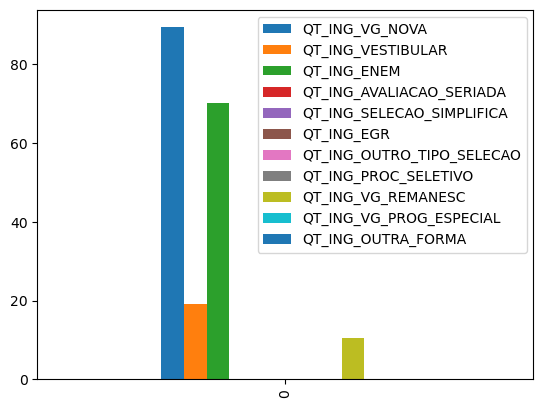

In [190]:
df_agrupado_forma_ingresso.plot(kind='bar')

In [191]:
df_censo_2017_co_curso_614_idade = df_censo_2017_co_curso_614_idade.reset_index()
df_censo_2017_co_curso_614_idade

,index,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS
0,113570,1.515152,93.939394,4.545455,0.0,0.0,0.0,0.0,0.0


In [192]:
df_censo_2017_co_curso_7940_idade = df_censo_2017_co_curso_7940_idade.reset_index()
df_censo_2017_co_curso_7940_idade

,index,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS
0,114117,0.407609,64.809783,13.940217,7.798913,5.434783,5.271739,1.875,0.461957


In [193]:
df_censo_2017_co_curso_97512_idade = df_censo_2017_co_curso_97512_idade.reset_index()
df_censo_2017_co_curso_97512_idade

,index,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS
0,119537,0.329218,87.489712,8.312757,2.057613,0.740741,0.823045,0.246914,0.0


In [194]:
df_censo_2017_co_curso_1214441_idade = df_censo_2017_co_curso_1214441_idade.reset_index()
df_censo_2017_co_curso_1214441_idade

,index,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS
0,130471,0.0,70.238095,15.47619,8.333333,3.571429,2.380952,0.0,0.0


In [198]:
df_agrupado_idade = (df_censo_2017_co_curso_614_idade + df_censo_2017_co_curso_7940_idade + df_censo_2017_co_curso_97512_idade + df_censo_2017_co_curso_1214441_idade)/4
df_agrupado_idade = df_agrupado_idade.drop('index', axis=1)
df_agrupado_idade

,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS
0,0.562995,79.119246,10.568655,4.547465,2.436738,2.118934,0.530478,0.115489


<AxesSubplot:>

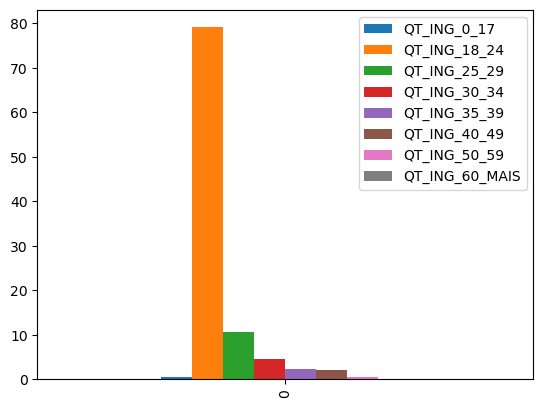

In [199]:
df_agrupado_idade.plot(kind='bar')

In [200]:
df_censo_2017_co_curso_614_raca = df_censo_2017_co_curso_614_raca.reset_index()
df_censo_2017_co_curso_614_raca

,index,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND
0,113570,18.181818,3.030303,4.545455,6.060606,3.030303,65.151515


In [201]:
df_censo_2017_co_curso_7940_raca = df_censo_2017_co_curso_7940_raca.reset_index()
df_censo_2017_co_curso_7940_raca

,index,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND
0,114117,61.168478,8.288043,23.451087,1.875,0.380435,4.836957


In [202]:
df_censo_2017_co_curso_97512_raca = df_censo_2017_co_curso_97512_raca.reset_index()
df_censo_2017_co_curso_97512_raca

,index,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND
0,119537,60.329218,5.925926,24.36214,4.691358,0.246914,4.444444


In [203]:
df_censo_2017_co_curso_1214441_raca = df_censo_2017_co_curso_1214441_raca.reset_index()
df_censo_2017_co_curso_1214441_raca

,index,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND
0,130471,72.619048,4.761905,15.47619,1.190476,0.0,5.952381


In [204]:
df_agrupado_raca = (df_censo_2017_co_curso_614_raca + df_censo_2017_co_curso_7940_raca + df_censo_2017_co_curso_97512_raca + df_censo_2017_co_curso_1214441_raca)/4
df_agrupado_raca = df_agrupado_raca.drop('index', axis=1)
df_agrupado_raca

,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND
0,53.074641,5.501544,16.958718,3.45436,0.914413,20.096324


<AxesSubplot:>

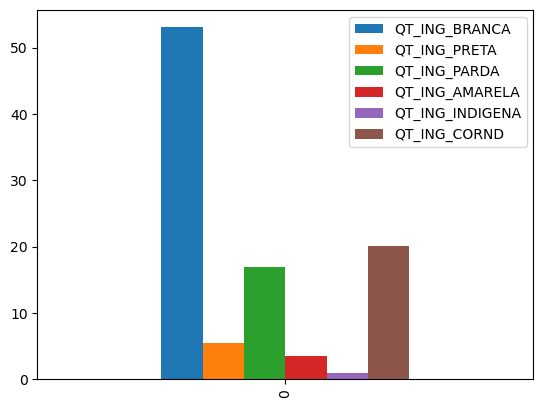

In [205]:
df_agrupado_raca.plot(kind='bar')

In [206]:
df_censo_2017_co_curso_614_nacionalidade = df_censo_2017_co_curso_614_nacionalidade.reset_index()
df_censo_2017_co_curso_614_nacionalidade

,index,QT_ING_NACBRAS,QT_ING_NACESTRANG
0,113570,98.484848,1.515152


In [207]:
df_censo_2017_co_curso_7940_nacionalidade = df_censo_2017_co_curso_7940_nacionalidade.reset_index()
df_censo_2017_co_curso_7940_nacionalidade

,index,QT_ING_NACBRAS,QT_ING_NACESTRANG
0,114117,99.728261,0.271739


In [208]:
df_censo_2017_co_curso_97512_nacionalidade = df_censo_2017_co_curso_97512_nacionalidade.reset_index()
df_censo_2017_co_curso_97512_nacionalidade

,index,QT_ING_NACBRAS,QT_ING_NACESTRANG
0,119537,99.917695,0.082305


In [209]:
df_censo_2017_co_curso_1214441_nacionalidade = df_censo_2017_co_curso_1214441_nacionalidade.reset_index()
df_censo_2017_co_curso_1214441_nacionalidade

,index,QT_ING_NACBRAS,QT_ING_NACESTRANG
0,130471,100.0,0.0


In [211]:
df_agrupado_nacionalidade = (df_censo_2017_co_curso_614_nacionalidade + df_censo_2017_co_curso_7940_nacionalidade + df_censo_2017_co_curso_97512_nacionalidade + df_censo_2017_co_curso_1214441_nacionalidade)/4
df_agrupado_nacionalidade = df_agrupado_nacionalidade.drop('index',axis=1)
df_agrupado_nacionalidade

,QT_ING_NACBRAS,QT_ING_NACESTRANG
0,99.532701,0.467299


<AxesSubplot:>

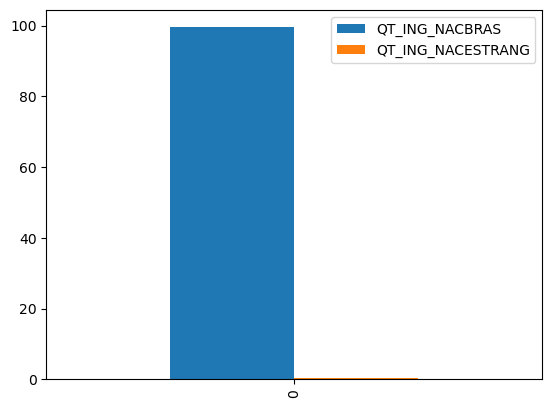

In [212]:
df_agrupado_nacionalidade.plot(kind='bar')

In [213]:
df_censo_2017_co_curso_614_deficiencia = df_censo_2017_co_curso_614_deficiencia.reset_index()
df_censo_2017_co_curso_614_deficiencia

,index,QT_ING_DEFICIENTE
0,113570,0.0


In [214]:
df_censo_2017_co_curso_7940_deficiencia = df_censo_2017_co_curso_7940_deficiencia.reset_index()
df_censo_2017_co_curso_7940_deficiencia

,index,QT_ING_DEFICIENTE
0,114117,1.603261


In [215]:
df_censo_2017_co_curso_97512_deficiencia = df_censo_2017_co_curso_97512_deficiencia.reset_index()
df_censo_2017_co_curso_97512_deficiencia

,index,QT_ING_DEFICIENTE
0,119537,2.880658


In [216]:
df_censo_2017_co_curso_1214441_deficiencia = df_censo_2017_co_curso_1214441_deficiencia.reset_index()
df_censo_2017_co_curso_1214441_deficiencia

,index,QT_ING_DEFICIENTE
0,130471,3.571429


In [218]:
df_censo_deficiencia = (df_censo_2017_co_curso_614_deficiencia + df_censo_2017_co_curso_7940_deficiencia + df_censo_2017_co_curso_97512_deficiencia + df_censo_2017_co_curso_1214441_deficiencia)/4
df_censo_deficiencia = df_censo_deficiencia.drop('index', axis=1)
df_censo_deficiencia

,QT_ING_DEFICIENTE
0,2.013837


<AxesSubplot:>

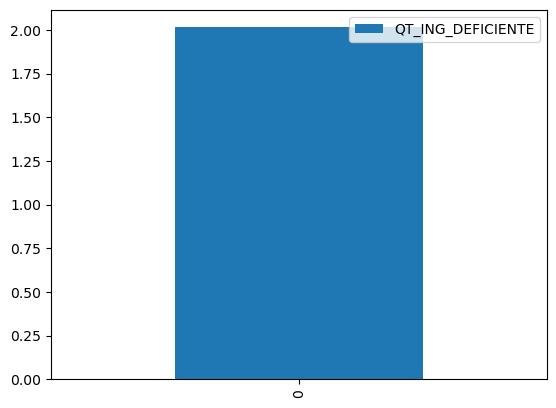

In [219]:
df_censo_deficiencia.plot(kind='bar')

In [220]:
df_censo_2017_co_curso_614_financiamento = df_censo_2017_co_curso_614_financiamento.reset_index()
df_censo_2017_co_curso_614_financiamento

,index,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS
0,113570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
df_censo_2017_co_curso_7940_financiamento = df_censo_2017_co_curso_7940_financiamento.reset_index()
df_censo_2017_co_curso_7940_financiamento

,index,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS
0,114117,14.972826,14.972826,14.972826,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
df_censo_2017_co_curso_97512_financiamento = df_censo_2017_co_curso_97512_financiamento.reset_index()
df_censo_2017_co_curso_97512_financiamento

,index,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS
0,119537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
df_censo_2017_co_curso_1214441_financiamento = df_censo_2017_co_curso_1214441_financiamento.reset_index()
df_censo_2017_co_curso_1214441_financiamento

,index,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS
0,130471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
df_agrupado_financiamento = (df_censo_2017_co_curso_614_financiamento + df_censo_2017_co_curso_7940_financiamento + df_censo_2017_co_curso_97512_financiamento + df_censo_2017_co_curso_1214441_financiamento)/4
df_agrupado_financiamento = df_agrupado_financiamento.drop('index', axis=1)
df_agrupado_financiamento

,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS
0,3.743207,3.743207,3.743207,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

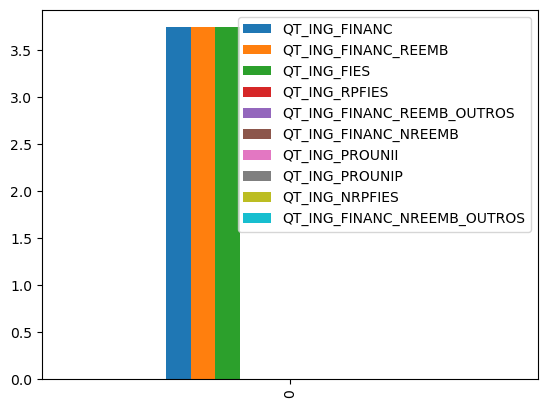

In [228]:
df_agrupado_financiamento.plot(kind='bar')

In [229]:
df_censo_2017_co_curso_614_reserva_vagas = df_censo_2017_co_curso_614_reserva_vagas.reset_index()
df_censo_2017_co_curso_614_reserva_vagas

,index,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS
0,113570,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
df_censo_2017_co_curso_7940_reserva_vagas = df_censo_2017_co_curso_7940_reserva_vagas.reset_index()
df_censo_2017_co_curso_7940_reserva_vagas

,index,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS
0,114117,0.0,0.0,0.0,0.0,0.0,0.0


In [231]:
df_censo_2017_co_curso_97512_reserva_vagas = df_censo_2017_co_curso_97512_reserva_vagas.reset_index()
df_censo_2017_co_curso_97512_reserva_vagas

,index,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS
0,119537,49.135802,46.502058,16.049383,2.633745,22.962963,0.0


In [232]:
df_censo_2017_co_curso_1214441_reserva_vagas = df_censo_2017_co_curso_1214441_reserva_vagas.reset_index()
df_censo_2017_co_curso_1214441_reserva_vagas

,index,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS
0,130471,0.0,0.0,0.0,0.0,0.0,0.0


In [233]:
df_agrupado_reserva_vagas = (df_censo_2017_co_curso_614_reserva_vagas + df_censo_2017_co_curso_7940_reserva_vagas + df_censo_2017_co_curso_97512_reserva_vagas + df_censo_2017_co_curso_1214441_reserva_vagas)/4
df_agrupado_reserva_vagas = df_agrupado_reserva_vagas.drop('index', axis=1)
df_agrupado_reserva_vagas

,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS
0,12.283951,11.625514,4.012346,0.658436,5.740741,0.0


<AxesSubplot:>

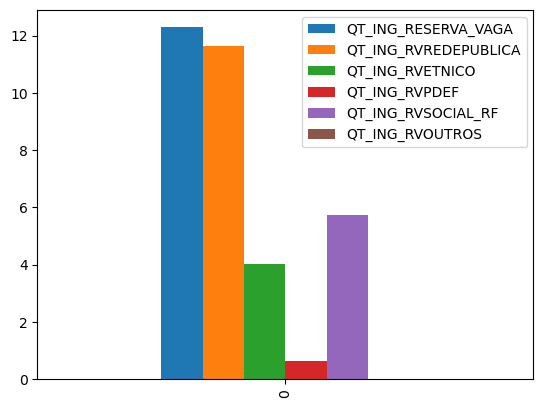

In [234]:
df_agrupado_reserva_vagas.plot(kind='bar')

In [235]:
df_censo_2017_co_curso_614_escola_pub_pri = df_censo_2017_co_curso_614_escola_pub_pri.reset_index()
df_censo_2017_co_curso_614_escola_pub_pri

,index,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA
0,113570,33.333333,66.666667,0.0


In [236]:
df_censo_2017_co_curso_7940_escola_pub_pri = df_censo_2017_co_curso_7940_escola_pub_pri.reset_index()
df_censo_2017_co_curso_7940_escola_pub_pri

,index,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA
0,114117,58.26087,41.73913,0.0


In [237]:
df_censo_2017_co_curso_97512_escola_pub_pri = df_censo_2017_co_curso_97512_escola_pub_pri.reset_index()
df_censo_2017_co_curso_97512_escola_pub_pri

,index,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA
0,119537,54.567901,45.432099,0.0


In [238]:
df_censo_2017_co_curso_1214441_escola_pub_pri = df_censo_2017_co_curso_1214441_escola_pub_pri.reset_index()
df_censo_2017_co_curso_1214441_escola_pub_pri

,index,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA
0,130471,78.571429,21.428571,0.0


In [239]:
df_agrupado_escola_pub_pri = (df_censo_2017_co_curso_614_escola_pub_pri + df_censo_2017_co_curso_7940_escola_pub_pri + df_censo_2017_co_curso_97512_escola_pub_pri + df_censo_2017_co_curso_1214441_escola_pub_pri)/4
df_agrupado_escola_pub_pri = df_agrupado_escola_pub_pri.drop('index', axis=1)
df_agrupado_escola_pub_pri

,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA
0,56.183383,43.816617,0.0


<AxesSubplot:>

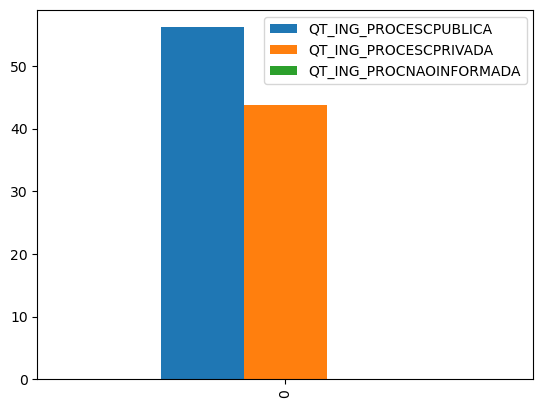

In [240]:
df_agrupado_escola_pub_pri.plot(kind='bar')

In [241]:
df_censo_2017_co_curso_614_apoio_social = df_censo_2017_co_curso_614_apoio_social.reset_index()
df_censo_2017_co_curso_614_apoio_social

,index,QT_ING_APOIO_SOCIAL
0,113570,0.0


In [242]:
df_censo_2017_co_curso_7940_apoio_social = df_censo_2017_co_curso_7940_apoio_social.reset_index()
df_censo_2017_co_curso_7940_apoio_social

,index,QT_ING_APOIO_SOCIAL
0,114117,0.0


In [243]:
df_censo_2017_co_curso_97512_apoio_social = df_censo_2017_co_curso_97512_apoio_social.reset_index()
df_censo_2017_co_curso_97512_apoio_social

,index,QT_ING_APOIO_SOCIAL
0,119537,9.62963


In [244]:
df_censo_2017_co_curso_1214441_apoio_social = df_censo_2017_co_curso_1214441_apoio_social.reset_index()
df_censo_2017_co_curso_1214441_apoio_social

,index,QT_ING_APOIO_SOCIAL
0,130471,0.0


In [245]:
df_agrupado_apoio_social = (df_censo_2017_co_curso_614_apoio_social + df_censo_2017_co_curso_7940_apoio_social + df_censo_2017_co_curso_97512_apoio_social + df_censo_2017_co_curso_1214441_apoio_social)/4
df_agrupado_apoio_social = df_agrupado_apoio_social.drop('index', axis=1)
df_agrupado_apoio_social

,QT_ING_APOIO_SOCIAL
0,2.407407


<AxesSubplot:>

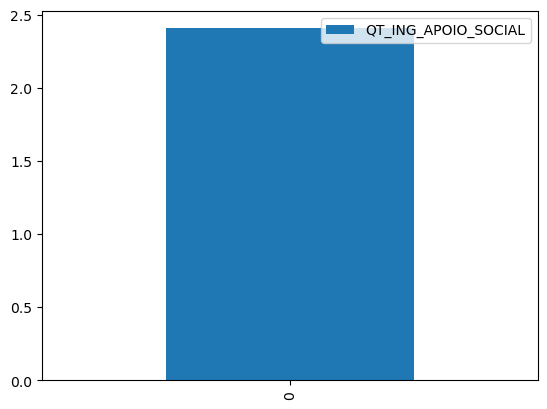

In [246]:
df_agrupado_apoio_social.plot(kind='bar')

In [247]:
df_censo_2017_co_curso_614_atividade_extra = df_censo_2017_co_curso_614_atividade_extra.reset_index()
df_censo_2017_co_curso_614_atividade_extra

,index,QT_ING_ATIV_EXTRACURRICULAR
0,113570,0.0


In [248]:
df_censo_2017_co_curso_7940_atividade_extra = df_censo_2017_co_curso_7940_atividade_extra.reset_index()
df_censo_2017_co_curso_7940_atividade_extra

,index,QT_ING_ATIV_EXTRACURRICULAR
0,114117,0.108696


In [249]:
df_censo_2017_co_curso_97512_atividade_extra = df_censo_2017_co_curso_97512_atividade_extra.reset_index()
df_censo_2017_co_curso_97512_atividade_extra

,index,QT_ING_ATIV_EXTRACURRICULAR
0,119537,8.148148


In [250]:
df_censo_2017_co_curso_1214441_atividade_extra = df_censo_2017_co_curso_1214441_atividade_extra.reset_index()
df_censo_2017_co_curso_1214441_atividade_extra

,index,QT_ING_ATIV_EXTRACURRICULAR
0,130471,21.428571


In [251]:
df_agrupado_atividade_extra = (df_censo_2017_co_curso_614_atividade_extra + df_censo_2017_co_curso_7940_atividade_extra + df_censo_2017_co_curso_97512_atividade_extra + df_censo_2017_co_curso_1214441_atividade_extra)/4
df_agrupado_atividade_extra = df_agrupado_atividade_extra.drop('index', axis=1)
df_agrupado_atividade_extra

,QT_ING_ATIV_EXTRACURRICULAR
0,7.421354


<AxesSubplot:>

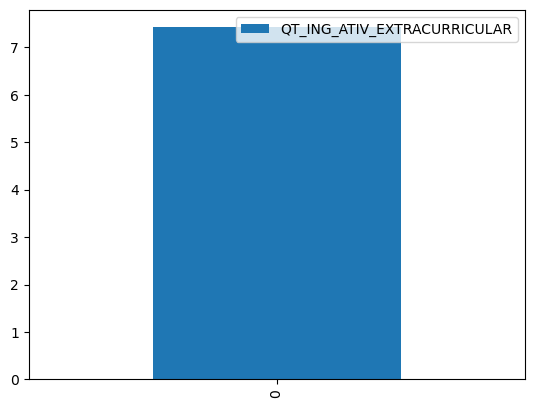

In [252]:
df_agrupado_atividade_extra.plot(kind='bar')